# 0.0 IMPORTS

## 0.1 Lib

In [1]:
import xgboost as xgb
import pandas  as pd
import numpy   as np
import seaborn as sns
import inflection
import math
import datetime
from tabulate              import tabulate
from scipy                 import stats  as ss
from IPython.core.display  import HTML
from matplotlib            import pyplot as plt
from IPython.display       import Image
from sklearn.preprocessing import RobustScaler,MinMaxScaler,LabelEncoder
from sklearn.ensemble      import RandomForestRegressor
from sklearn.metrics       import mean_absolute_error,mean_squared_error
from sklearn.linear_model  import LinearRegression,Lasso 
from boruta                import BorutaPy

In [ ]:
def cross_validation (x_training, kfold, model_name, model, verbose=False):
    mae_list = []
    mape_list = []
    rmse_list = []
    for k in reversed( range(1, kfold+1)):
        if verbose:
            print('\nKFold Number:{}'.format(k))
         #start and end date for validation
        validation_start_date = x_training['date'].max() - datetime.timedelta(days = k*6*7)
        validation_end_date = x_training['date'].max() - datetime.timedelta(days = (k-1)*6*7)
        #filtering dataset
        training = x_training[x_training['date']< validation_start_date]
        validation = x_training[(x_training['date'] >= validation_start_date) & (x_training['date'] <= validation_end_date)]
        #training and validation dataset
        #training
        xtraining = training.drop(['date', 'sales'], axis = 1)
        ytraining = training['sales']
        #validation
        xvalidation = validation.drop(['date', 'sales'], axis = 1)
        yvalidation = training['sales']
        #model
        m = model.fit(xtraining, ytraining)
        #prediction
        yhat = m.predict( xvalidation)
        #performance
        m_result = ml_error(model_name, np.expm1(yvalidation), np.expm1(yhat))
            
        #store performance of each kfold iteration
        mae_list.append(m_result['MAE'])
        mape_list.append(m_result['MAPE'])
        rmse_list.append(m_result['RMSE'])
            
    return pd.DataFrame({'Model Name': model_name,
                         'MAE CV': np.round(np.mean(mae_list), 2).astype(str) + '+/-' + np.round(np.std(mae_list), 2).astype(str),
                         'MAPE CV': np.round(np.mean(mape_list), 2).astype(str) + ' +/- ' + np.round(np.std(mape_list), 2).astype(str),
                         'RMSE CV': np.round(np.mean(rmse_list), 2).astype(str) + ' +/- ' + np.round(np.std(rmse_list), 2).astype(str)})

## 0.1 Helper Functions

In [108]:
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )


def jupyter_settings():
    %matplotlib inline
    %pylab inline
    %config InlineBackend.figure_format = 'retina'
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display(HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:,.4f}'.format
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    sns.set()
jupyter_settings()



def mean_absolute_percentage_error (y,yhat):
    return np.mean(np.abs((y-yhat)/ y))



def ml_error (model_name, y, yhat):
    mae=mean_absolute_error(y,yhat)
    mape=mean_absolute_percentage_error(y,yhat)  
    rmse=np.sqrt(mean_squared_error(y,yhat))
    
    return pd.DataFrame({'Model Name': model_name,
                         'MAE': mae,
                         'MAPE': mape,
                         'RMSE': rmse},index=[0])







def cross_validation(x_training, kfold, model_name, model, verbose=False):


    # primeiras semanas olhar no one note na data 05/06 
    # esta etapa estou pegando parte do meu dataset para treino
    mae_list=[]
    mape_list=[]
    rmse_list=[]

    #somo um pois inicia do zero
    for k in reversed(range (1, kfold+1 )):
        if verbose:
            print('\nKFold Number: {}'.format(k))

        # start and end date for validation
        validation_start_date = x_training['date'].max()- datetime.timedelta(days=k*6*7)
        validation_end_date = x_training['date'].max()- datetime.timedelta(days=(k-1)*6*7)

        # filtering dataset
        training = x_training[x_training['date']< validation_start_date]
        validation = x_training[(x_training['date']>= validation_start_date) & (x_training['date']<= validation_end_date)]

        # training and validation dataset

        #training
        xtraining=training.drop(['date','sales'],axis=1)
        ytraining=training['sales']

        #validation
        xvalidation=validation.drop(['date','sales'],axis=1)
        yvalidation=validation['sales']


        # model
        m = model().fit(xtraining,ytraining)


        # prediction
        yhat=m.predict(xvalidation)


        # performance
        m_result = ml_error(model_name, np.expm1(yvalidation),np.expm1(yhat))


        # Store performance of each kfold interation
        mae_list.append(m_result['MAE'])
        mape_list.append(m_result['MAPE'])    
        rmse_list.append(m_result['RMSE']) 

        # cv cross validation media
    return pd.DataFrame({'Model Name': model_name
                        ,'MAE CV': np.round(np.mean(mae_list),2 ).astype(str) + '+/-' + np.round(np.std(mae_list),2 ).astype(str)
                        ,'MAPE CV': np.round(np.mean(mape_list),2 ).astype(str) + '+/-' + np.round(np.std(mape_list),2 ).astype(str)  
                        ,'RMSE CV': np.round(np.mean(rmse_list),2 ).astype(str) + '+/-' + np.round(np.std(rmse_list),2 ).astype(str)},index=[0])  

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [3]:
df_sales_raw=pd.read_csv('C:/Users/Djalma.junior/Do zero ao DS/Repos DS-PROD/train.csv', low_memory=False)
df_store_raw=pd.read_csv('C:/Users/Djalma.junior/Do zero ao DS/Repos DS-PROD/store.csv', low_memory=False)


#merge
df_raw = pd.merge ( df_sales_raw,df_store_raw, how= 'left', on= 'Store' )

# 1.0 DESCRICAO DOS DADOS

In [4]:
# sempre copiar para nao sobre escrever e ter que ir no inicio do notebook para achar e carregar dnv
df1 = df_raw.copy()

## 1.1 Rename Columns

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore ( x )

#map faz um mapeamento da funcao snakecase em todas as palavras da lista cols_old
cols_new = list(map ( snakecase,cols_old))

#rename
df1.columns = cols_new

## 1.2 Data Dimensions

In [6]:
print ( ' Number of Rows: {}'.format(df1.shape[0]))
print ( ' Number of Cols: {}'.format(df1.shape[1]))

 Number of Rows: 1017209
 Number of Cols: 18


## 1.3 Data Types

In [7]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [8]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [9]:
df1.sample()

store  day_of_week       date  sales  customers  open  promo state_holiday  school_holiday store_type assortment  competition_distance  competition_open_since_month  competition_open_since_year  promo2  promo2_since_week  promo2_since_year   promo_interval
722237    503            7 2013-09-22      0          0     0      0             0               0          d          c           13,080.0000                        9.0000                   2,006.0000       1            14.0000         2,011.0000  Jan,Apr,Jul,Oct

In [10]:
# competition_distance  
df1['competition_distance']=df1['competition_distance'].apply (lambda x: 200000.0 if math.isnan(x) else x)

# competition_open_since_month    
df1['competition_open_since_month']= df1.apply (lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# competition_open_since_year     
df1['competition_open_since_year']= df1.apply (lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# promo2_since_week               
df1['promo2_since_week']= df1.apply (lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

# promo2_since_year               
df1['promo2_since_year']= df1.apply (lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)


# promo_interval    
month_map = {1:'Jan',2:'Fev',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dez'}

#se for na substituir por 0
df1['promo_interval'].fillna(0, inplace=True)

# transformando data em mes (numeros substituidos por letras)
df1['month_map'] = df1['date'].dt.month.map( month_map )

# como estou usando mais que uma coluna utilizar o axis=1 para preencher a linha e tds colunas dela
df1['is_promo']=df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval']== 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)



In [11]:
df1.sample(5).T

348773               361836               305559               672987               832639
store                                         238                  208                 1101                  313                  520
day_of_week                                     2                    2                    7                    2                    6
date                          2014-09-02 00:00:00  2014-08-19 00:00:00  2014-10-19 00:00:00  2013-11-05 00:00:00  2013-06-15 00:00:00
sales                                        9924                 3323                    0                 8007                 2538
customers                                    1337                  432                    0                  773                  271
open                                            1                    1                    0                    1                    1
promo                                           1                    1                    0                    1                    0
state_holiday                                   0                    0                    0                    0                    0
school_holiday                                  0                    1                    0                    0                    0
store_type                                      a                    c                    d                    d                    a
assortment                                      a                    a                    c                    c                    c
competition_distance                     320.0000             300.0000           4,060.0000          14,160.0000           6,900.0000
competition_open_since_month               9.0000               4.0000               9.0000              11.0000               6.0000
competition_open_since_year            2,014.0000           2,006.0000           2,012.0000           2,013.0000           2,013.0000
promo2                                          1                    0                    0                    0                    1
promo2_since_week                         45.0000              34.0000              42.0000              45.0000              40.0000
promo2_since_year                      2,009.0000           2,014.0000           2,014.0000           2,013.0000           2,012.0000
promo_interval                    Feb,May,Aug,Nov                    0                    0                    0     Mar,Jun,Sept,Dec
month_map                                     Sep                  Aug                  Oct                  Nov                  Jun
is_promo                                        0                    0                    0                    0                    1

## 1.6 Change Types

In [12]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(np.int64)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(np.int64)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(np.int64)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(np.int64)

In [13]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statiscal

In [14]:
#trazendo apenas numeros
num_attributes= df1.select_dtypes(include= ['int64','float64'])
#trazendo apenas strings
cat_attributes= df1.select_dtypes(exclude= ['int64','float64', 'datetime64[ns]'])

In [15]:
num_attributes.sample(2)

store  day_of_week  sales  customers  open  promo  school_holiday  competition_distance  competition_open_since_month  competition_open_since_year  promo2  promo2_since_week  promo2_since_year  is_promo
833618    384            5   6418        781     1      0               0              130.0000                             6                         2013       1                 14               2011         0
239971    944            7      0          0     0      0               1            1,670.0000                             7                         2015       0                 52               2014         0

### 1.7.1 Numerical Attributes

In [16]:
# Central Tendency - mean, median ( t de transpose)
ct1 = pd.DataFrame(num_attributes.apply( np.mean )) .T
ct2 = pd.DataFrame(num_attributes.apply( np.median )) .T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply( np.std )) .T
d2 = pd.DataFrame(num_attributes.apply( min )) .T
d3 = pd.DataFrame(num_attributes.apply( max )) .T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() )) .T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew () )) .T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() )) .T

#concatenar informacoes
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns=['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

attributes        min          max        range       mean     median         std    skew  kurtosis
0                          store     1.0000   1,115.0000   1,114.0000   558.4297   558.0000    321.9085 -0.0010   -1.2005
1                    day_of_week     1.0000       7.0000       6.0000     3.9983     4.0000      1.9974  0.0016   -1.2469
2                          sales     0.0000  41,551.0000  41,551.0000 5,773.8190 5,744.0000  3,849.9243  0.6415    1.7784
3                      customers     0.0000   7,388.0000   7,388.0000   633.1459   609.0000    464.4115  1.5987    7.0918
4                           open     0.0000       1.0000       1.0000     0.8301     1.0000      0.3755 -1.7580    1.0907
5                          promo     0.0000       1.0000       1.0000     0.3815     0.0000      0.4858  0.4878   -1.7620
6                 school_holiday     0.0000       1.0000       1.0000     0.1786     0.0000      0.3831  1.6778    0.8152
7           competition_distance    20.0000 200,000.0000 199,980.0000 5,935.4427 2,330.0000 12,547.6468 10.2423  147.7897
8   competition_open_since_month     1.0000      12.0000      11.0000     6.7868     7.0000      3.3111 -0.0421   -1.2326
9    competition_open_since_year 1,900.0000   2,015.0000     115.0000 2,010.3248 2,012.0000      5.5156 -7.2357  124.0713
10                        promo2     0.0000       1.0000       1.0000     0.5006     1.0000      0.5000 -0.0023   -2.0000
11             promo2_since_week     1.0000      52.0000      51.0000    23.6190    22.0000     14.3101  0.1787   -1.1840
12             promo2_since_year 2,009.0000   2,015.0000       6.0000 2,012.7933 2,013.0000      1.6627 -0.7844   -0.2101
13                      is_promo     0.0000       1.0000       1.0000     0.1492     0.0000      0.3563  1.9696    1.8793

C:\Users\Djalma.junior\Anaconda3\envs\predict-time-series\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


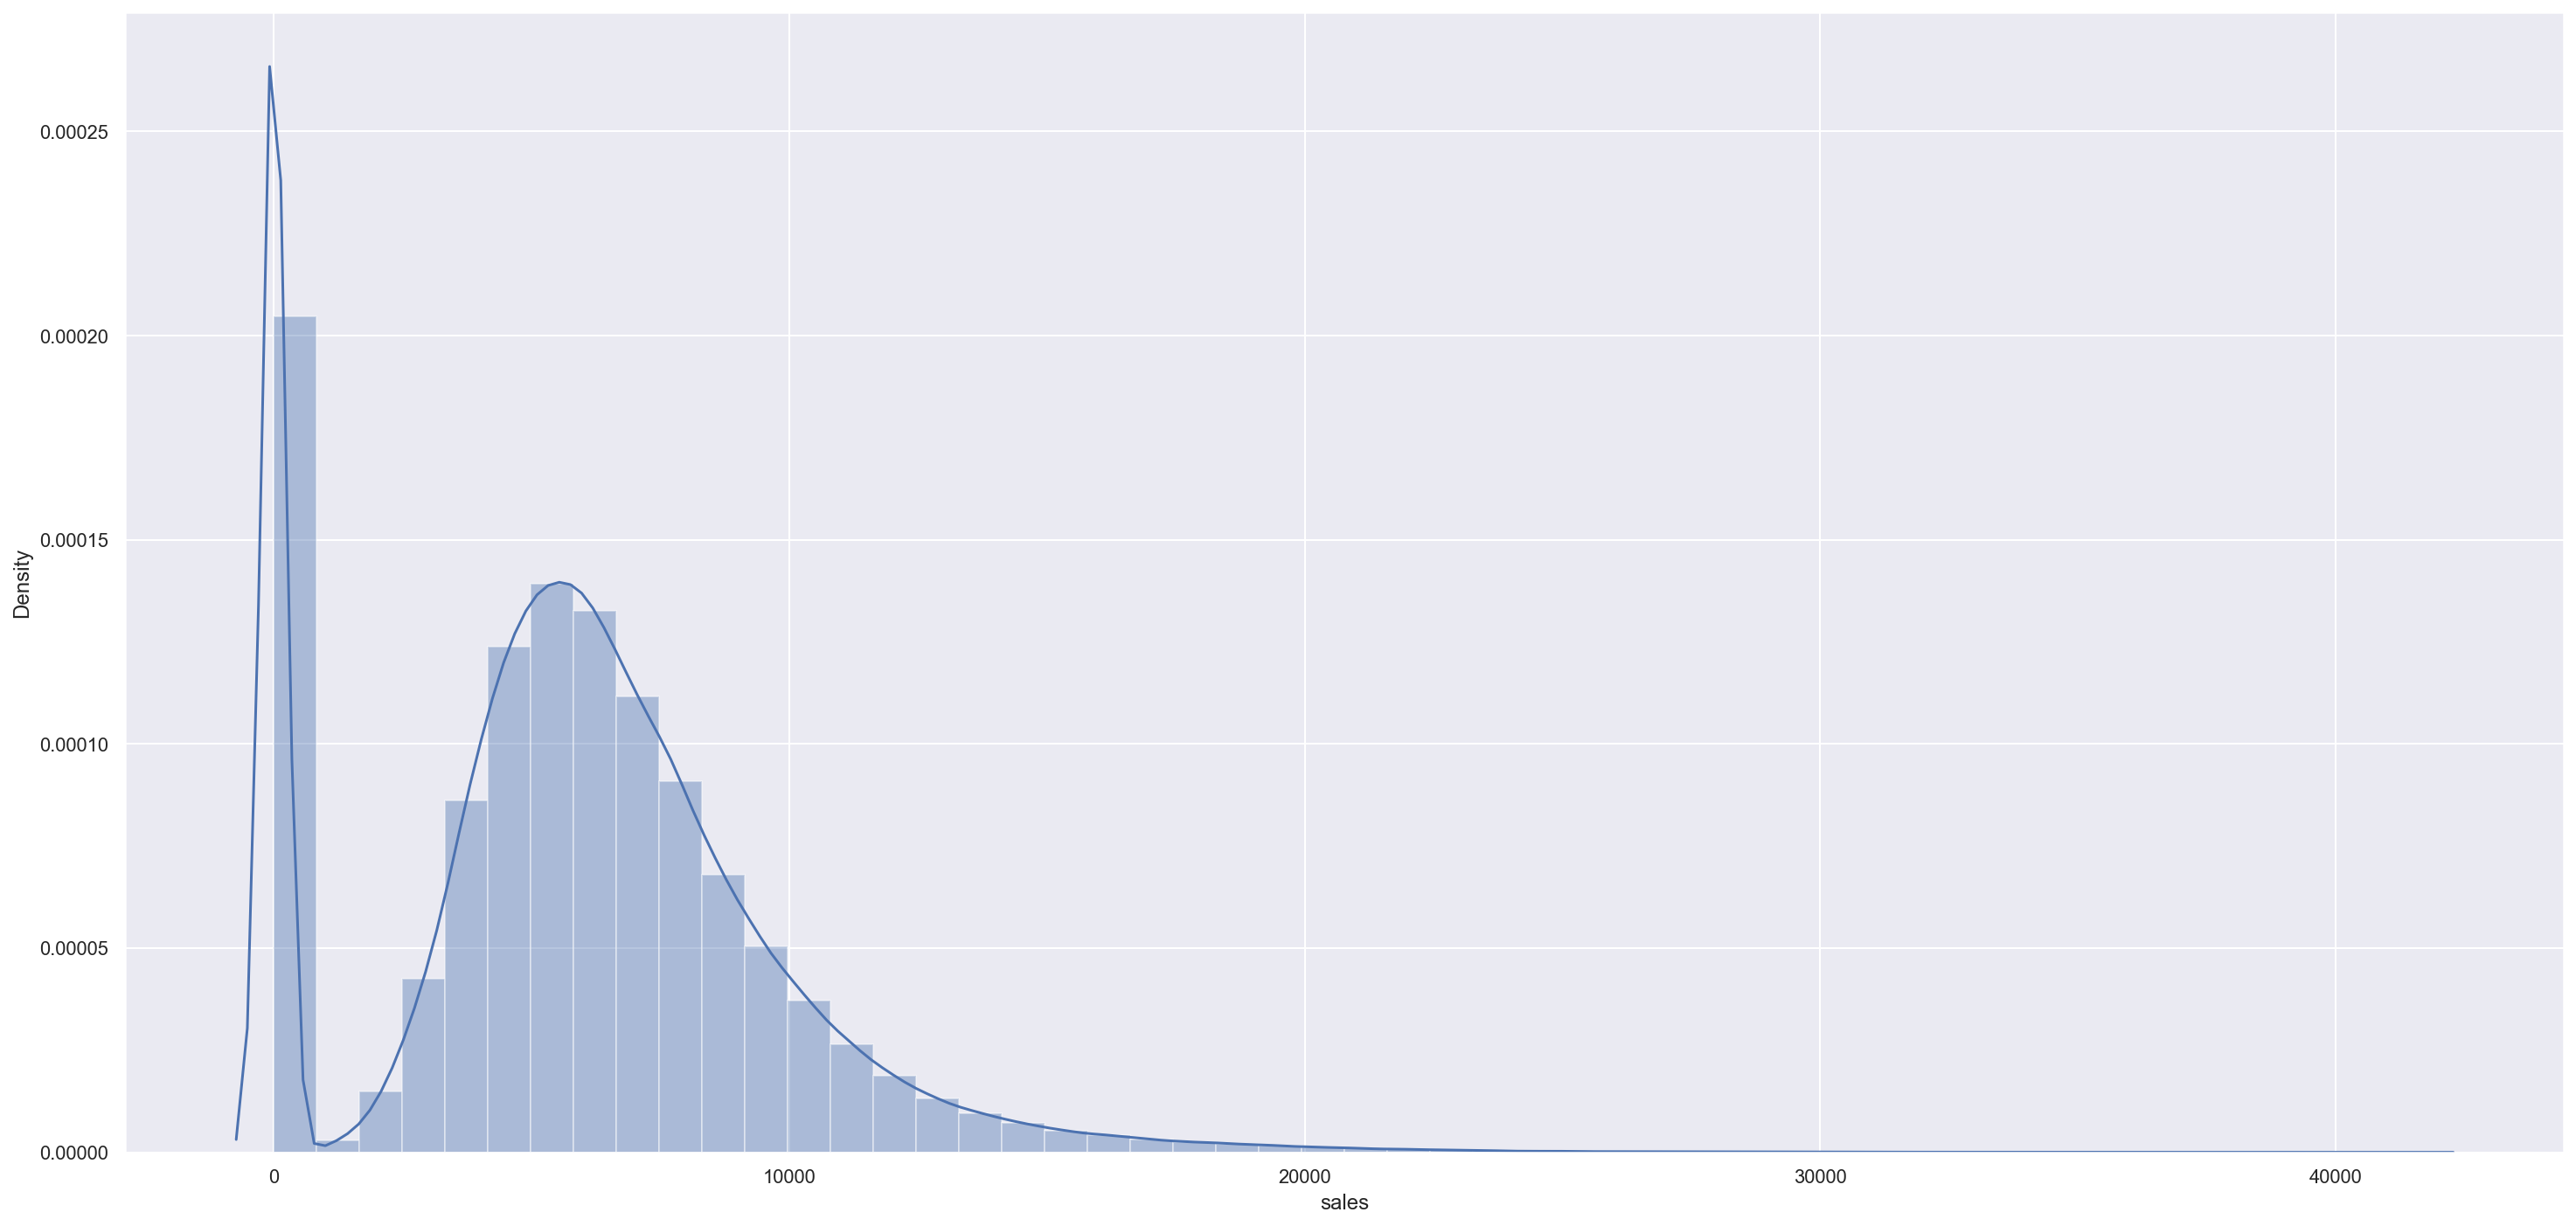

In [17]:
sns.distplot(df1['sales']);

### 1.7.2 Categorical Attributes

In [18]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

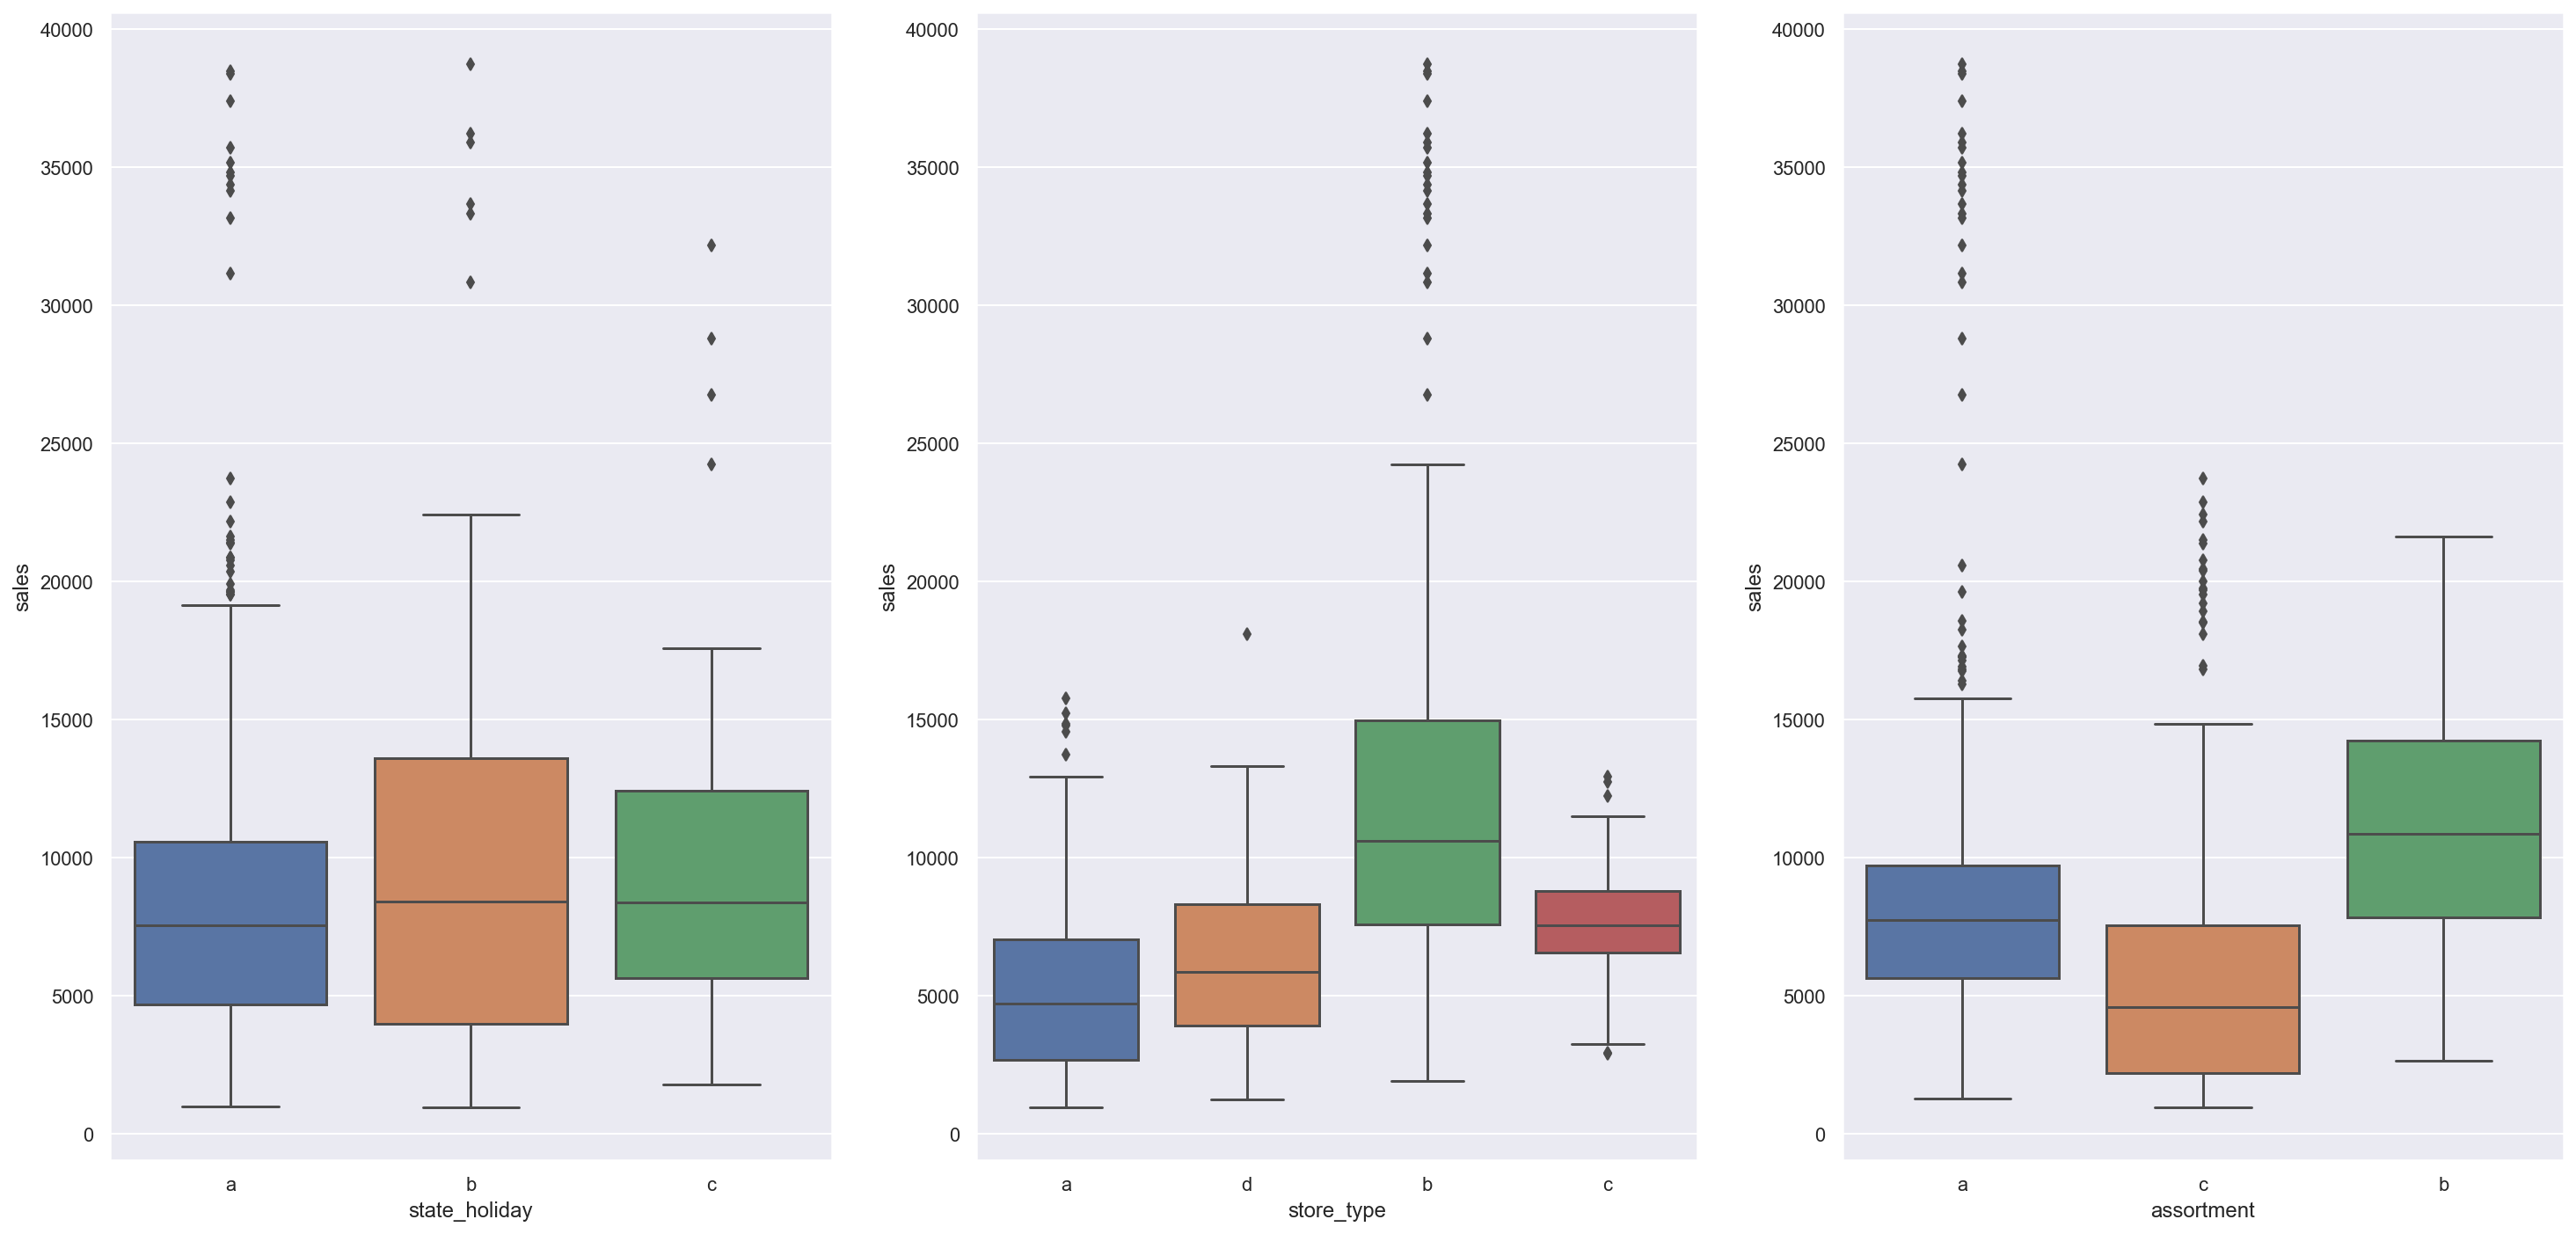

In [19]:
aux1= df1[(df1['state_holiday'] != '0') & (df1['sales']>0)]
# 1 linha 3 colunas (posicao)
plt.subplot (1, 3 ,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot (1, 3 ,2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot (1, 3 ,3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# 2.0 FEATURE ENGINEERING

In [20]:
df2 = df1.copy()

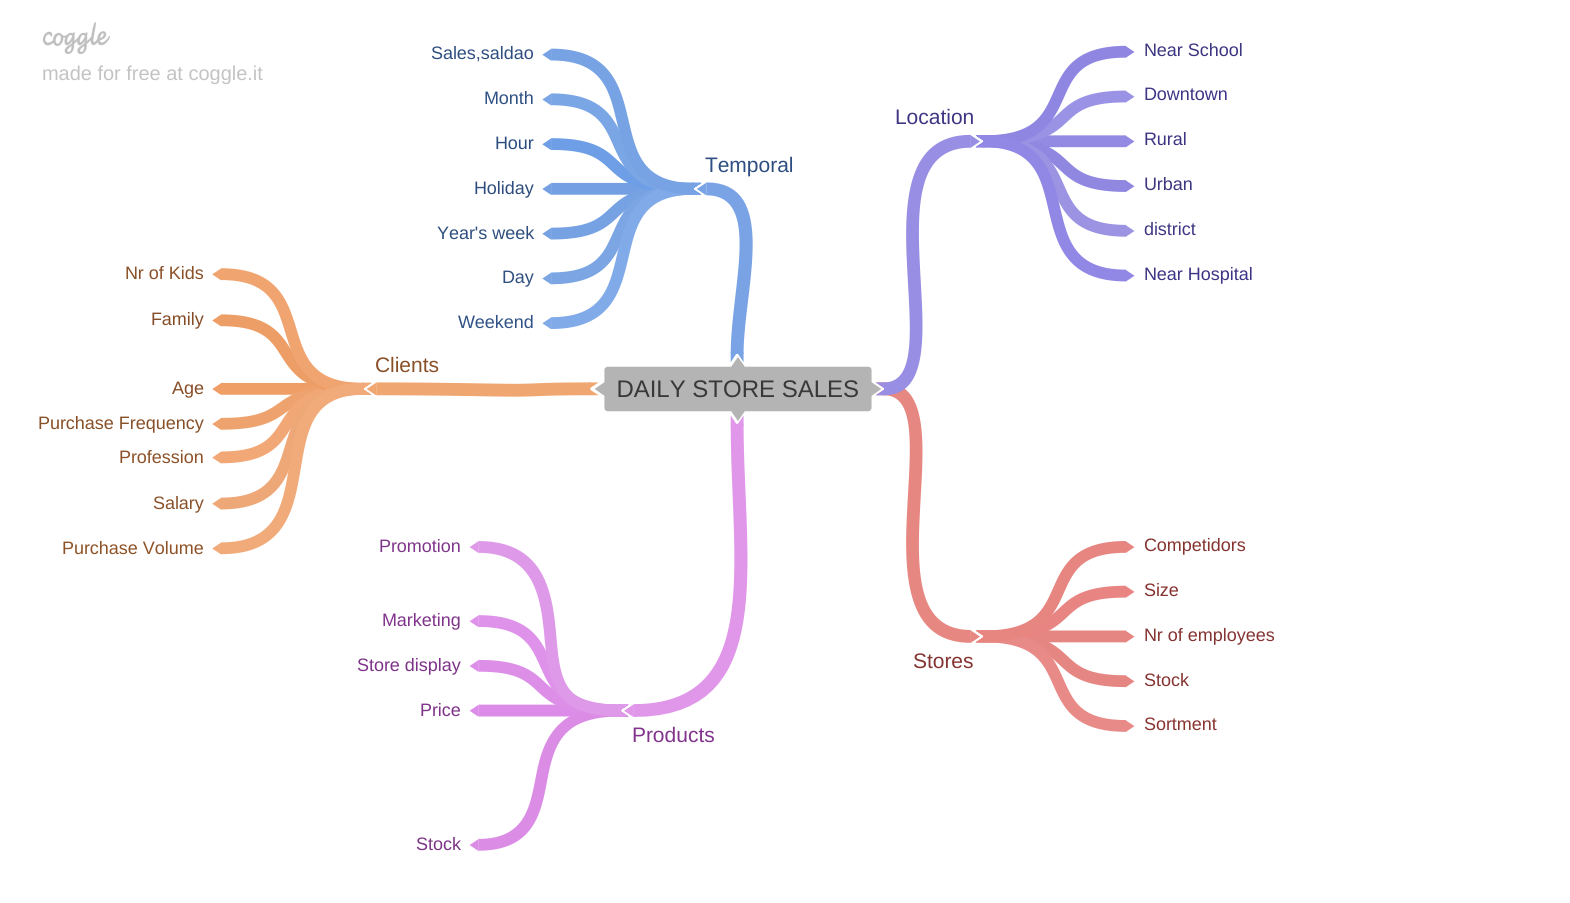

In [21]:
Image ('C:/Users/Djalma.junior/Do zero ao DS/Repos DS-PROD/DAILY_STORE_SALES.png')

# tenho print das hipoteses no one note
# tudo sao apostas preciso dos dados para saber se as hipoteses estao corretas
# nao eh uma relacoa de causa e efeito 
# eh apenas uma maneira de buscar a corelacao das coisas

## 2.1 Creating Hypotheses

### 2.1.1  Stores Hypotheses 

**1.** Lojas com maior quadro de funcionarios deveriam vender mais.

**2.** Lojas com maior estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com menor porte deveriam vender menos.

**5.** Lojas com maior sortimento deveriam vender mais.

**6.** Lojas com competidores a mais tempo deveriam vender mais.


### 2.1.2  Product Hypotheses 

**1.** Lojas que investem mais em marketing deveriam vender mais.

**2.** Lojas que expoe mais o produto em vitrines deveriam vender mais.

**3.** Lojas que tem precos menores deveriam vender mais.

**4.** Lojas que Lojas que tem precos menores por mais tempo deveriam vender mais.

**5.** Lojas com promo mais agressivas (descontos maiores) deveriam vender mais.

**6.** Lojas com promo ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promo ativas por mais tempo deveriam vender mais.

**8.** Lojas com mais promo consecutivas deveriam vender mais.


### 2.1.3 Seasonality Hypotheses 

**1.** Lojas que tem mais feriados deveriam vender menos.

**2.** Lojas que abrem nos primeiros 6 meses deveriam vender mais.

**3.** Lojas que abrem nos finais de semana deveriam vender mais.

**4.** Lojas que abrem nos finais de semana deveriam vender mais.

**5.** Lojas deveriam vender menos aos FDS.

**6.** Lojas deverias vender menos durante feriados escolares.









## 2.2 Final list of Hypotheses

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais procimos deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender mais.

**4.** Lojas com promo ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promo ativas por mais tempo deveriam vender mais.

**6.** Lojas com mais promo consecutivas deveriam vender mais.

**7.** Lojas abertas durante o natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**8.** Lojas deveriam vender mais no segundo semestre do ano.

**9.** Lojas deveriam vender mais depois do dia 10 de cada mes.

**10.** Lojas deveriam vender menos aos finais de semana.

**11.** Lojas deveriam vender menos aos feriados escolares.






## 2.3 Feature Engineering

In [22]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day


# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week
df2['year_week'] = df2['date'].dt.strftime ( '%Y-%W' )


# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1 ), axis=1 )
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply (lambda x: x.days).astype(int)

# promo since
df2['promo_since']=df2['promo2_since_year'].astype(str)+ '-' + df2['promo2_since_week'].astype(str)
df2['promo_since']=df2['promo_since'].apply (lambda x: datetime.datetime.strptime ( x + '-1', '%Y-%W-%w' ) - datetime.timedelta (days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply (lambda x: x.days).astype(int)

# assortment
df2['assortment']=df2['assortment'].apply (lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')


# state holiday
df2['state_holiday']=df2['state_holiday'].apply (lambda x: 'public_holiday' if x == 'a' else 'ester_holiday' if x == 'b' else 'crhistmas' if x == 'c' else  'regular_day')


In [23]:
df2.head().T

0                    1                    2                    3                    4
store                                           1                    2                    3                    4                    5
day_of_week                                     5                    5                    5                    5                    5
date                          2015-07-31 00:00:00  2015-07-31 00:00:00  2015-07-31 00:00:00  2015-07-31 00:00:00  2015-07-31 00:00:00
sales                                        5263                 6064                 8314                13995                 4822
customers                                     555                  625                  821                 1498                  559
open                                            1                    1                    1                    1                    1
promo                                           1                    1                    1                    1                    1
state_holiday                         regular_day          regular_day          regular_day          regular_day          regular_day
school_holiday                                  1                    1                    1                    1                    1
store_type                                      c                    a                    a                    c                    a
assortment                                  basic                basic                basic             extended                basic
competition_distance                   1,270.0000             570.0000          14,130.0000             620.0000          29,910.0000
competition_open_since_month                    9                   11                   12                    9                    4
competition_open_since_year                  2008                 2007                 2006                 2009                 2015
promo2                                          0                    1                    1                    0                    0
promo2_since_week                              31                   13                   14                   31                   31
promo2_since_year                            2015                 2010                 2011                 2015                 2015
promo_interval                                  0      Jan,Apr,Jul,Oct      Jan,Apr,Jul,Oct                    0                    0
month_map                                     Jul                  Jul                  Jul                  Jul                  Jul
is_promo                                        0                    1                    1                    0                    0
year                                         2015                 2015                 2015                 2015                 2015
month                                           7                    7                    7                    7                    7
day                                            31                   31                   31                   31                   31
week_of_year                                   31                   31                   31                   31                   31
year_week                                 2015-30              2015-30              2015-30              2015-30              2015-30
competition_since             2008-09-01 00:00:00  2007-11-01 00:00:00  2006-12-01 00:00:00  2009-09-01 00:00:00  2015-04-01 00:00:00
competition_time_month                         84                   94                  105                   71                    4
promo_since                   2015-07-27 00:00:00  2010-03-22 00:00:00  2011-03-28 00:00:00  2015-07-27 00:00:00  2015-07-27 00:00:00
promo_time_week                                 0                  279                  226                    0                    0

# 3.0 FILTRAGEM DE VARIAVEIS

In [24]:
df3=df2.copy()

In [25]:
df3.head()

store  day_of_week       date  sales  customers  open  promo state_holiday  school_holiday store_type assortment  competition_distance  competition_open_since_month  competition_open_since_year  promo2  promo2_since_week  promo2_since_year   promo_interval month_map  is_promo  year  month  day  week_of_year year_week competition_since  competition_time_month promo_since  promo_time_week
0      1            5 2015-07-31   5263        555     1      1   regular_day               1          c      basic            1,270.0000                             9                         2008       0                 31               2015                0       Jul         0  2015      7   31            31   2015-30        2008-09-01                      84  2015-07-27                0
1      2            5 2015-07-31   6064        625     1      1   regular_day               1          a      basic              570.0000                            11                         2007       1                 13               2010  Jan,Apr,Jul,Oct       Jul         1  2015      7   31            31   2015-30        2007-11-01                      94  2010-03-22              279
2      3            5 2015-07-31   8314        821     1      1   regular_day               1          a      basic           14,130.0000                            12                         2006       1                 14               2011  Jan,Apr,Jul,Oct       Jul         1  2015      7   31            31   2015-30        2006-12-01                     105  2011-03-28              226
3      4            5 2015-07-31  13995       1498     1      1   regular_day               1          c   extended              620.0000                             9                         2009       0                 31               2015                0       Jul         0  2015      7   31            31   2015-30        2009-09-01                      71  2015-07-27                0
4      5            5 2015-07-31   4822        559     1      1   regular_day               1          a      basic           29,910.0000                             4                         2015       0                 31               2015                0       Jul         0  2015      7   31            31   2015-30        2015-04-01                       4  2015-07-27                0

## 3.1 Filtragem das linhas

In [26]:
df3=df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2 Selecao das colunas

In [27]:
# axis = 0 linhas
# axis = 1 colunas

cols_drop=['customers','open','promo_interval','month_map']
df3=df3.drop(cols_drop, axis=1)

In [28]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0 ANALISE EXPLORATORIA DE DADOS

## 4.1 Analise Univariada

In [29]:
df4=df3.copy()

### 4.1.1 Response Variable

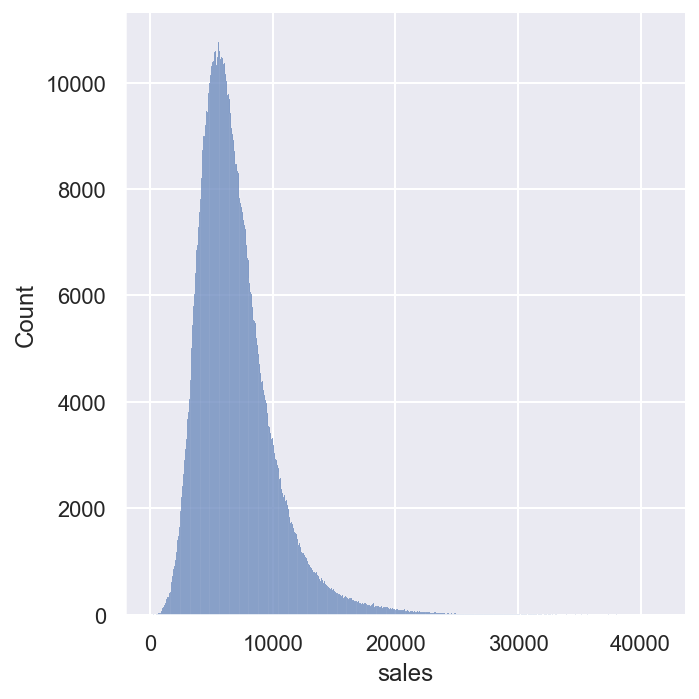

In [30]:
sns.displot(df4['sales'], kde=False);

### 4.1.2 Numerical Variable

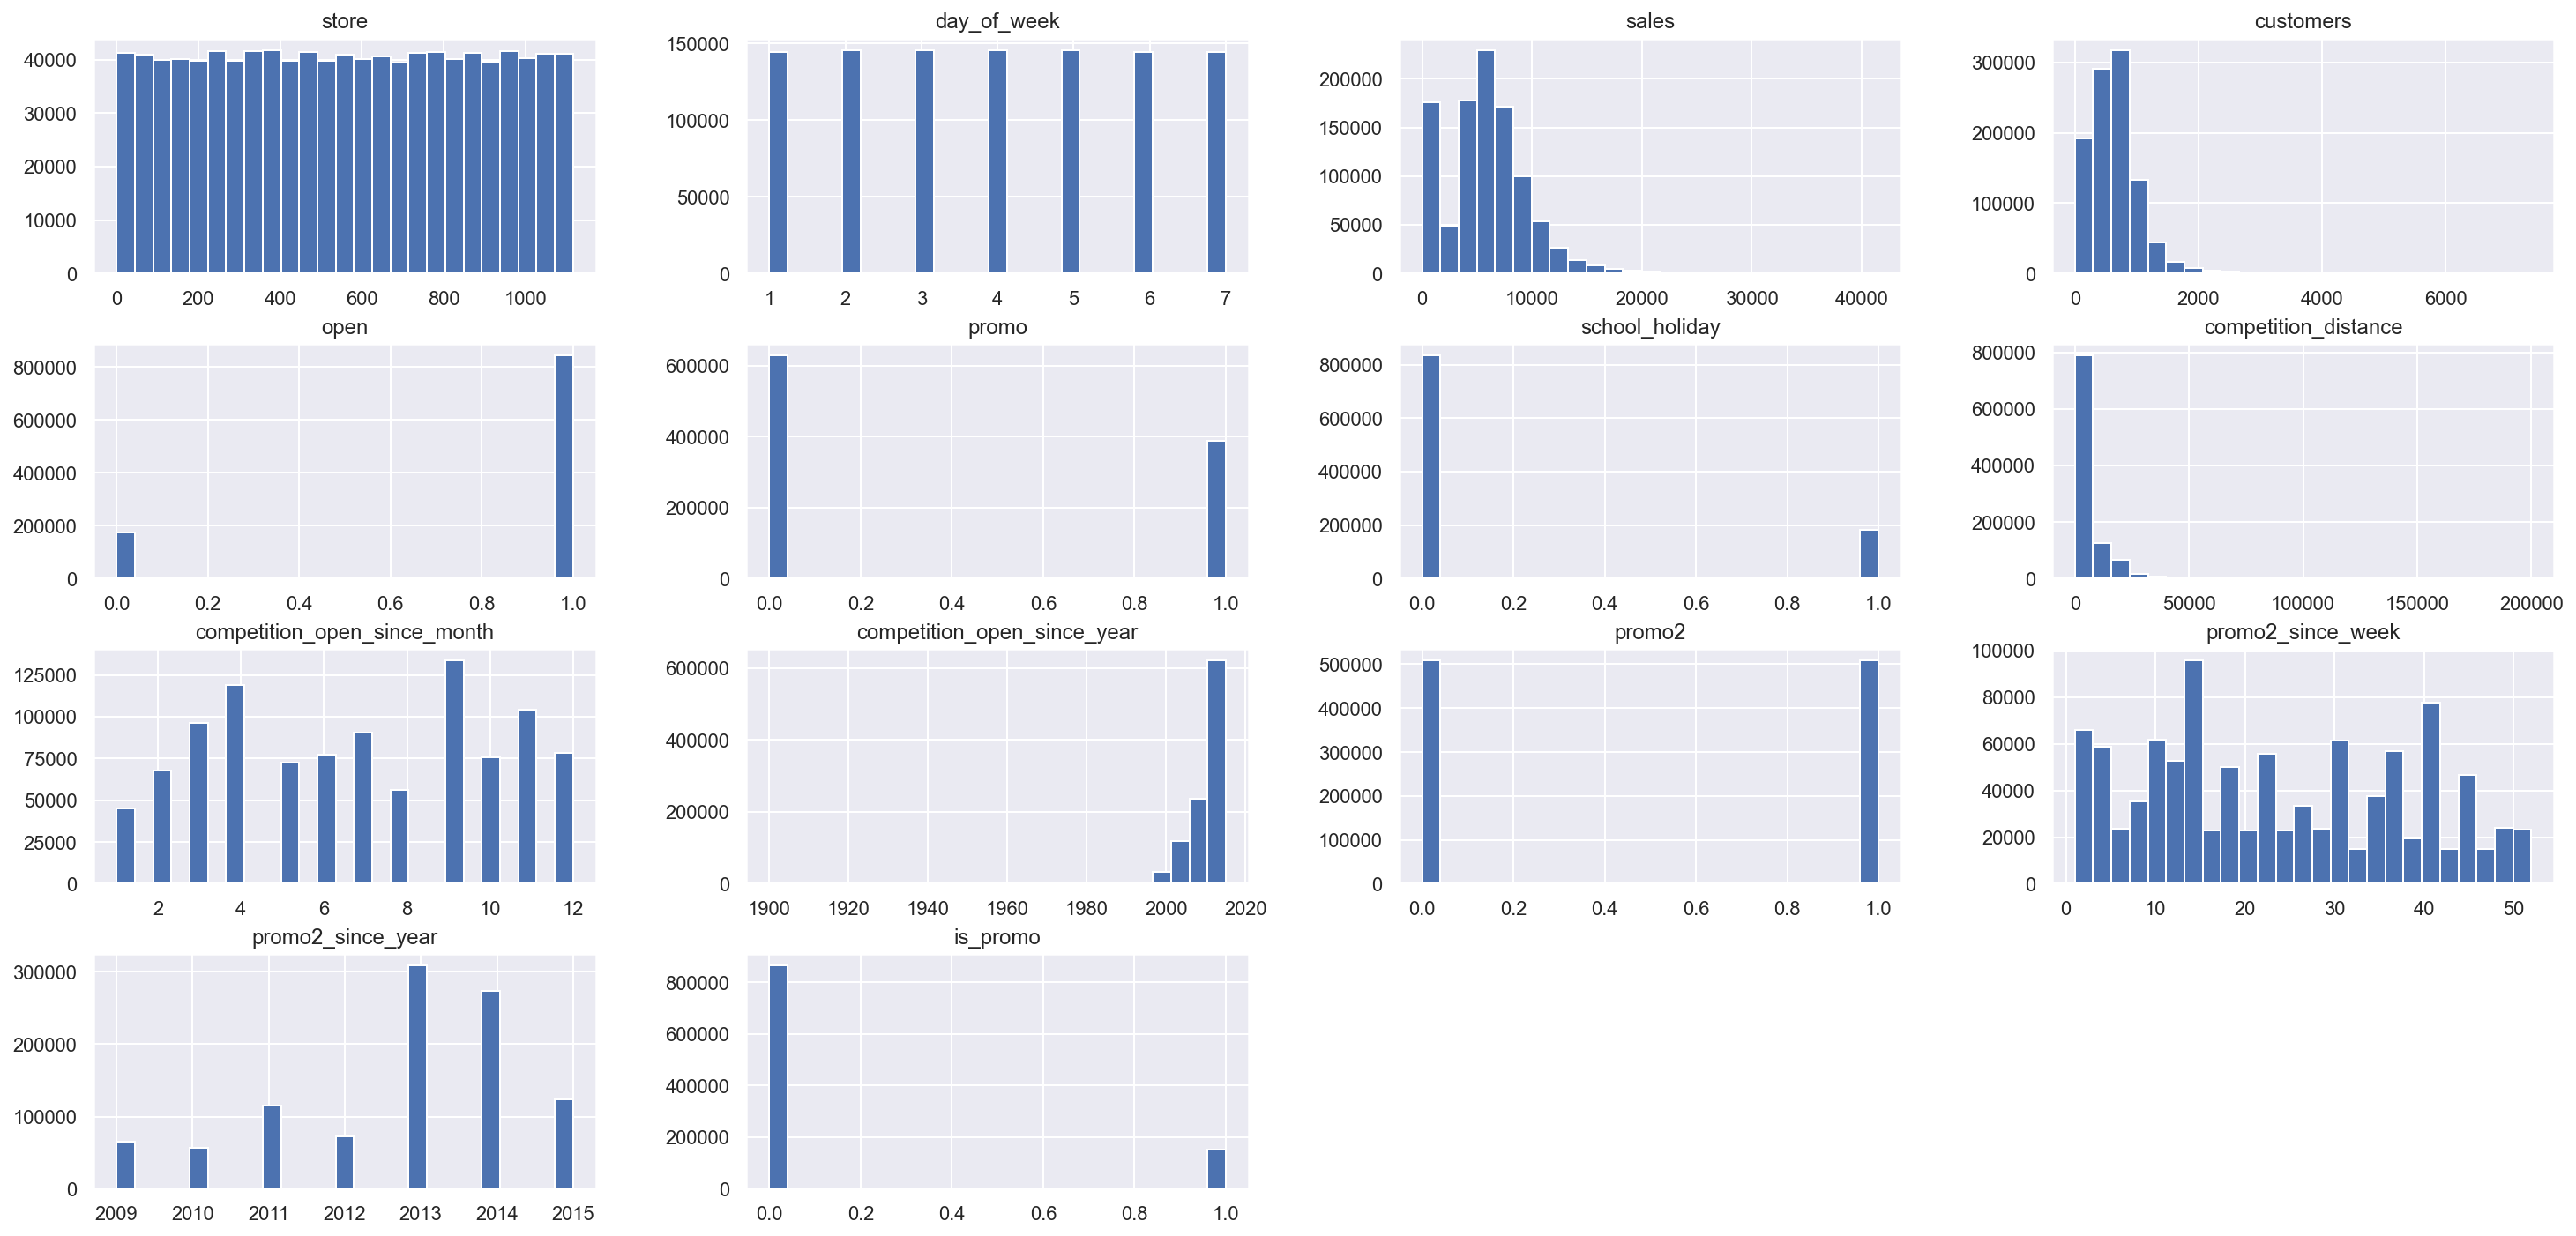

In [31]:
num_attributes.hist(bins=25);

### 4.1.3 Categorical Variable

In [32]:
cat_attributes.head()

state_holiday store_type assortment   promo_interval month_map
0             0          c          a                0       Jul
1             0          a          a  Jan,Apr,Jul,Oct       Jul
2             0          a          a  Jan,Apr,Jul,Oct       Jul
3             0          c          c                0       Jul
4             0          a          a                0       Jul

In [33]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424     ester_holiday
241126         crhistmas
Name: state_holiday, dtype: object

C:\Users\Djalma.junior\Anaconda3\envs\predict-time-series\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Djalma.junior\Anaconda3\envs\predict-time-series\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Djalma.junior\Anaconda3\envs\predict-time-series\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

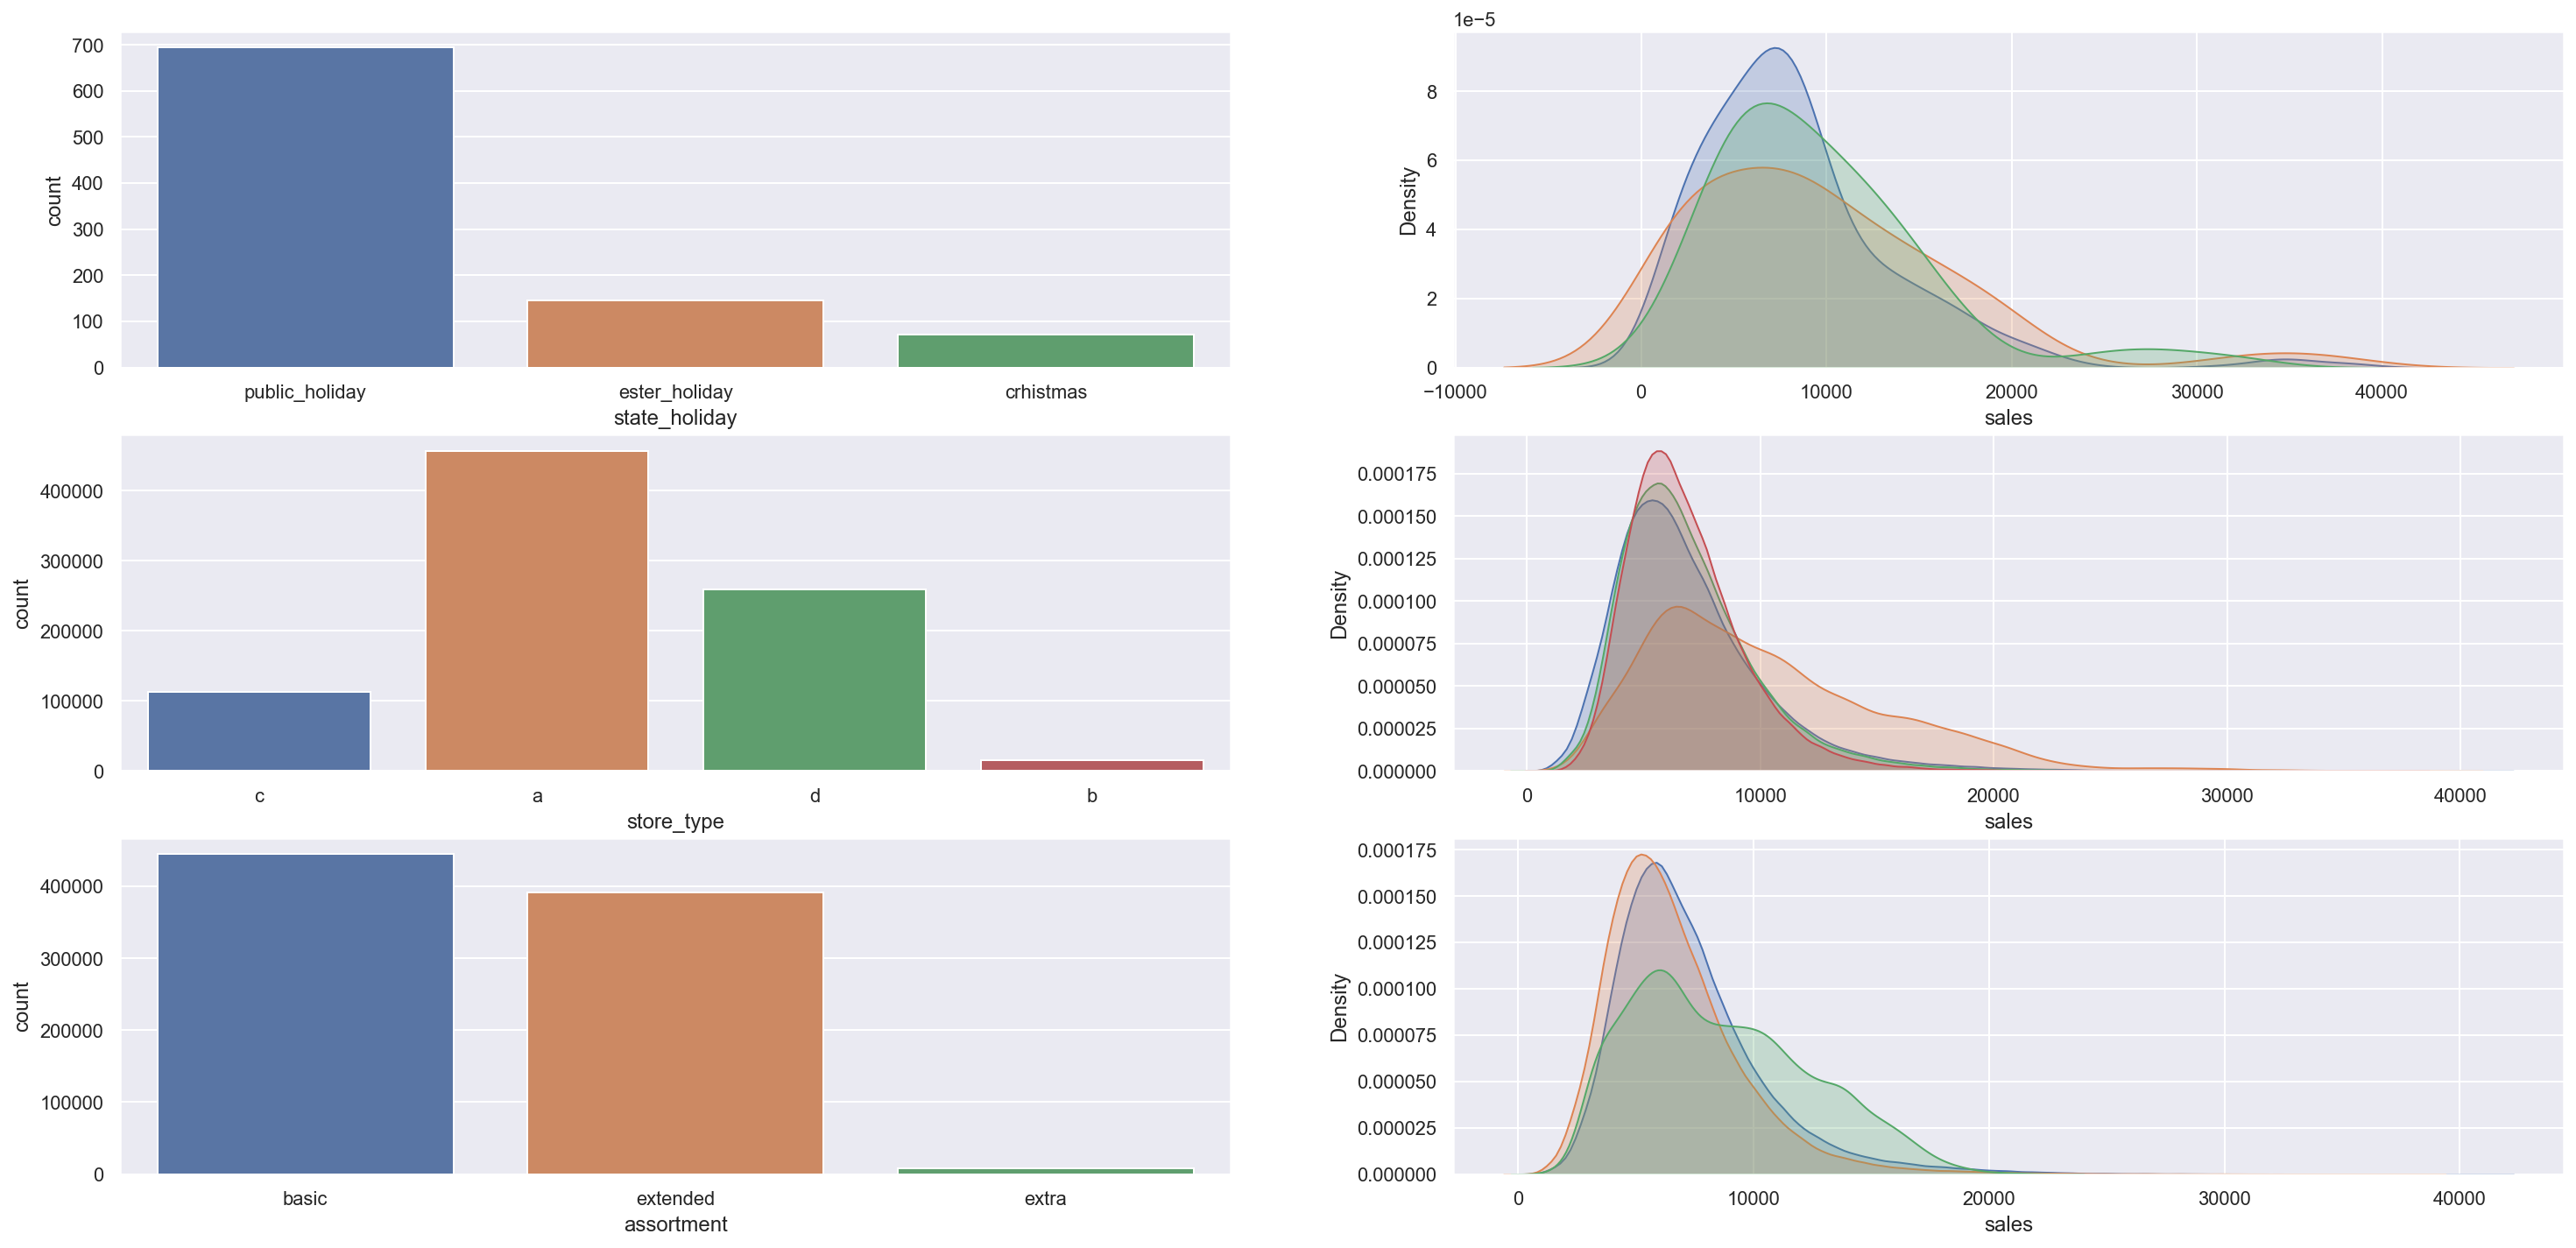

In [34]:
# state_holiday
plt.subplot (3,2,1)
a=df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot (3,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday', shade = True);
sns.kdeplot(df4[df4['state_holiday'] == 'ester_holiday']['sales'], label = 'ester_holiday', shade = True);
sns.kdeplot(df4[df4['state_holiday'] == 'crhistmas']['sales'], label = 'crhistmas', shade = True);


# store_type
plt.subplot (3,2,3)
sns.countplot(df4['store_type'])

plt.subplot (3,2,4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label = 'a', shade = True);
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label = 'b', shade = True);
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label = 'c', shade = True);
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label = 'd', shade = True);


# assortment
plt.subplot (3,2,5)
sns.countplot(df4['assortment'])

plt.subplot (3,2,6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label = 'extended', shade = True);
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label = 'basic', shade = True);
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label = 'extra', shade = True);

## 4.2 Analise Bivariada

### **H1.** Lojas com maior sortimento deveriam vender mais.


**FALSA** lojas COM MAIOR sortimento vendem MENOS

<AxesSubplot:xlabel='year_week'>

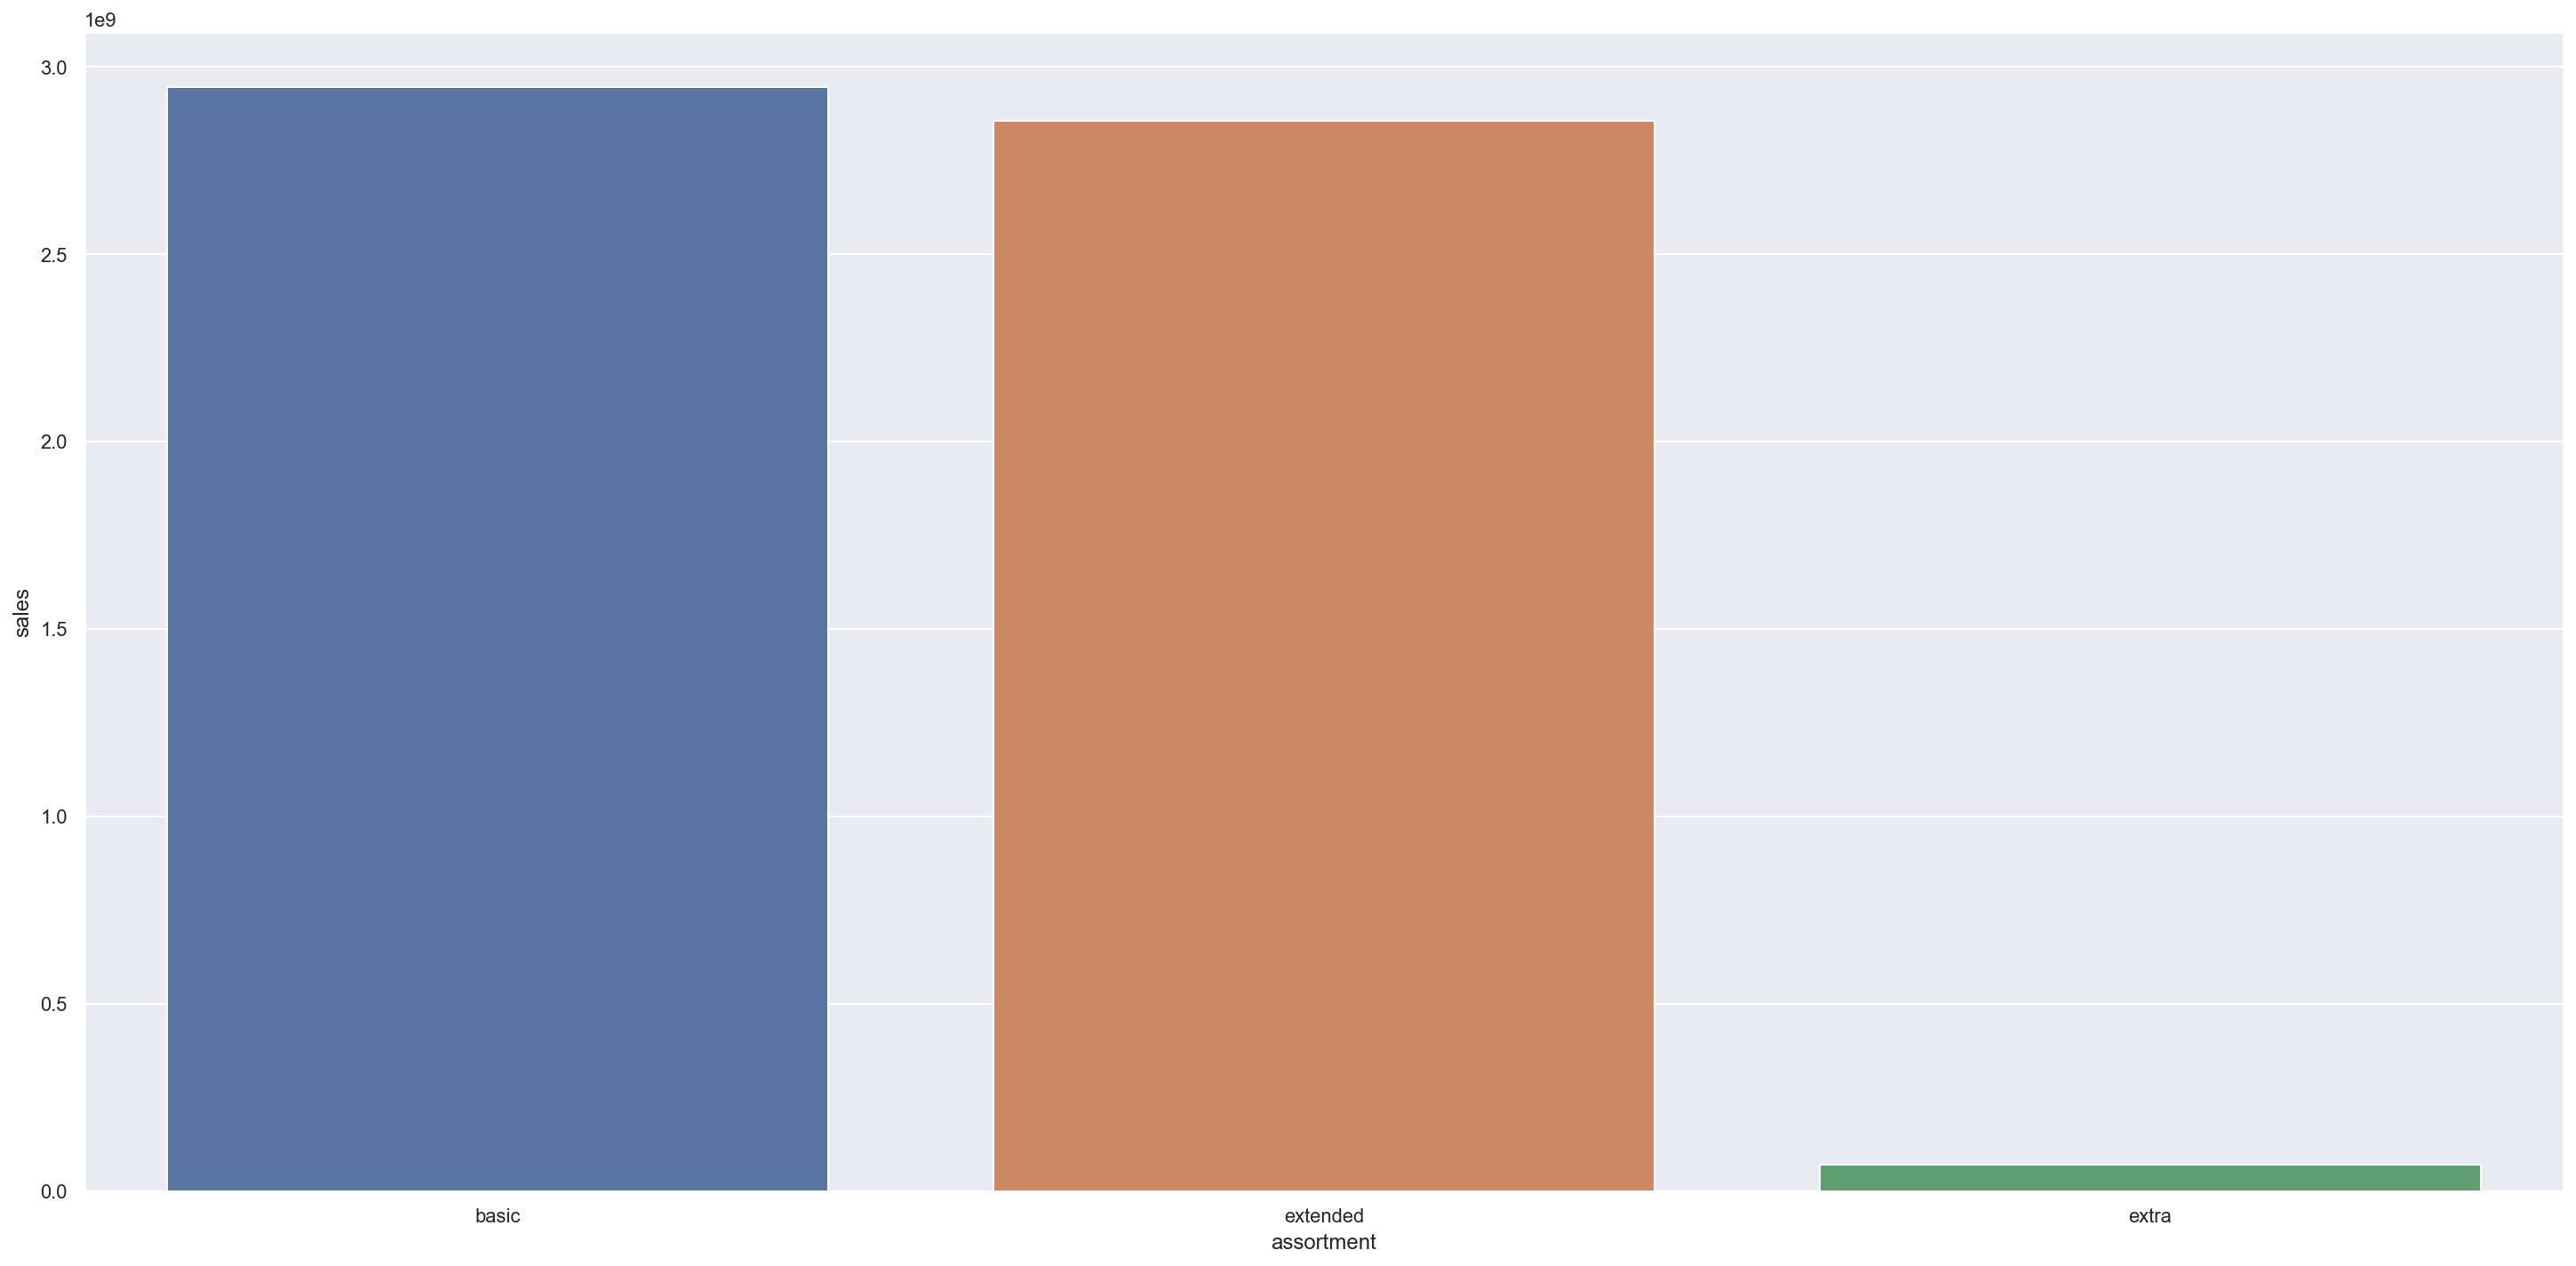

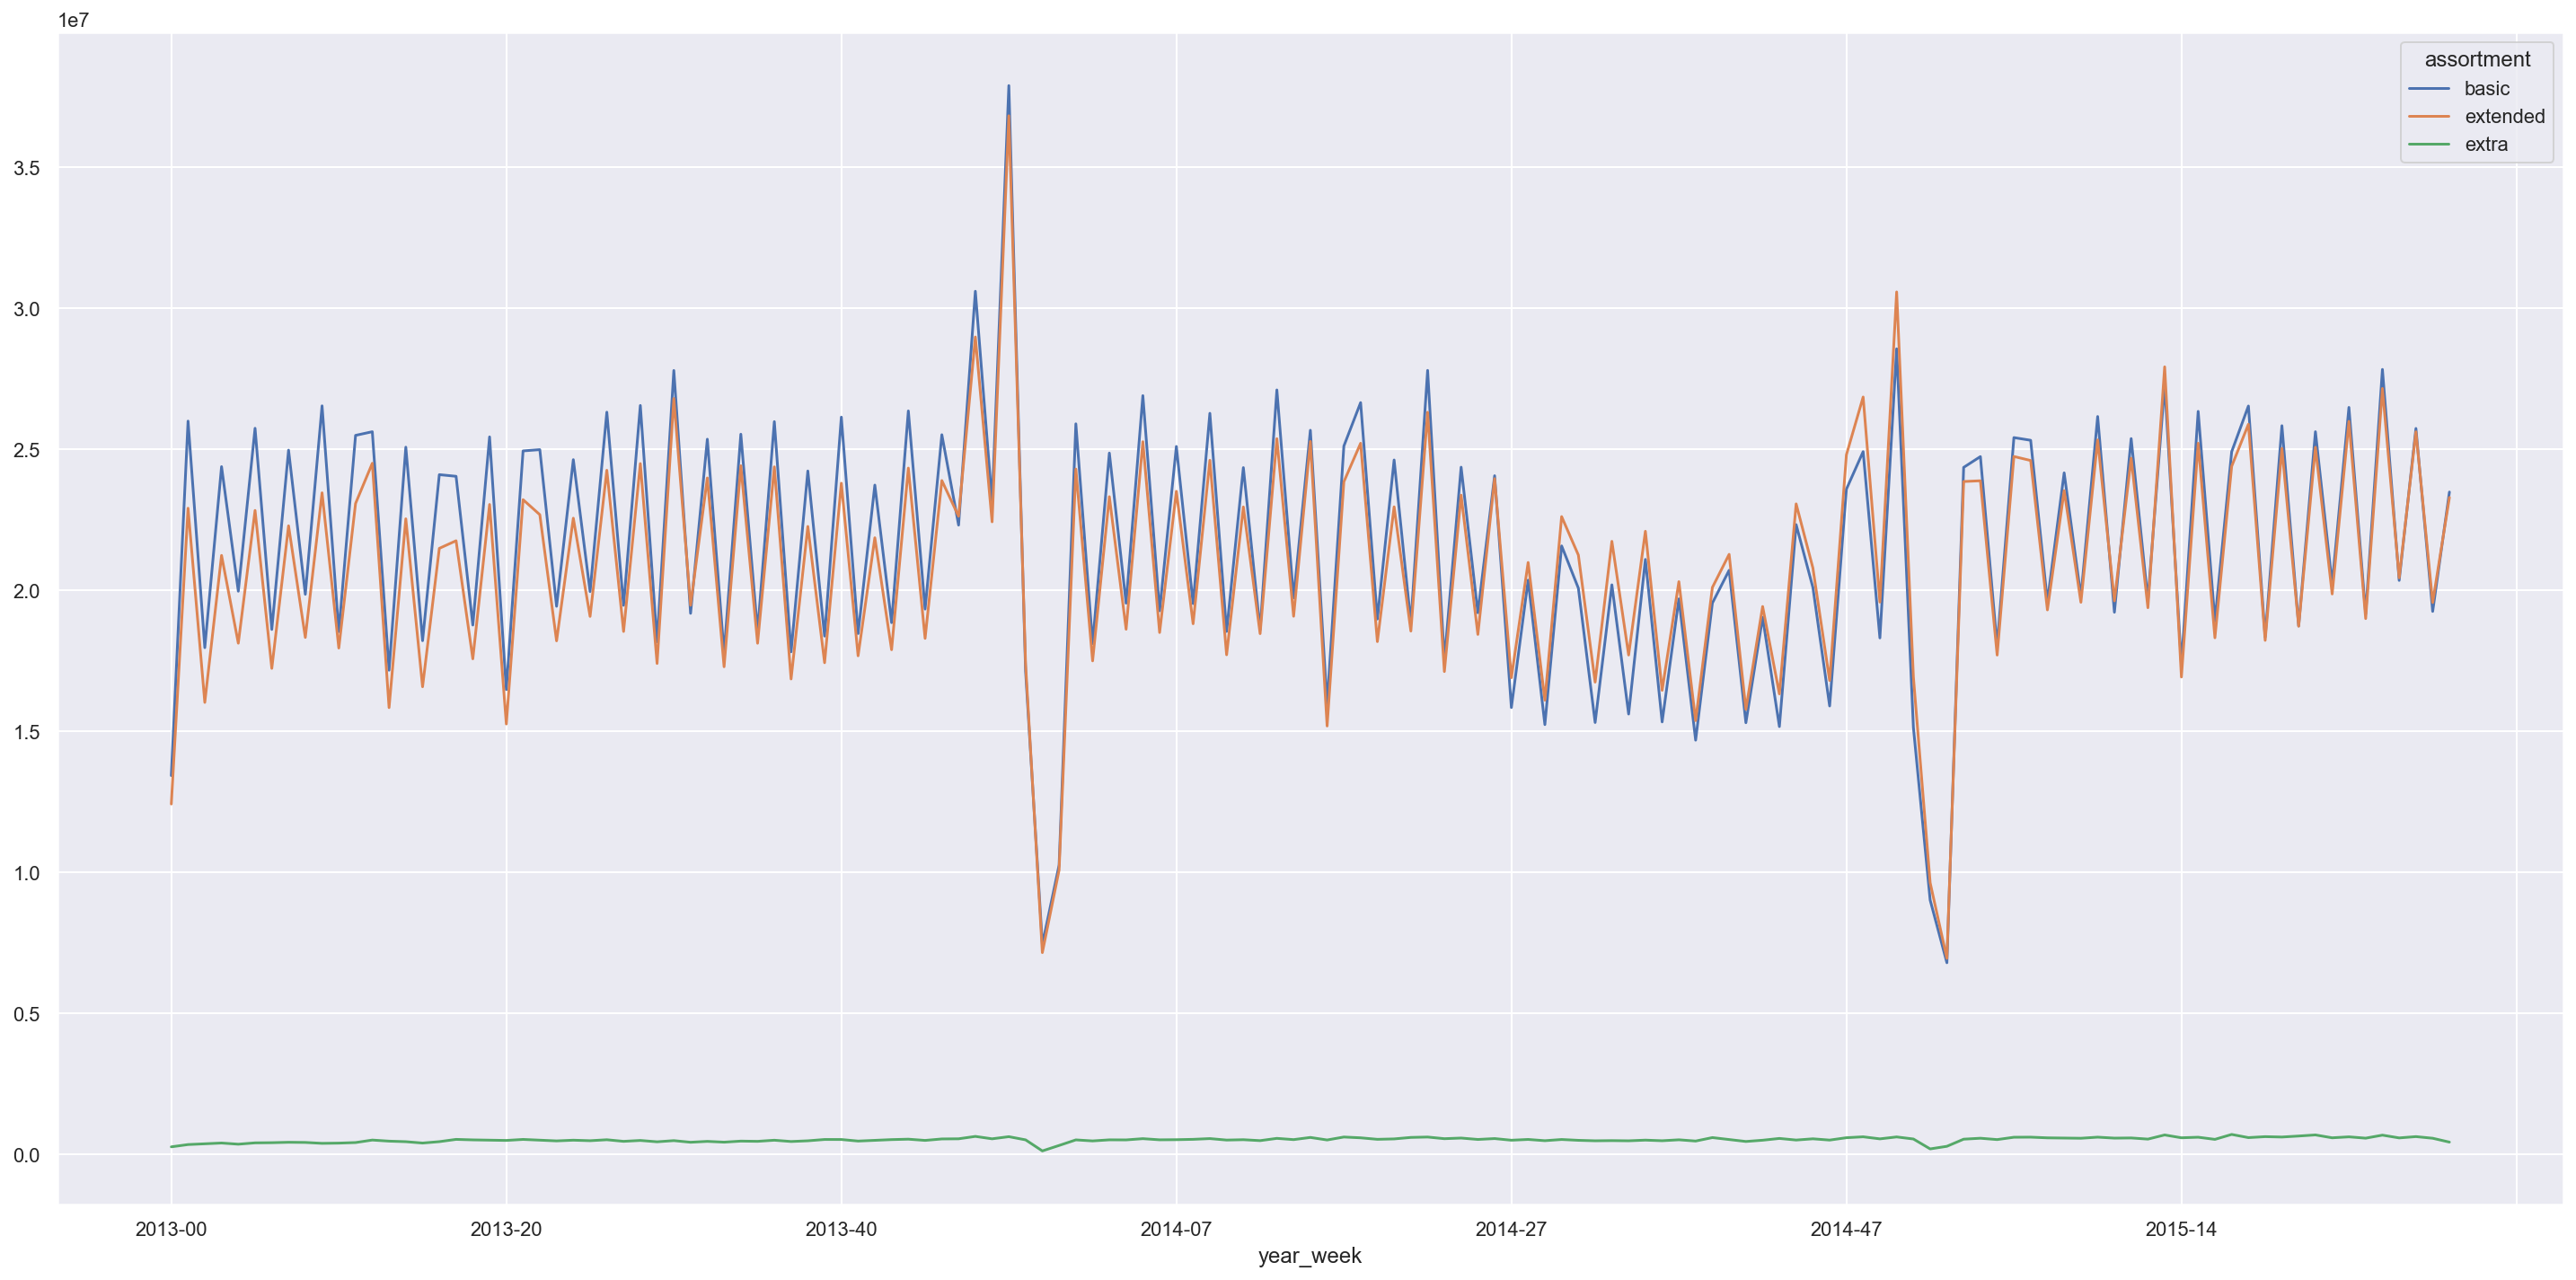

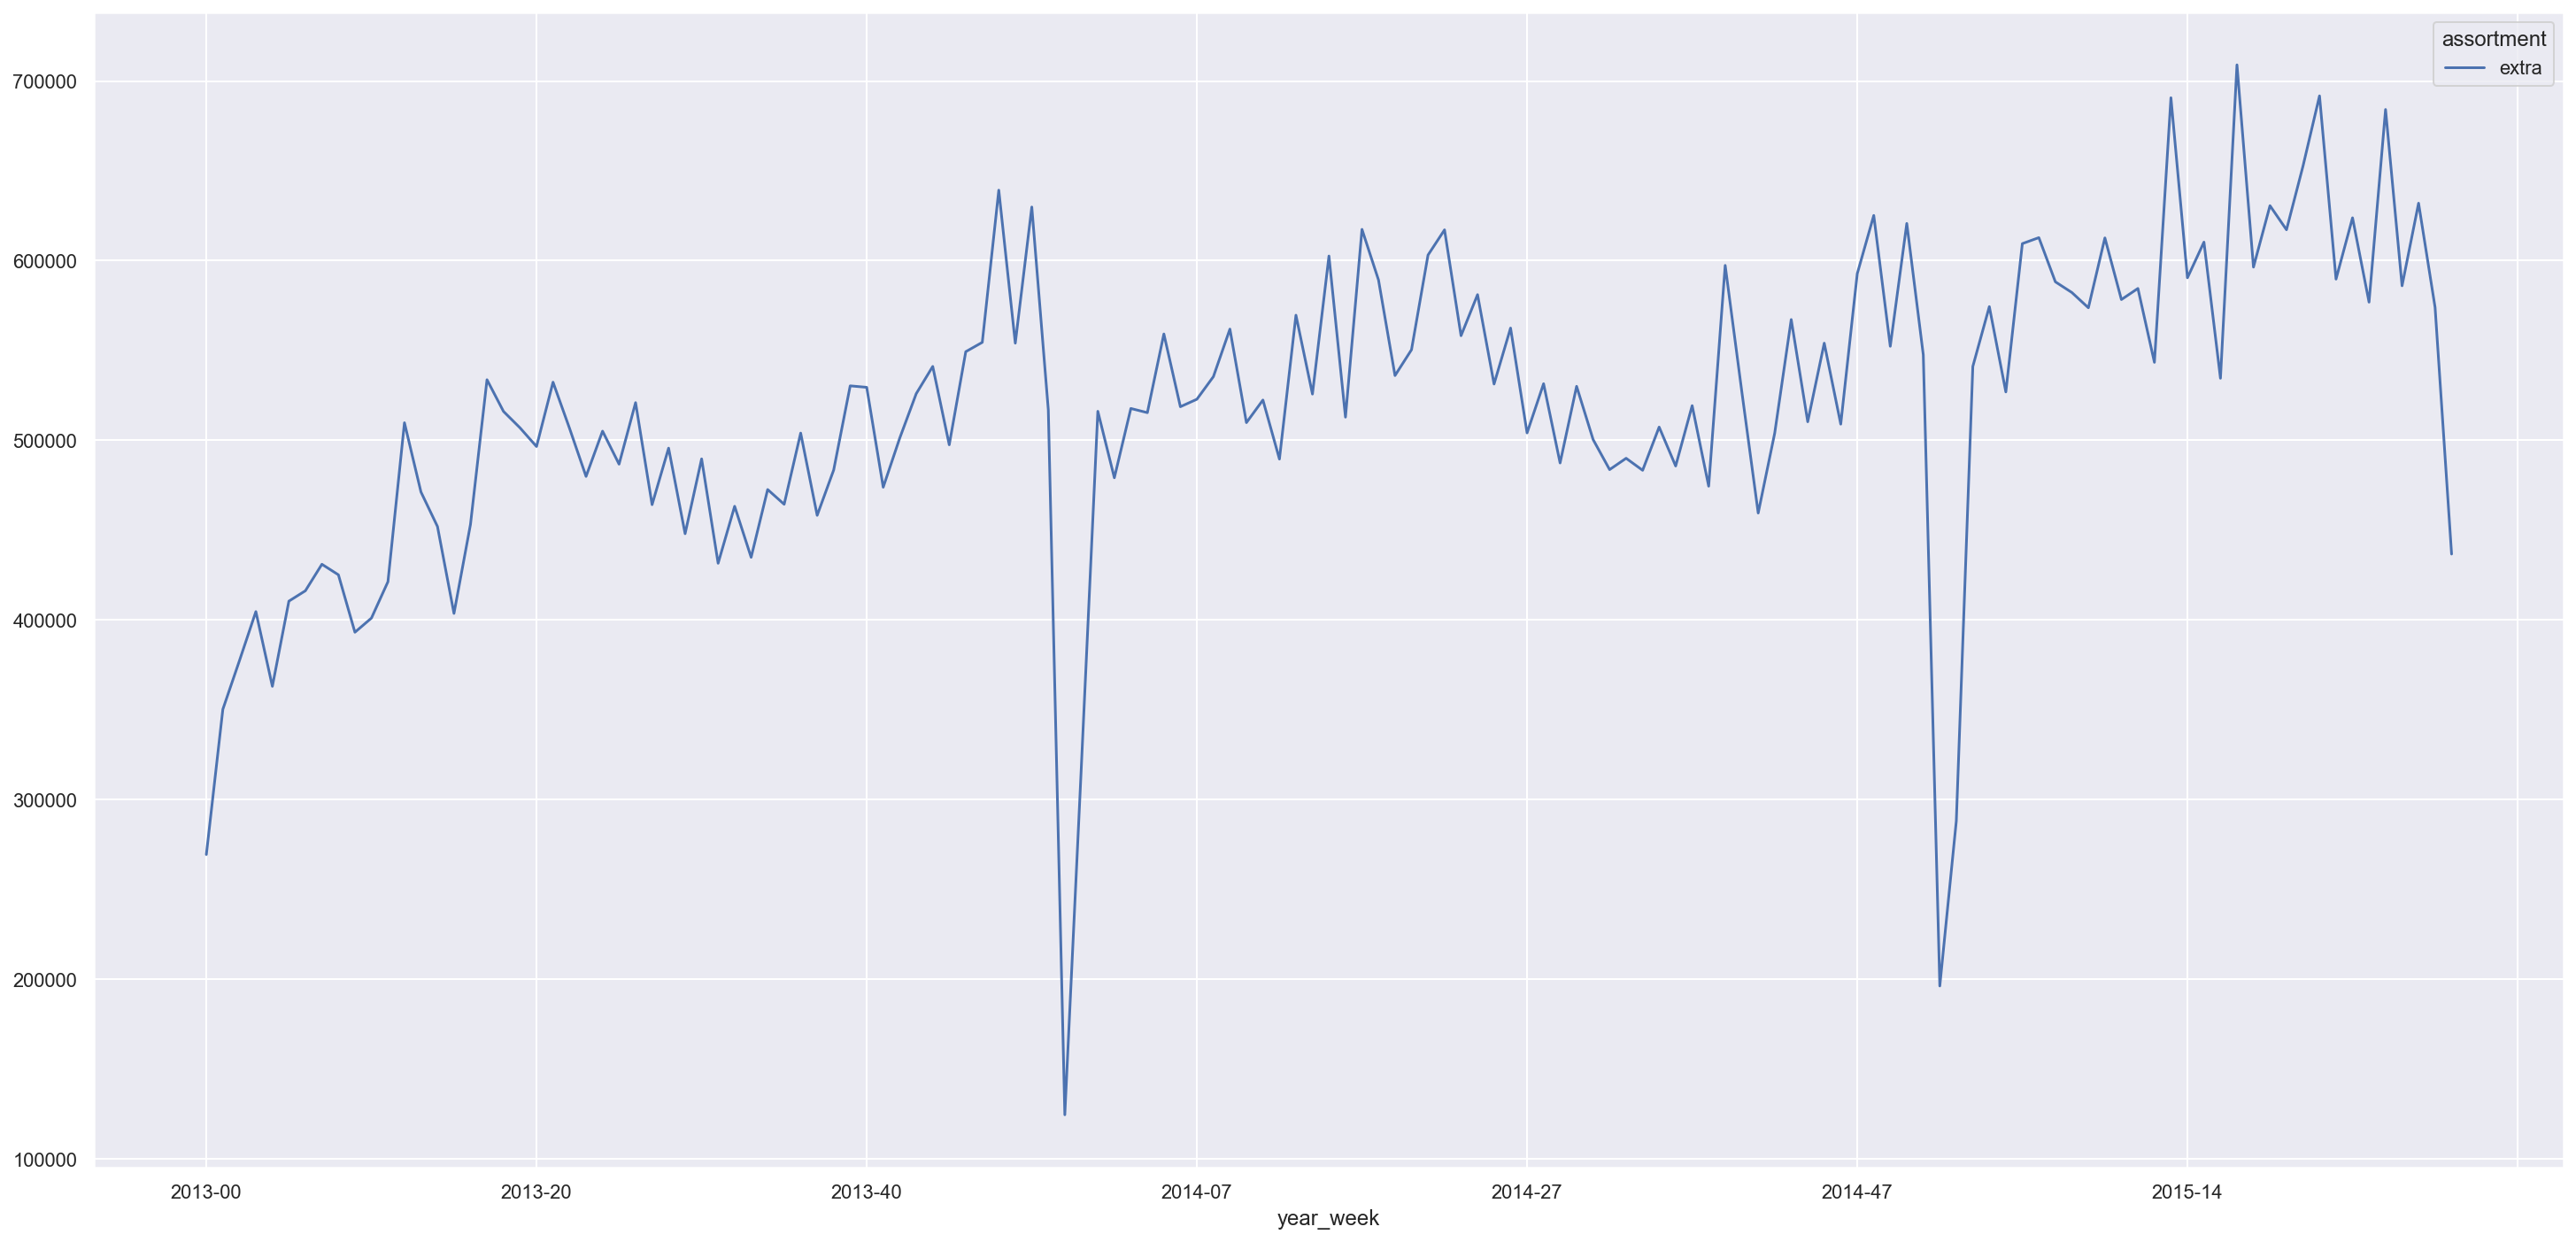

In [35]:
aux1 = df4[['assortment','sales']].groupby ('assortment').sum().reset_index()
#data eh de onde veio os dados
sns.barplot(x='assortment',y='sales',data=aux1);



aux2 = df4[['year_week','assortment','sales']].groupby (['year_week','assortment']).sum().reset_index()
#como fazer um pivot de valor de coluna tranformando-os em colunas distintas
aux2.pivot(index='year_week',columns='assortment',values='sales').plot()
#posso dar um aux2 em 3 e dar um head para ver como os valores que estavam na coluna assortments se comportam

# olhando comportamento separado do assortment extra
aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index='year_week',columns='assortment',values='sales').plot()


### **H2.** Lojas com competidores mais proximos deveriam vender menos.

**False** Lojas com COMPETIDORES MAIS PROXIMOS vendem MAIS.

<AxesSubplot:xlabel='competition_distance_binned', ylabel='sales'>

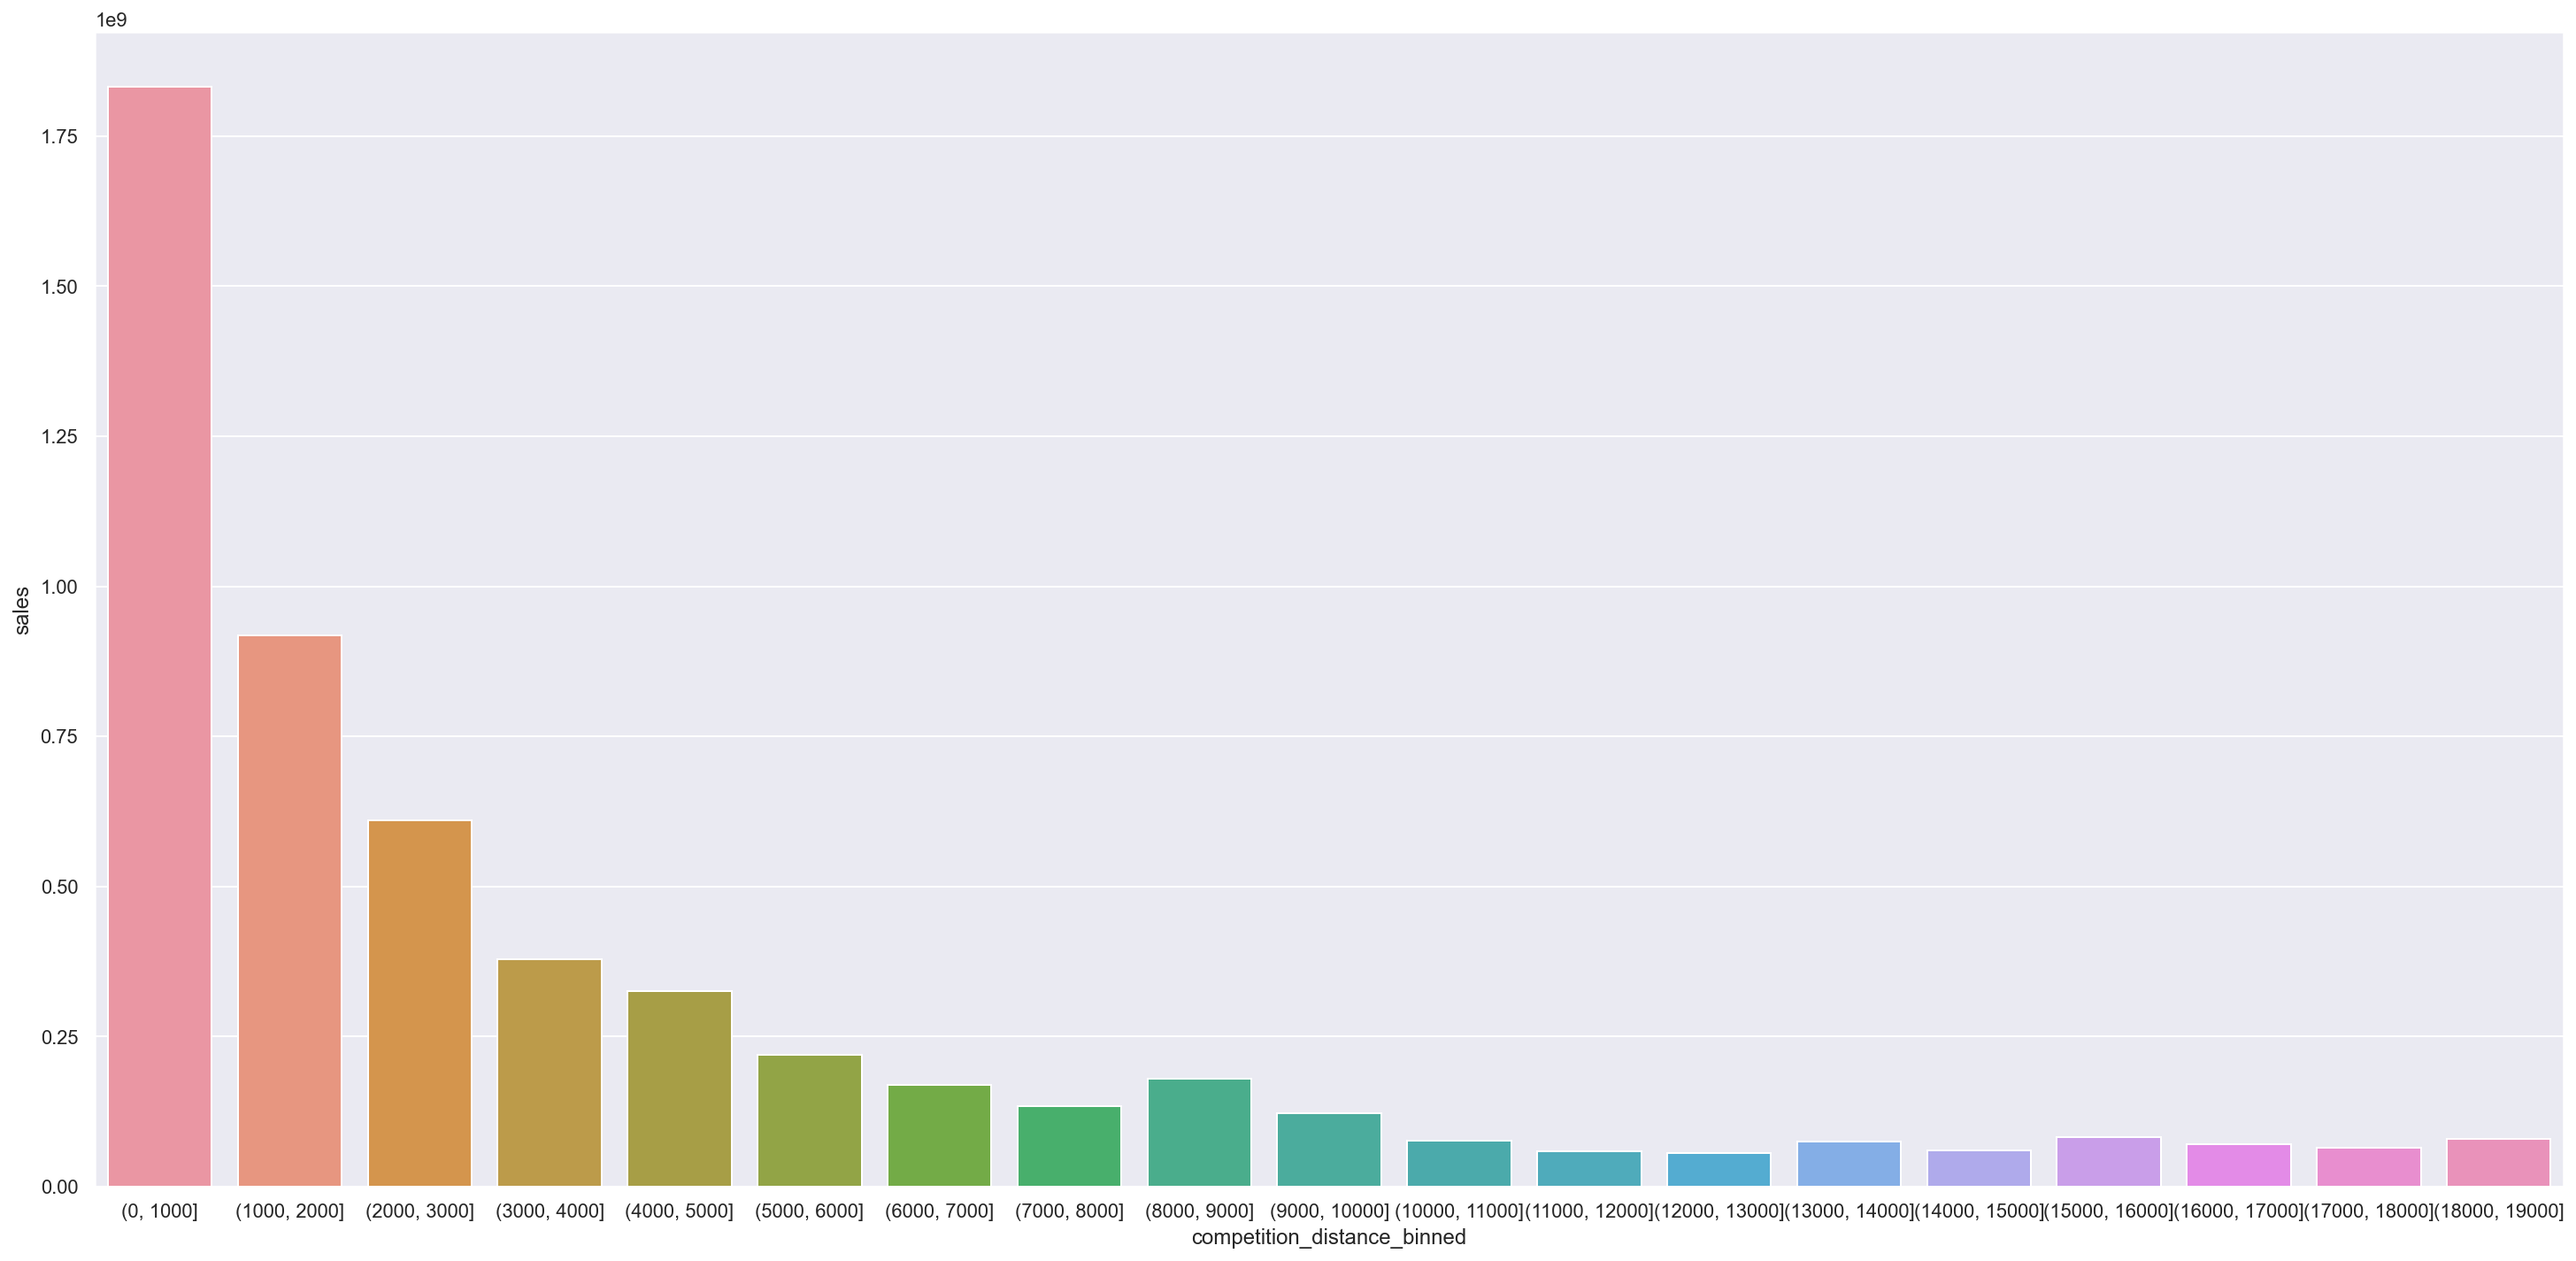

In [36]:
aux1 = df4[['competition_distance', 'sales']].groupby ('competition_distance').sum().reset_index()

bins = list (np.arange ( 0,20000,1000 ) )

# cut pega os bins e coloca nos grupos determinados acima 1000 em 1000
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()


sns.barplot ( x='competition_distance_binned', y='sales', data=aux2 )

<AxesSubplot:xlabel='competition_distance', ylabel='sales'>

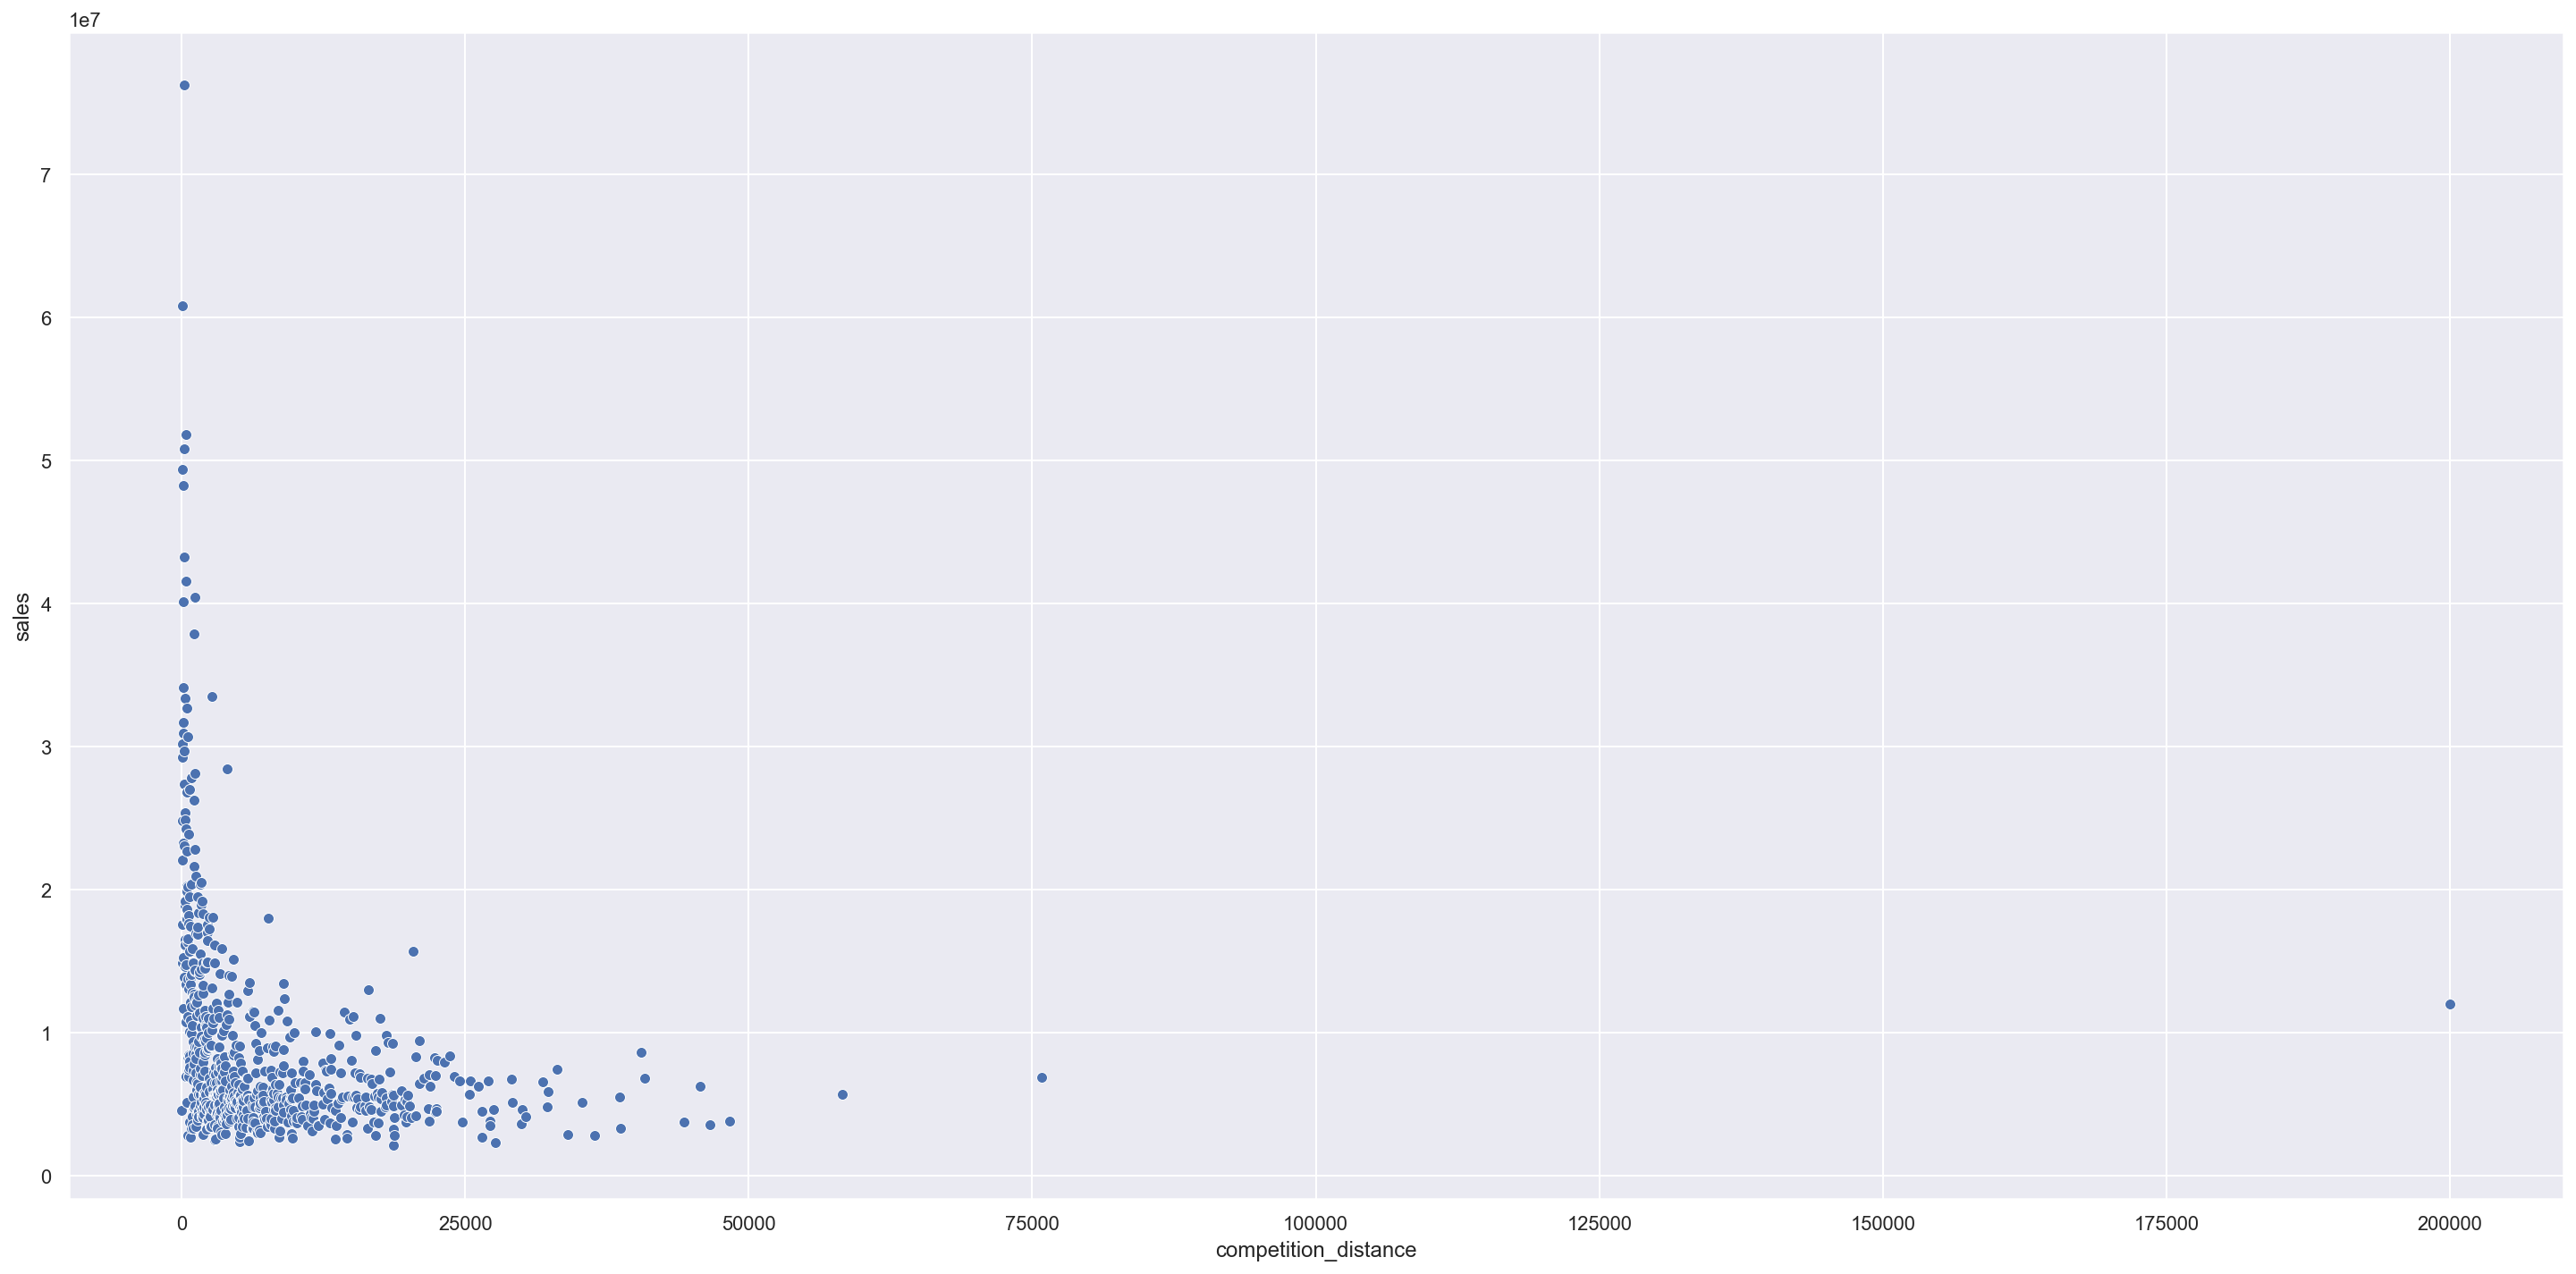

In [37]:
# quando tenho um valor muito alto ou uma granularidade alta e nao necessito colocar os dados em grupos como mencionado acima, usar o scatter plot eh uma otima saida
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

sns.scatterplot ( x = 'competition_distance', y='sales', data=aux1 )


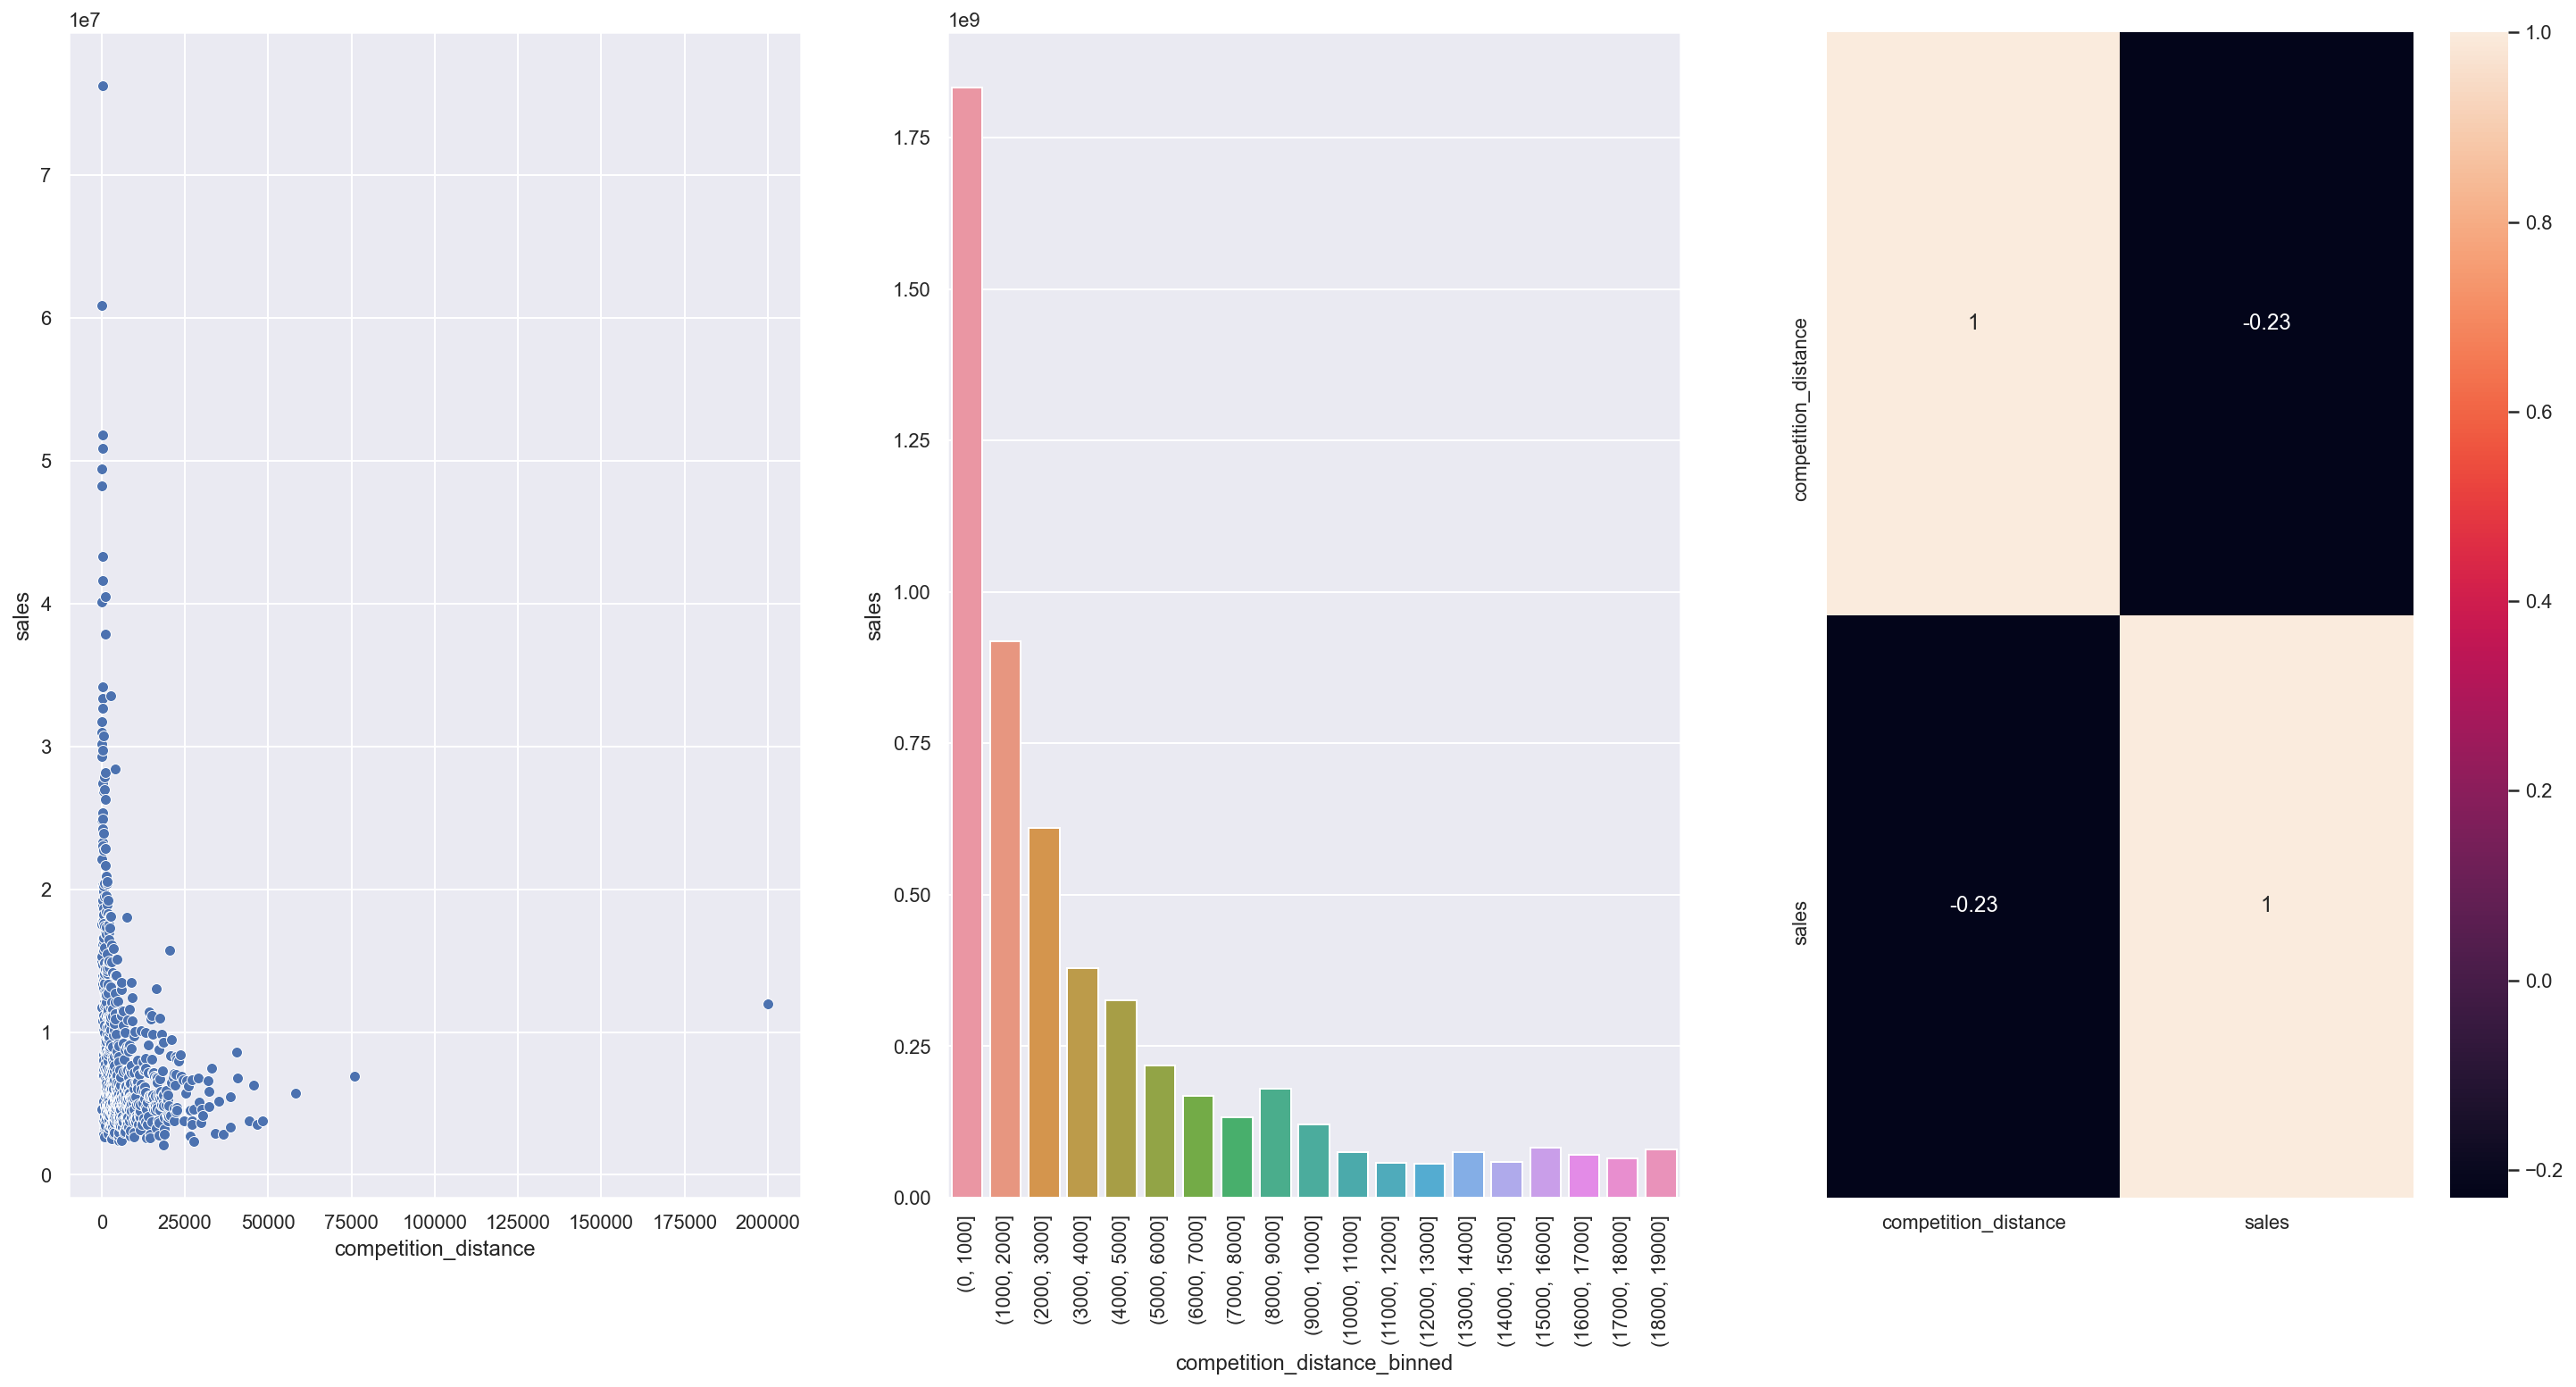

In [38]:
# crie um grafico que meca a forca da corelacao da competition distance e as vendas
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
plt.subplot (1,3,1)
sns.scatterplot ( x = 'competition_distance', y='sales', data=aux1 )


plt.subplot (1,3,2)
bins = list (np.arange ( 0,20000,1000 ))
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot ( x='competition_distance_binned', y='sales', data=aux2 )
plt.xticks ( rotation=90 );

plt.subplot (1,3,3)             
sns.heatmap(aux1.corr( method= 'pearson'), annot=True);    

# correlacao vai de 1 a -1 se prox de 1 muito forte e se prox de -1 fraca

### **H3.** Lojas com competidores a mais tempo deveriam vender mais.

**FALSO** Lojas com COMPETIDORES A MENOS TEMPO vendem MAIS.

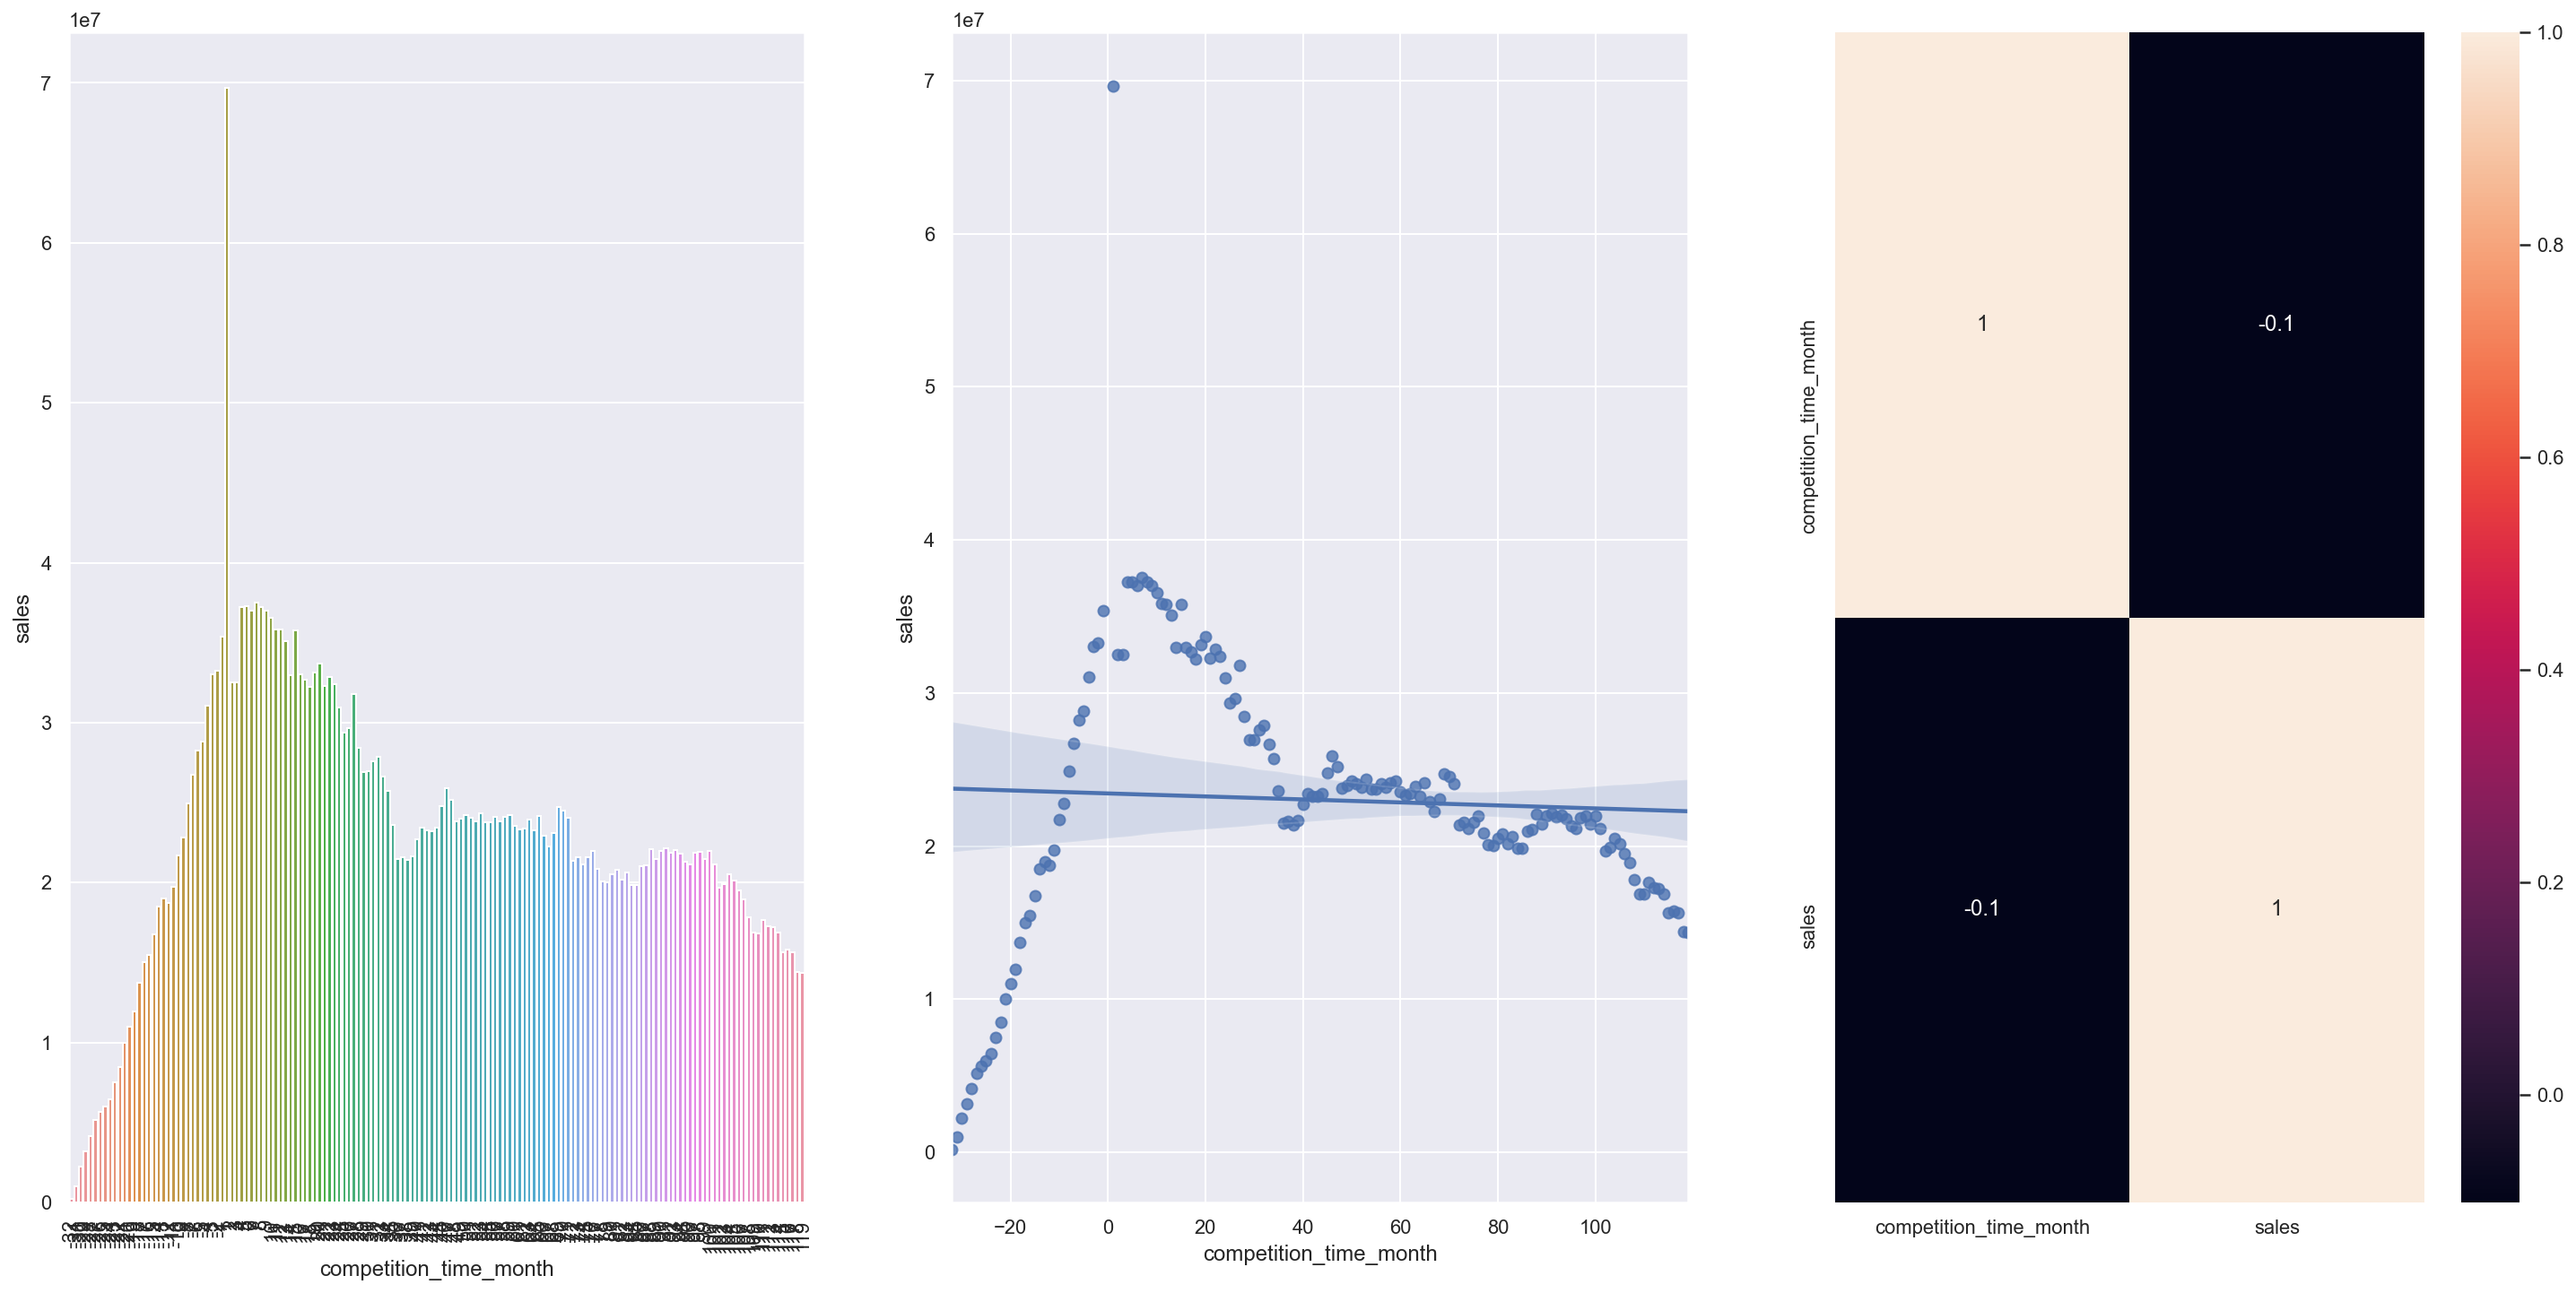

In [39]:
plt.subplot (1,3,1)
aux1 = df4[['competition_time_month', 'sales']].groupby ('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month']<120) & (aux1['competition_time_month']!=0)]
sns.barplot(x='competition_time_month',y='sales', data=aux2)
plt.xticks (rotation=90);

plt.subplot (1,3,2)
sns.regplot(x='competition_time_month',y='sales', data=aux2);

plt.subplot (1,3,3)
sns.heatmap(aux1.corr( method= 'pearson'), annot=True);    




### **H4.** Lojas com promo ativas por mais tempo deveriam vender mais.


**FALSE** Lojas com promo ativas POR MAIS TEMPO vendem MENOS, de acordo com um certo periodo de promocoa

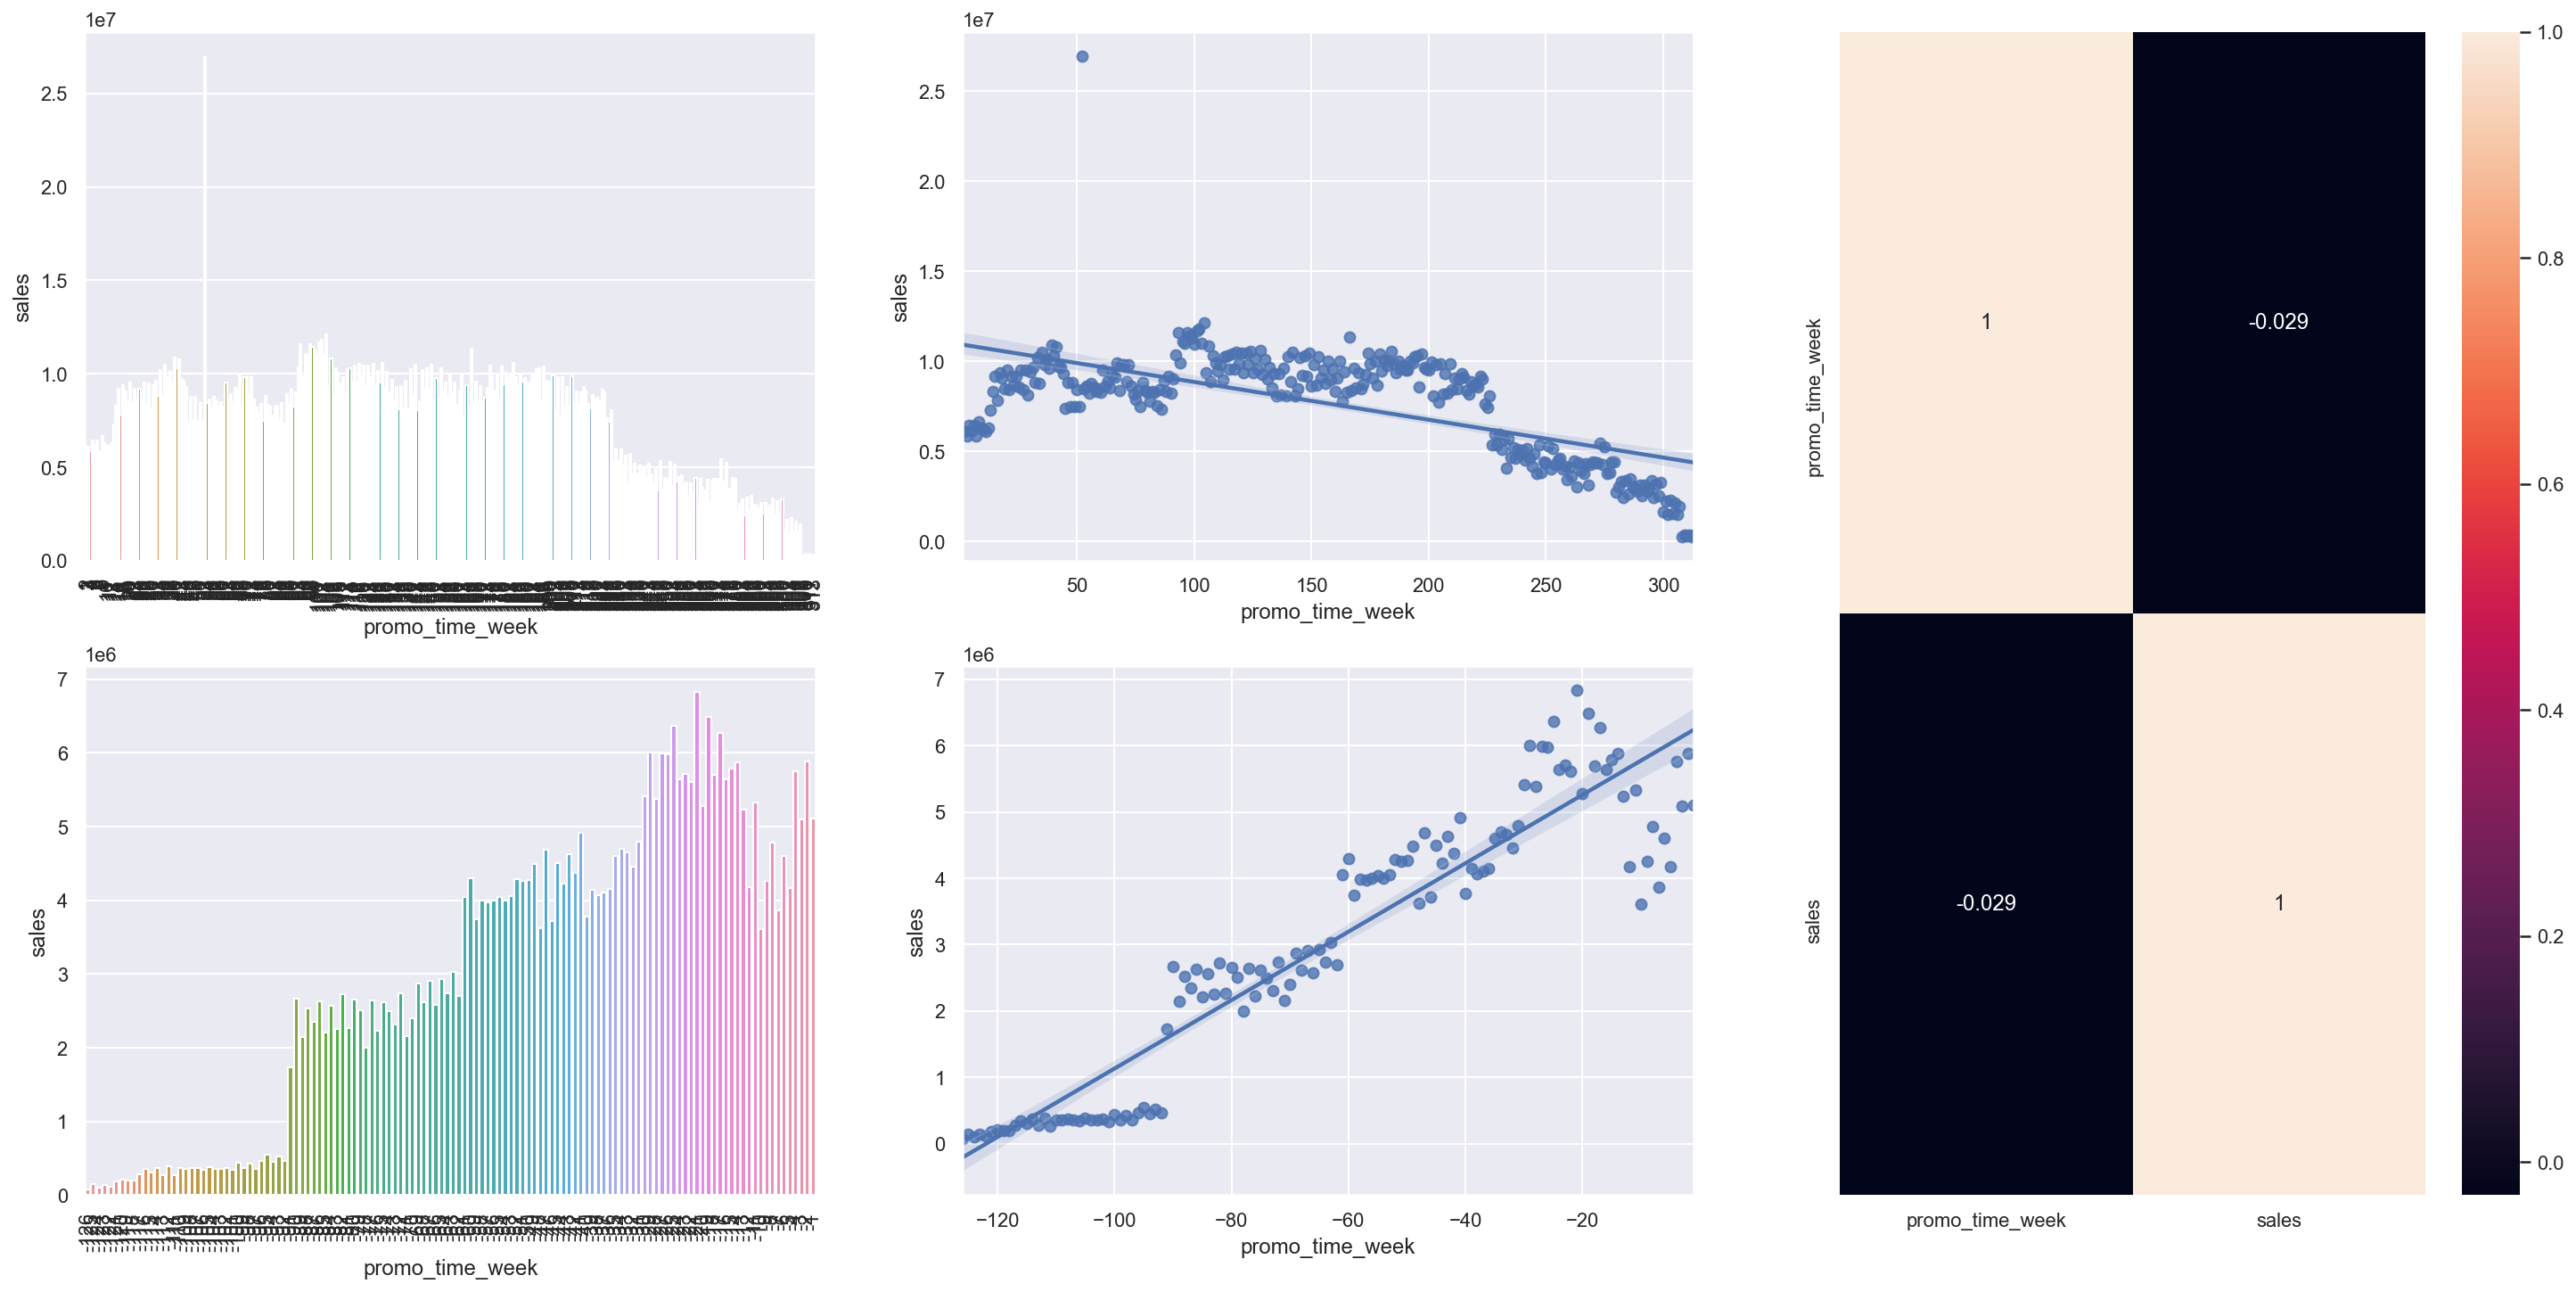

In [40]:
#promotimeweek positivo significa que foi feito a compra dentro da semana de promo extendida pois temos a subtracao da data de inicio com a da compra
# promotimeweek negativo a compra foi fieta em seu periodo tradicional de promocao



aux1=df4[['promo_time_week', 'sales']].groupby ('promo_time_week').sum().reset_index()

grid=GridSpec(2,3)

plt.subplot(grid[0,0])
#toda vez que estou interessado nas linhas e nas colunas devo ter a repeticao do df
aux2= aux1[aux1['promo_time_week']>0] #promo extendida
sns.barplot ( x='promo_time_week', y='sales', data=aux2);
plt.xticks(rotation=90);

plt.subplot(grid[0,1])
sns.regplot ( x='promo_time_week', y='sales', data=aux2);

plt.subplot(grid[1,0])
aux3= aux1[aux1['promo_time_week']<0] #promo tradicional
sns.barplot ( x='promo_time_week', y='sales', data=aux3);
plt.xticks(rotation=90);

plt.subplot(grid[1,1])
sns.regplot ( x='promo_time_week', y='sales', data=aux3);

plt.subplot(grid[:,2])
sns.heatmap(aux1.corr(method='pearson'),annot=True);

### <s> **H5.** Lojas com mais dias de promo ativas por mais tempo deveriam vender mais. fazer no prox xixlo de crysp. </s>

### **H6.** Lojas com mais promo consecutivas deveriam vender mais.

**FALSE** Lojas com MAIS PROMOCAO consecutivas VENDEM MENOS

In [41]:
df4[['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index()

promo  promo2       sales
0      0       0  1482612096
1      0       1  1289362241
2      1       0  1628930532
3      1       1  1472275754

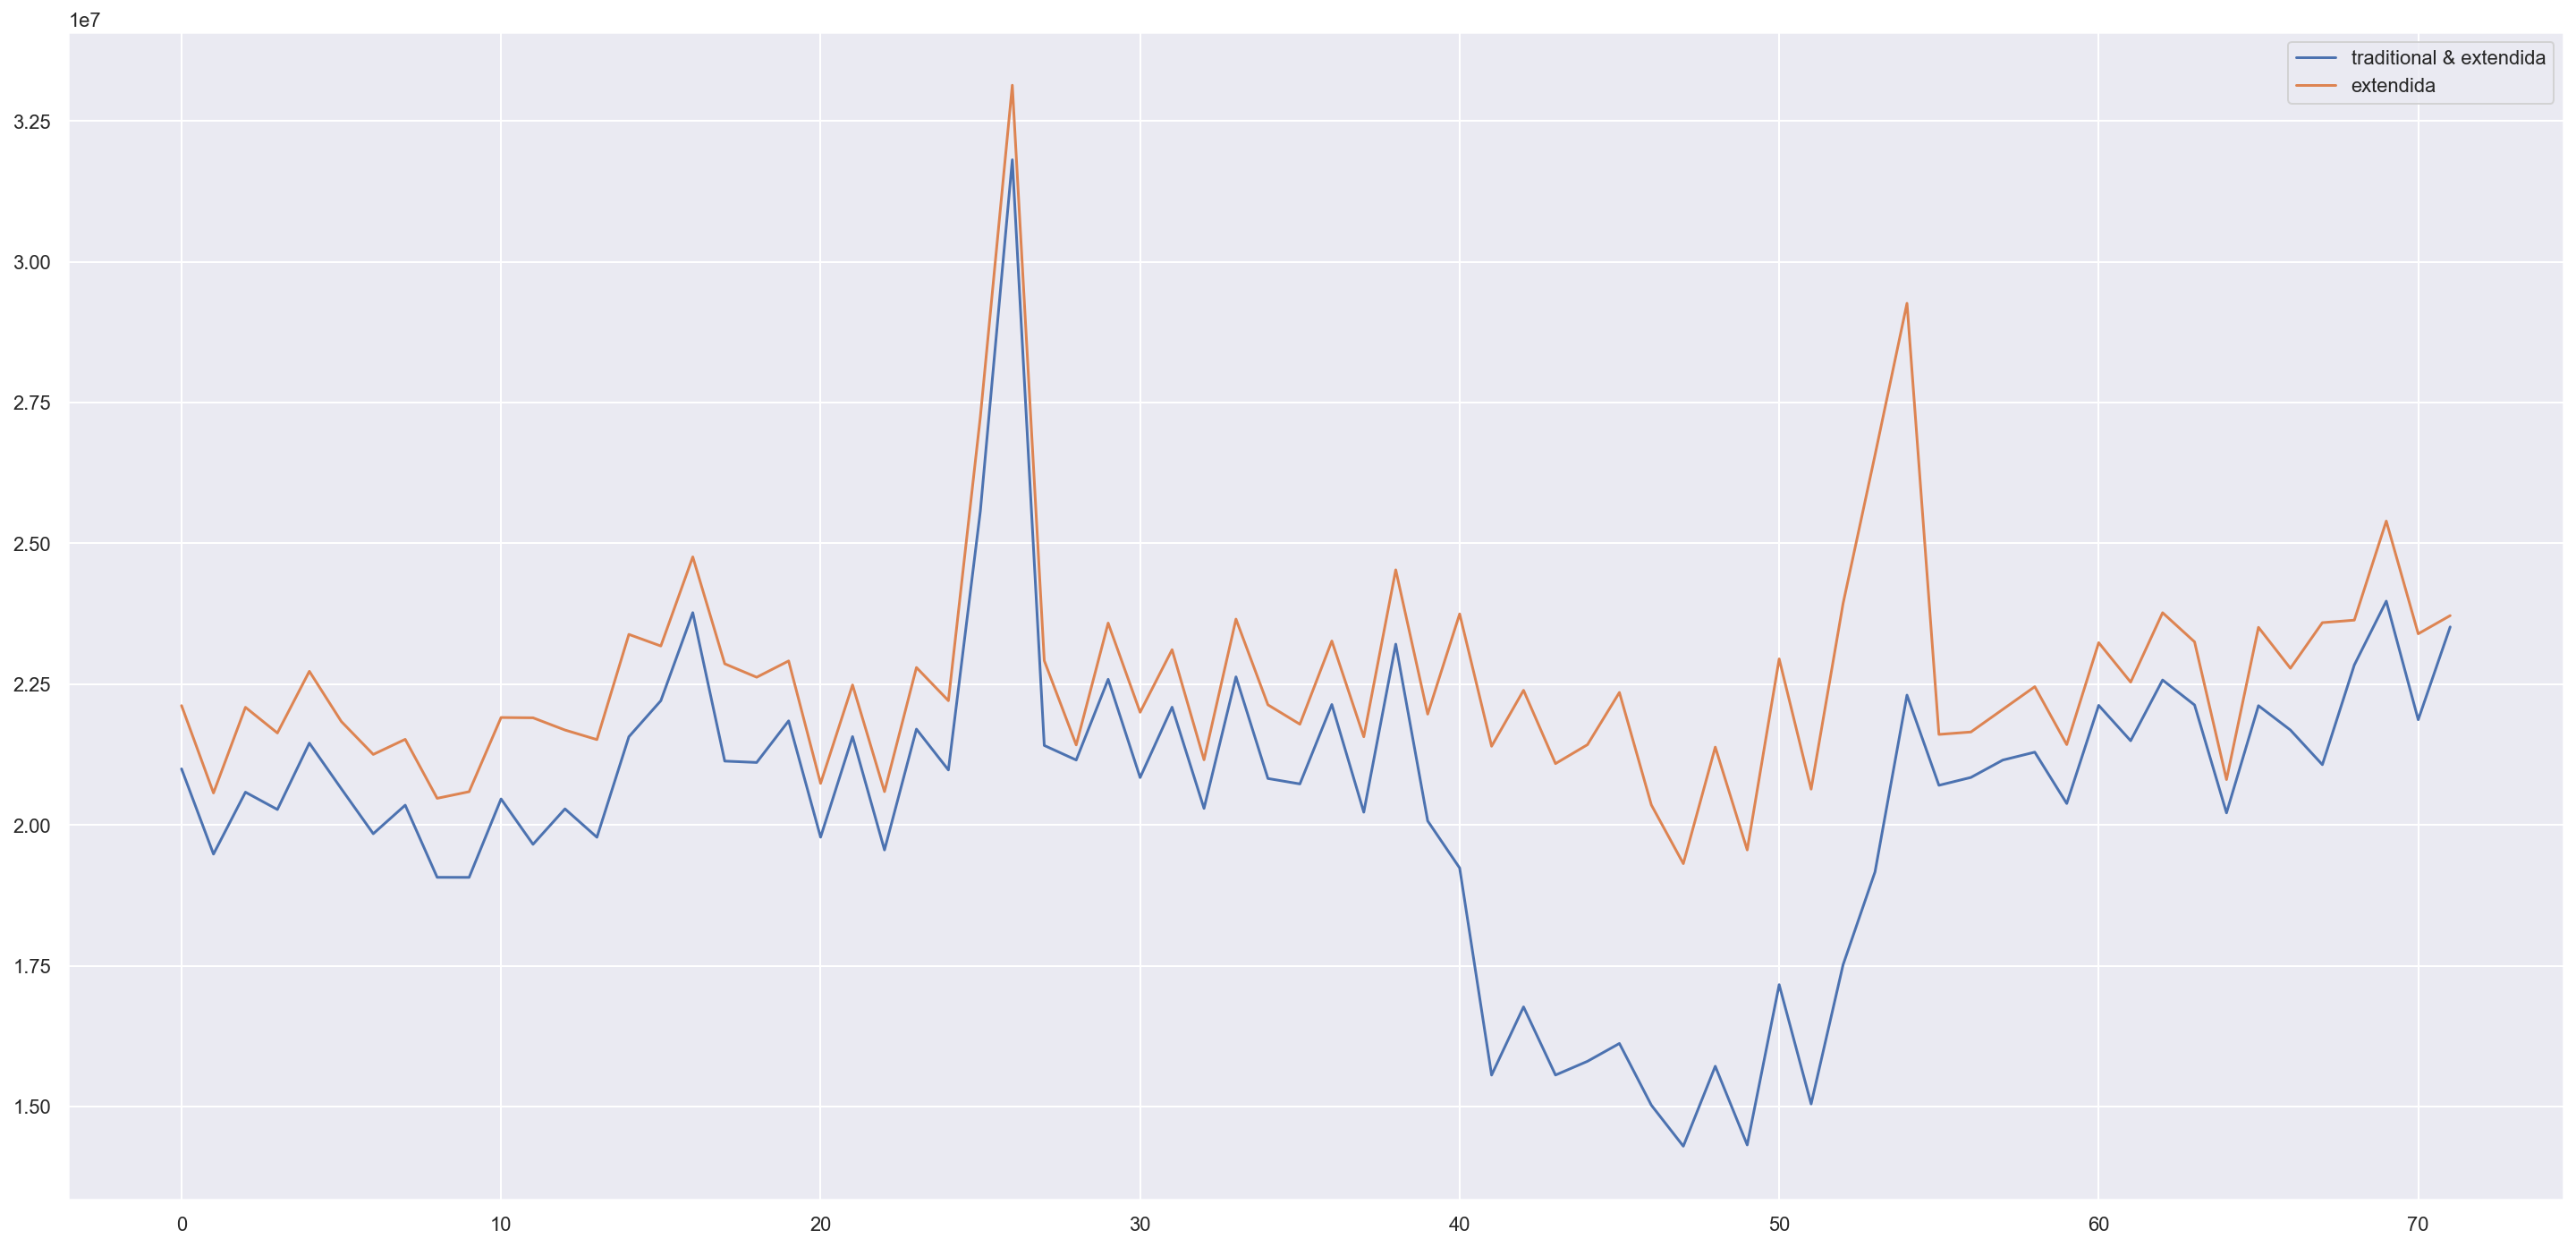

In [42]:
#check para ver se teve alteracao no comportamento das lojas que tiveram promo normal e extendida
aux1=df4[(df4['promo']==1 )&(df4['promo2']==1)][['year_week','sales']].groupby('year_week').sum().reset_index()
ax=aux1.plot ();


aux2=df4[(df4['promo']==1 )&(df4['promo2']==0)][['year_week','sales']].groupby('year_week').sum().reset_index()
aux2.plot (ax=ax);

ax.legend(labels=['traditional & extendida','extendida']);

### **H7.** Lojas abertas durante o natal deveriam vender mais.

**False** Lojas abertas no natal VENDEM MENOS.

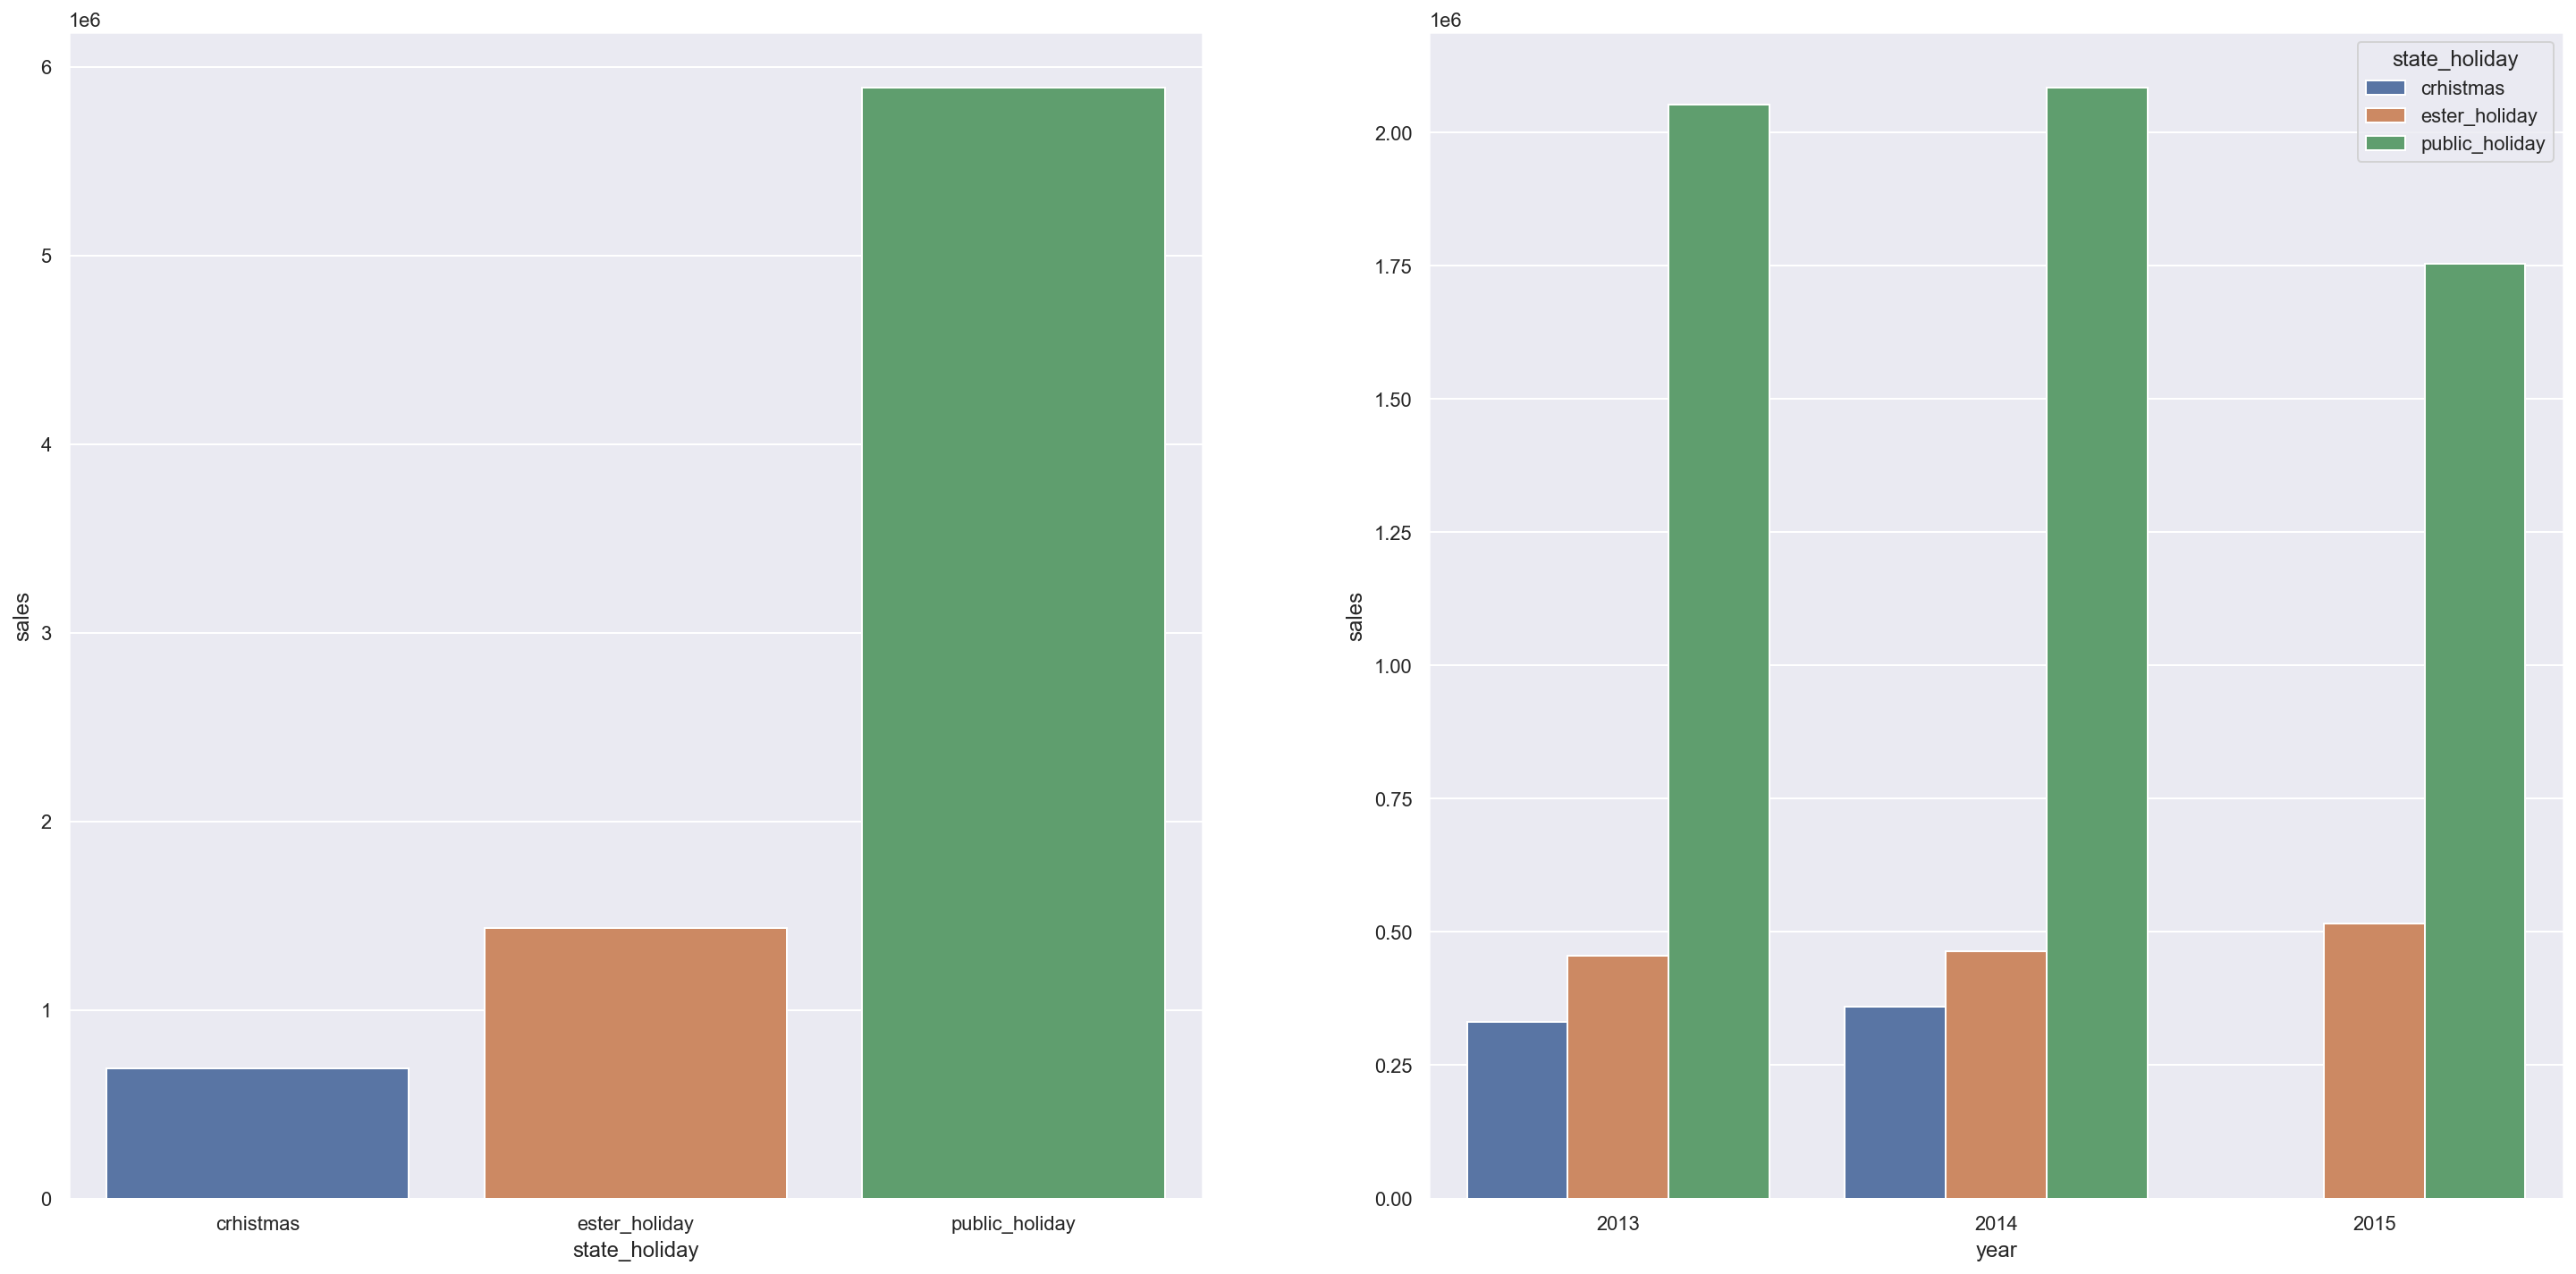

In [43]:
plt.subplot (1,2,1)
aux=df4[df4['state_holiday']!= 'regular_day']
aux1 = aux [['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot( x='state_holiday', y='sales', data=aux1);

plt.subplot (1,2,2)
aux2=aux[['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
# hue tipos de barras que eu quero neste caso a cada feriado uma barra
sns.barplot( x='year', y='sales',hue='state_holiday', data=aux2);


### **H8.** Lojas deveriam vender mais ao longo dos anos.

**FALSE** Lojas VENDEM MENOS ao longo dos anos

dar uma olhada pq o ano esta quebrado

In [44]:
df4[['year']].nunique()



year    3
dtype: int64

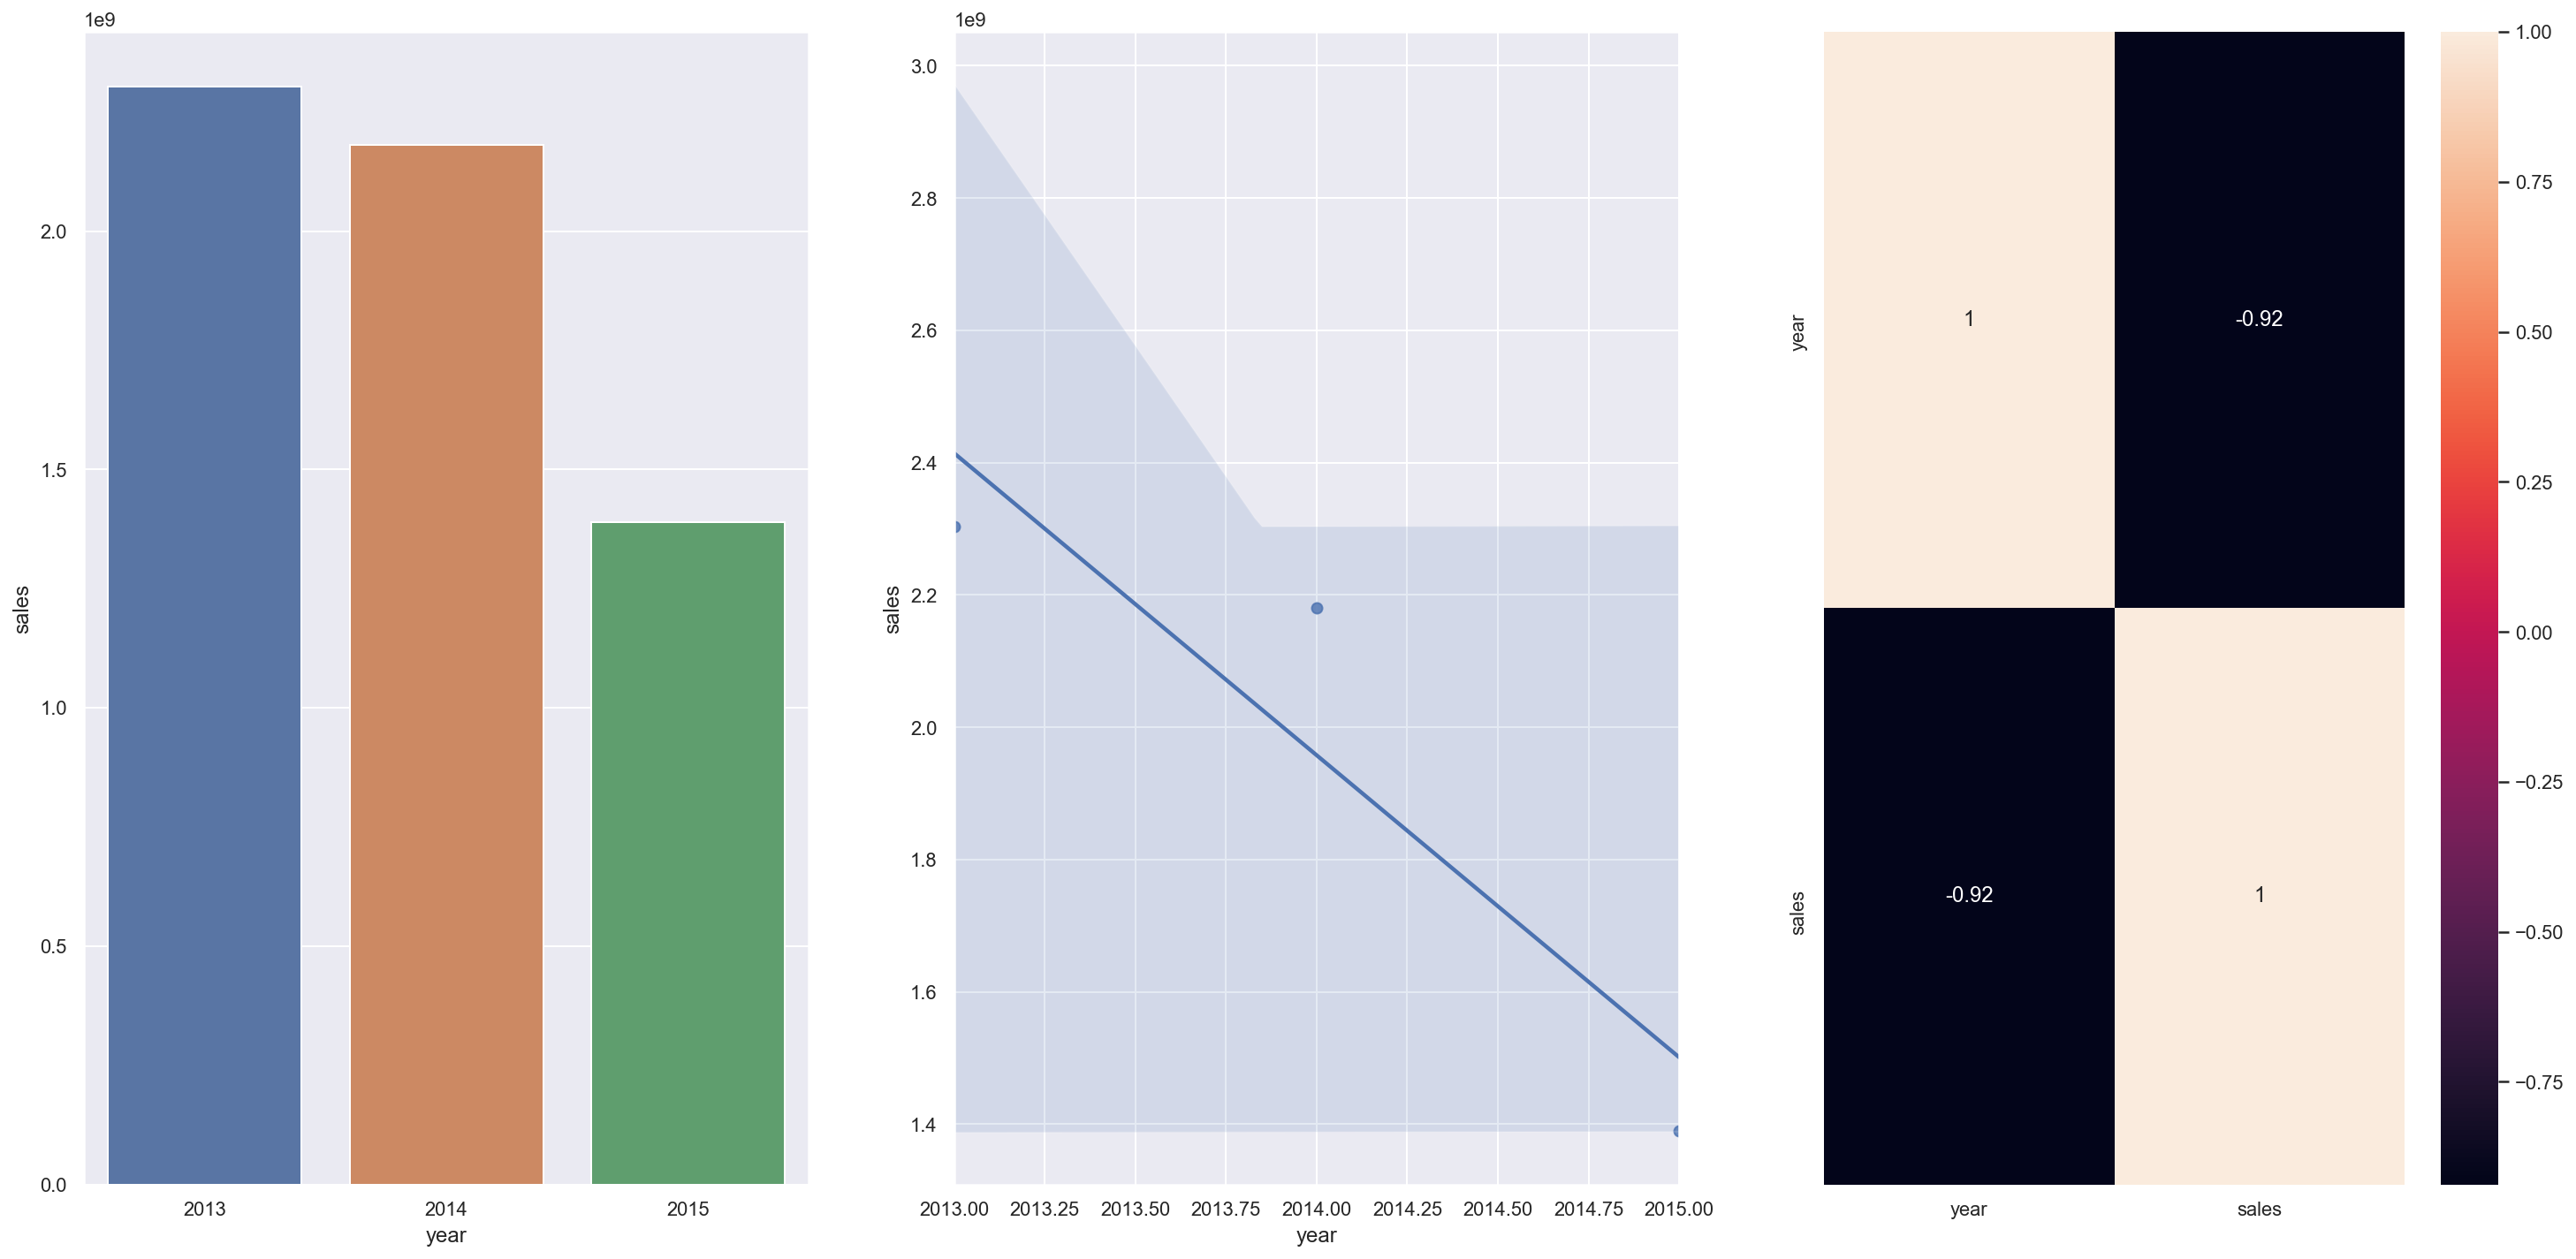

In [45]:

aux1=df4[['year','sales']].groupby('year').sum().reset_index()

plt.subplot (1,3,1)
sns.barplot( x='year', y='sales', data=aux1);

plt.subplot (1,3,2)
sns.regplot( x='year', y='sales', data=aux1);

plt.subplot (1,3,3)
sns.heatmap( aux1.corr(method='pearson'), annot=True);



### **H9.** Lojas deveriam vender mais no segundo semestre do ano.

**FALSA** Lojas vendem MENOS no 2do semestre

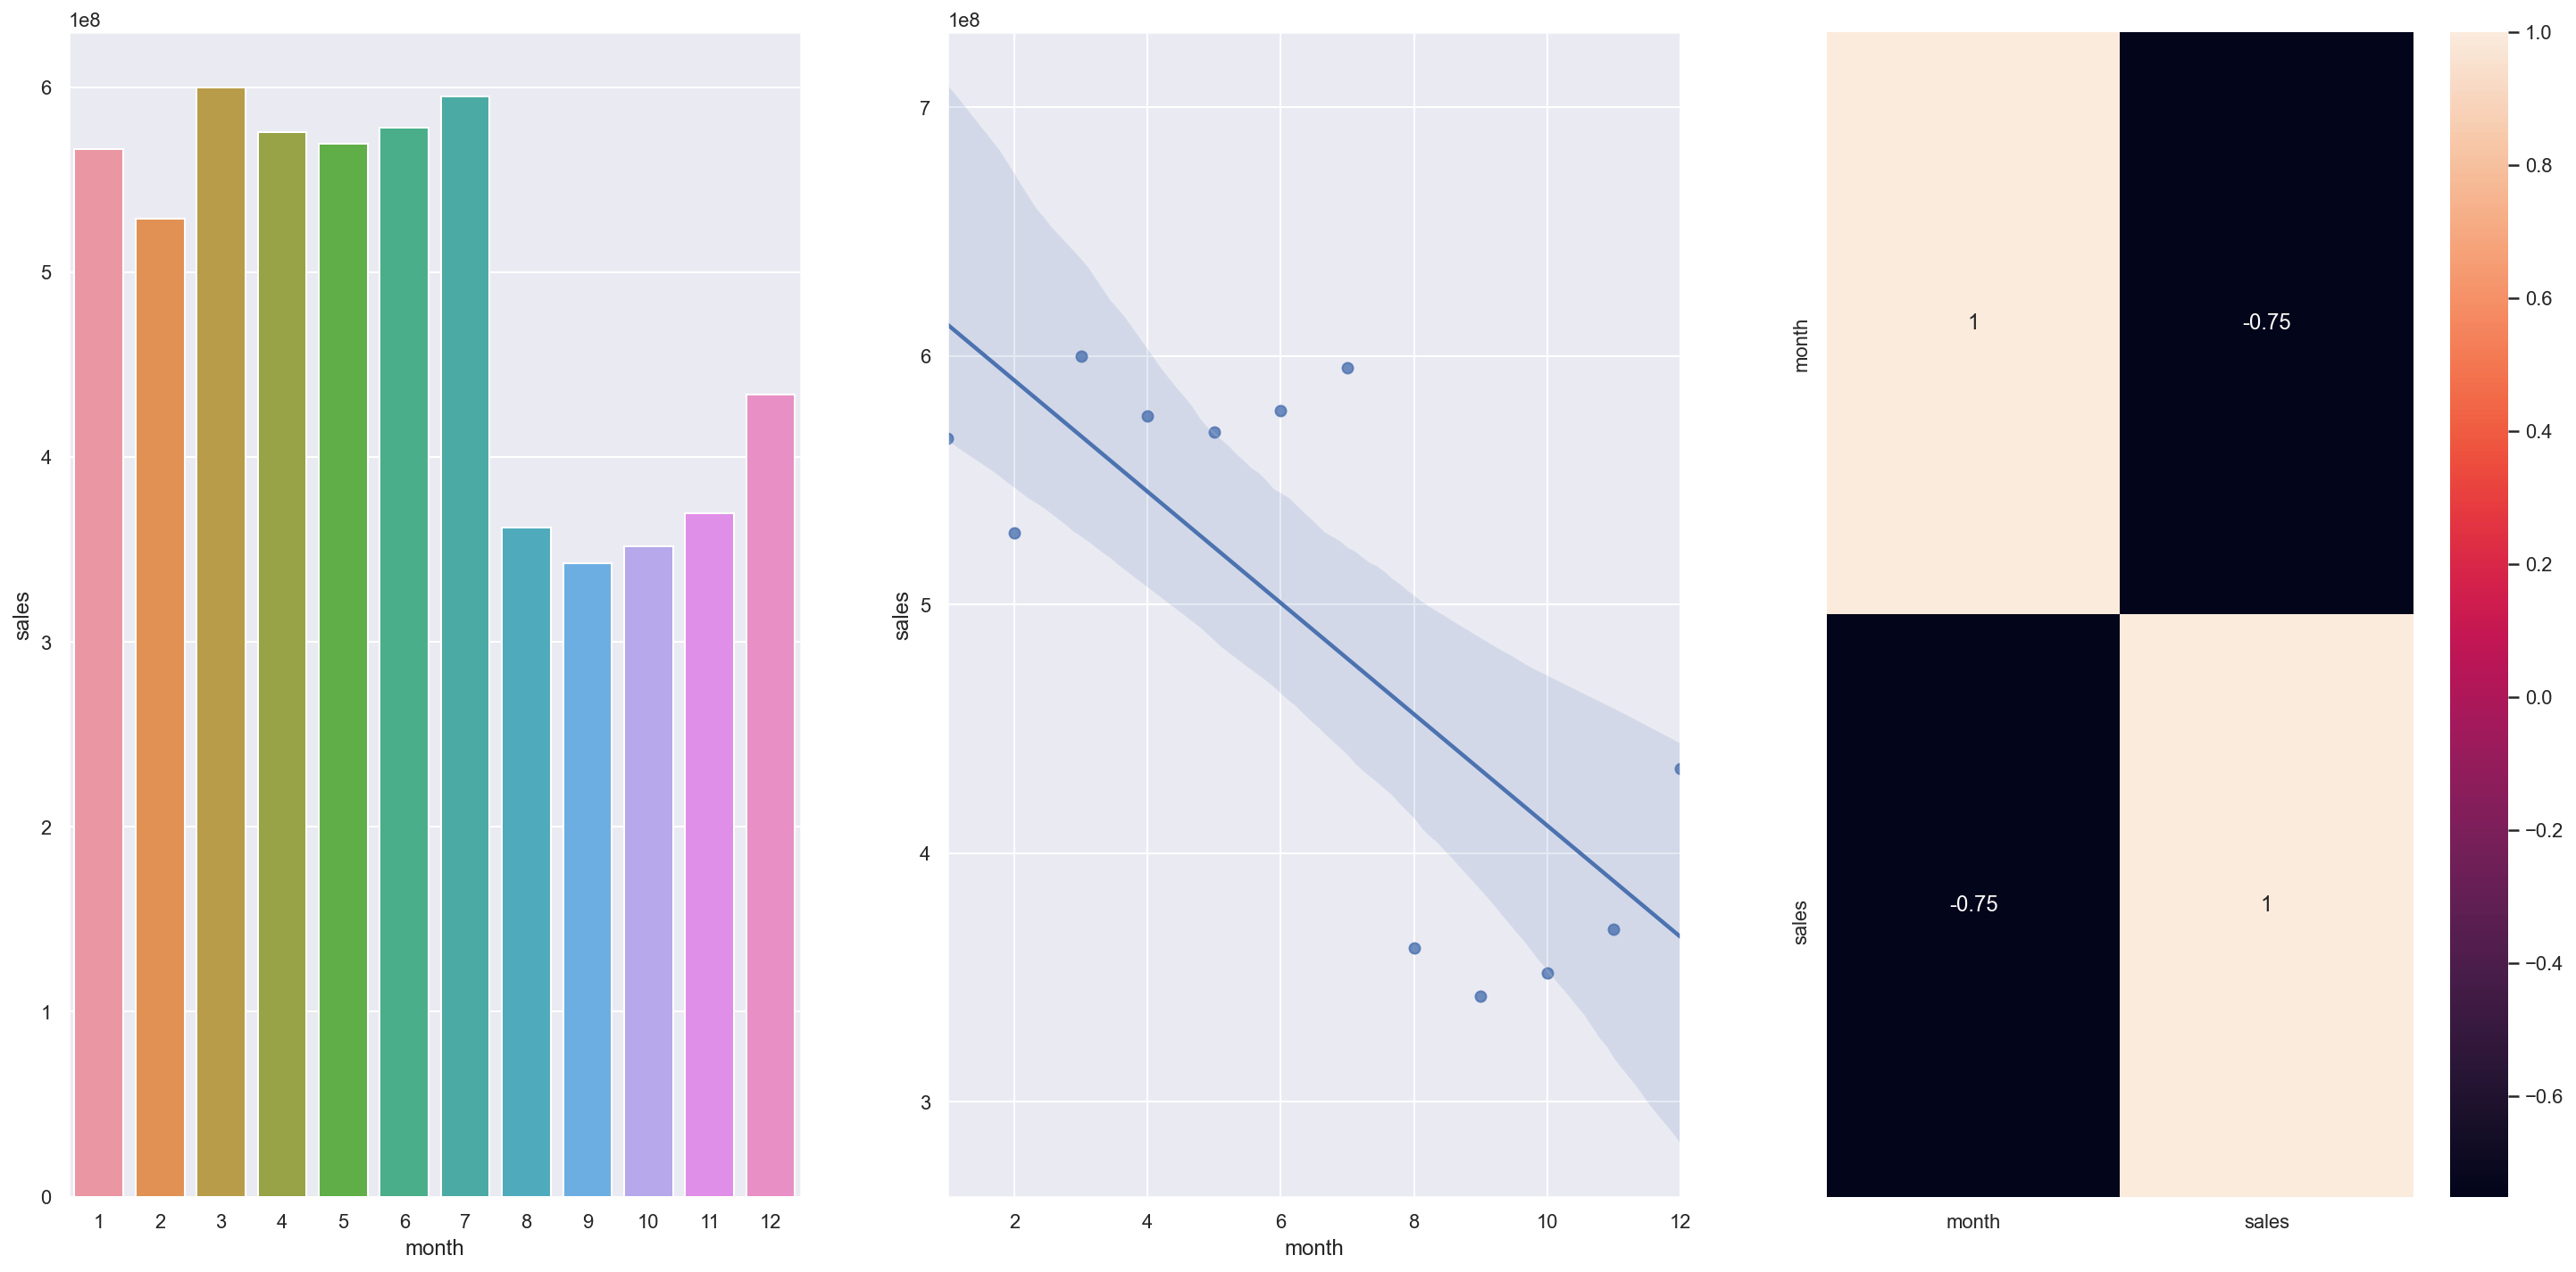

In [46]:
aux1=df4[['month','sales']].groupby('month').sum().reset_index()

plt.subplot (1,3,1)
sns.barplot( x='month', y='sales', data=aux1);

plt.subplot (1,3,2)
sns.regplot( x='month', y='sales', data=aux1);

plt.subplot (1,3,3)
sns.heatmap( aux1.corr(method='pearson'), annot=True);

### **H10.** Lojas deveriam vender mais depois do dia 10 de cada mes.

**TRUE** Lojas Vendem mais dps do dia 10


In [47]:

aux1.head(15)


month      sales
0       1  566728724
1       2  528734410
2       3  599831906
3       4  575895295
4       5  569248217
5       6  578112775
6       7  595059205
7       8  361791202
8       9  342570131
9      10  351878728
10     11  369498877
11     12  433831153

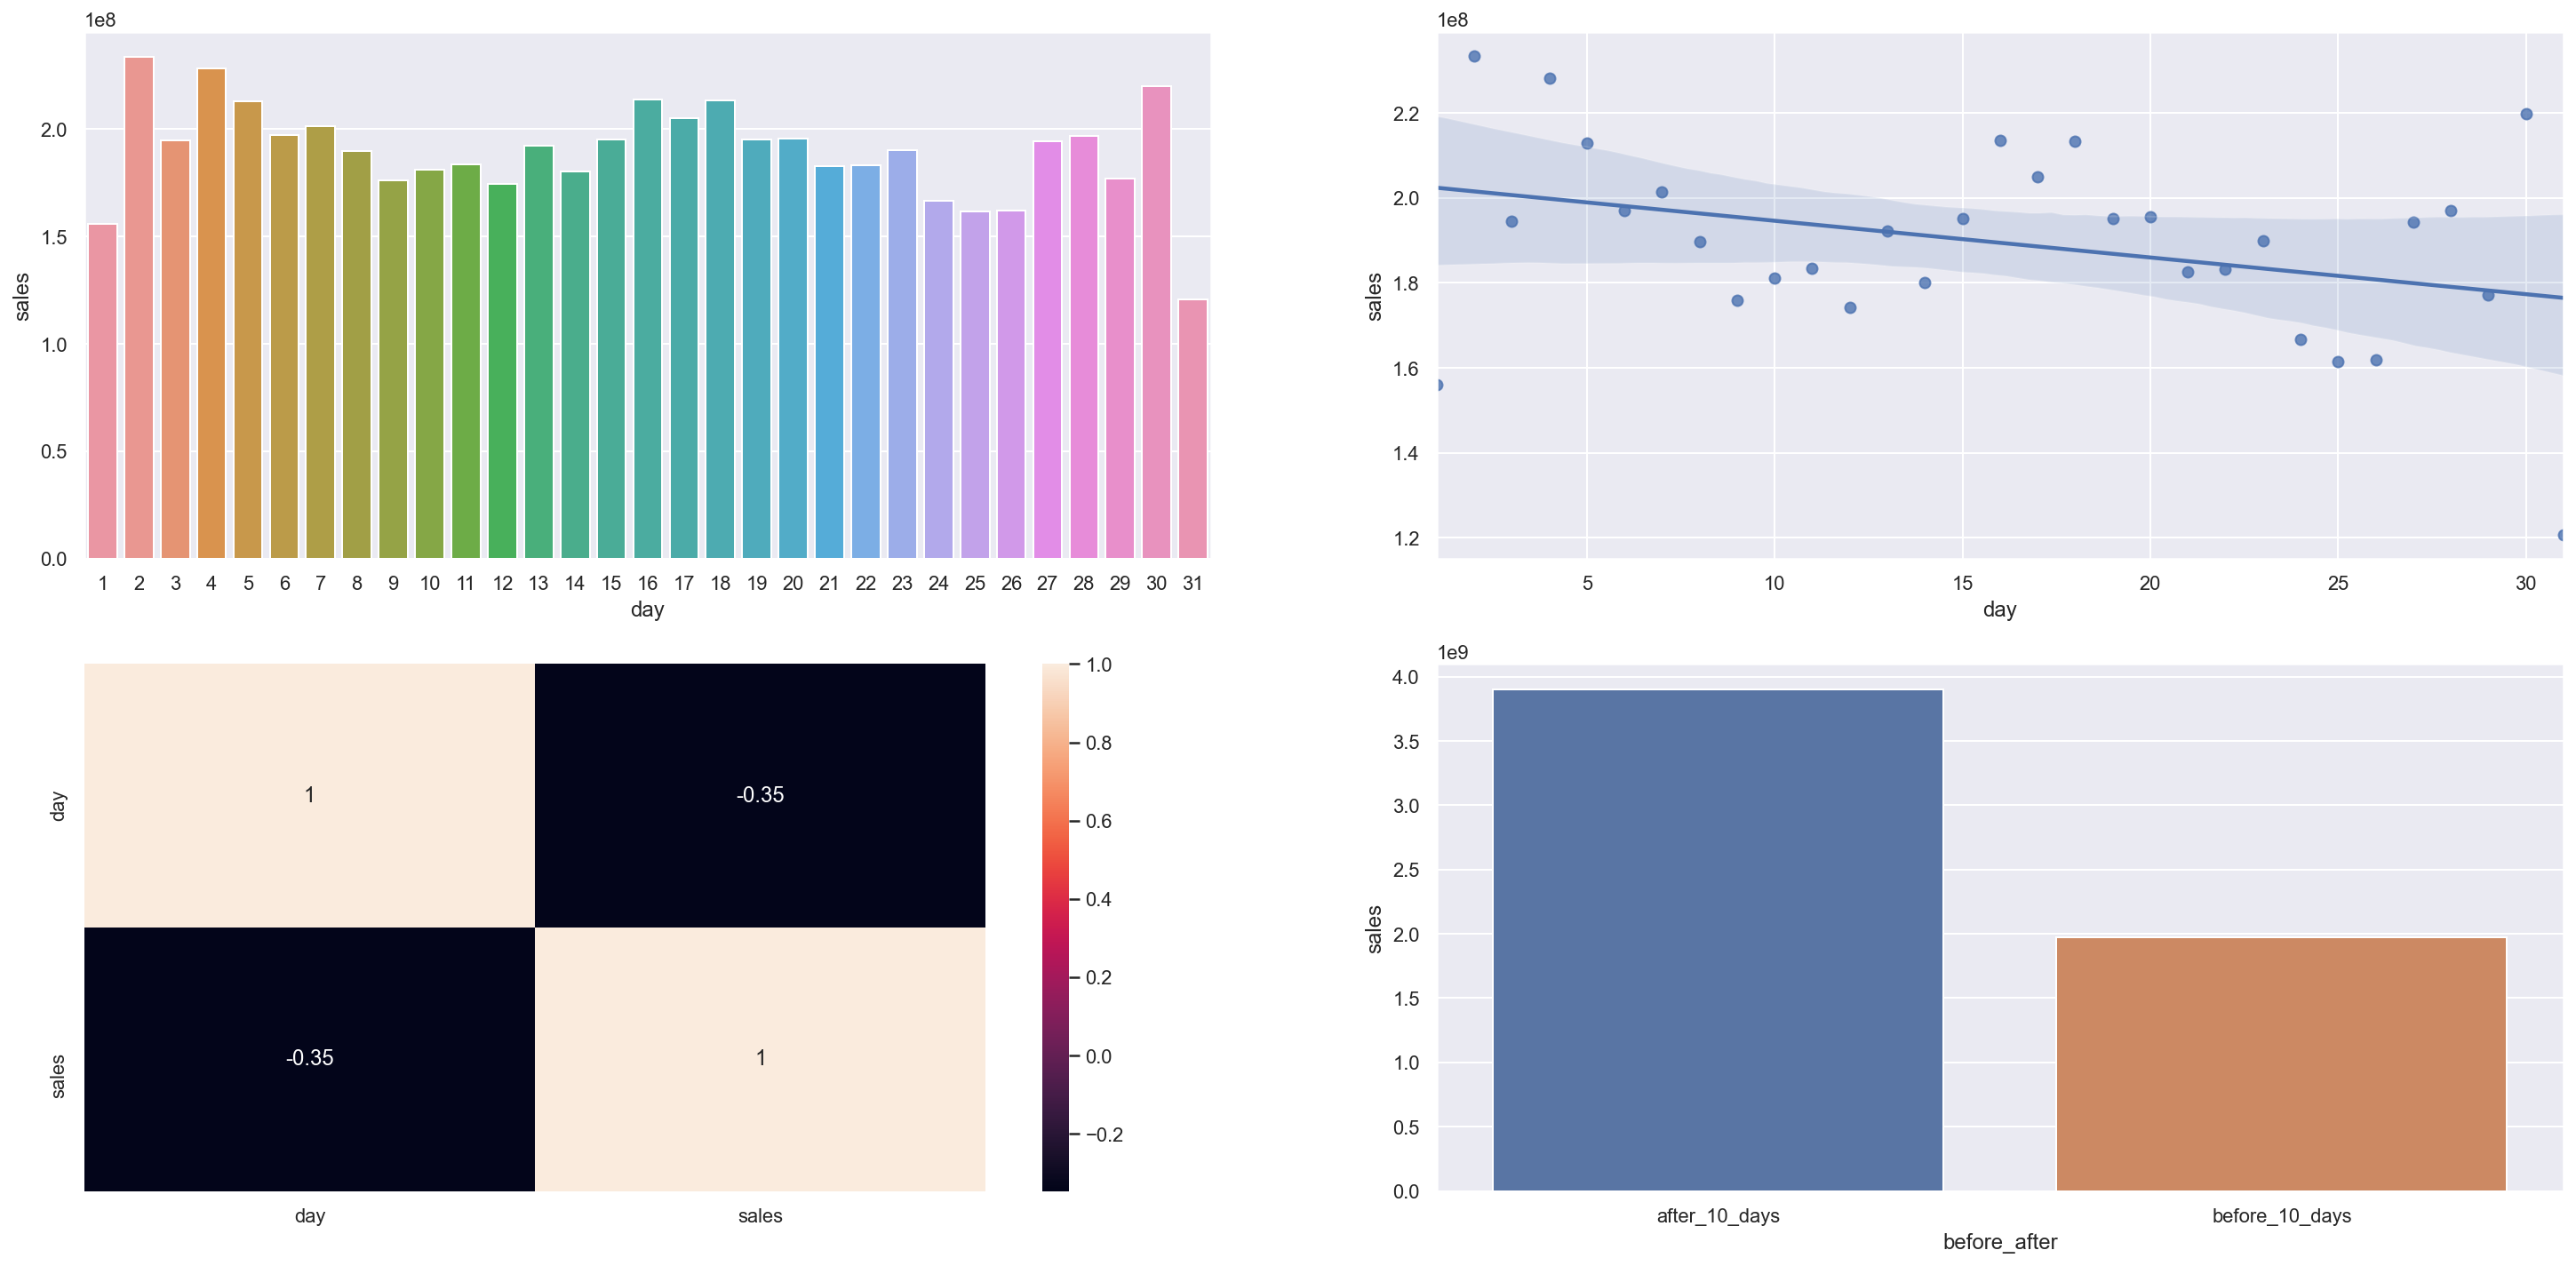

In [48]:
aux1=df4[['day','sales']].groupby('day').sum().reset_index()

plt.subplot (2,2,1)
sns.barplot( x='day', y='sales', data=aux1);

plt.subplot (2,2,2)
sns.regplot( x='day', y='sales', data=aux1);

plt.subplot (2,2,3)
sns.heatmap( aux1.corr(method='pearson'), annot=True);

plt.subplot (2,2,4)
aux1['before_after']=aux1['day'].apply (lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
aux2 = aux1[['before_after','sales']].groupby('before_after').sum().reset_index()
sns.barplot( x='before_after', y='sales', data=aux2);




### **H11.** Lojas deveriam vender menos aos finais de semana.


**VERDADEIRO** Lojas vendem MENOS aos FDS.

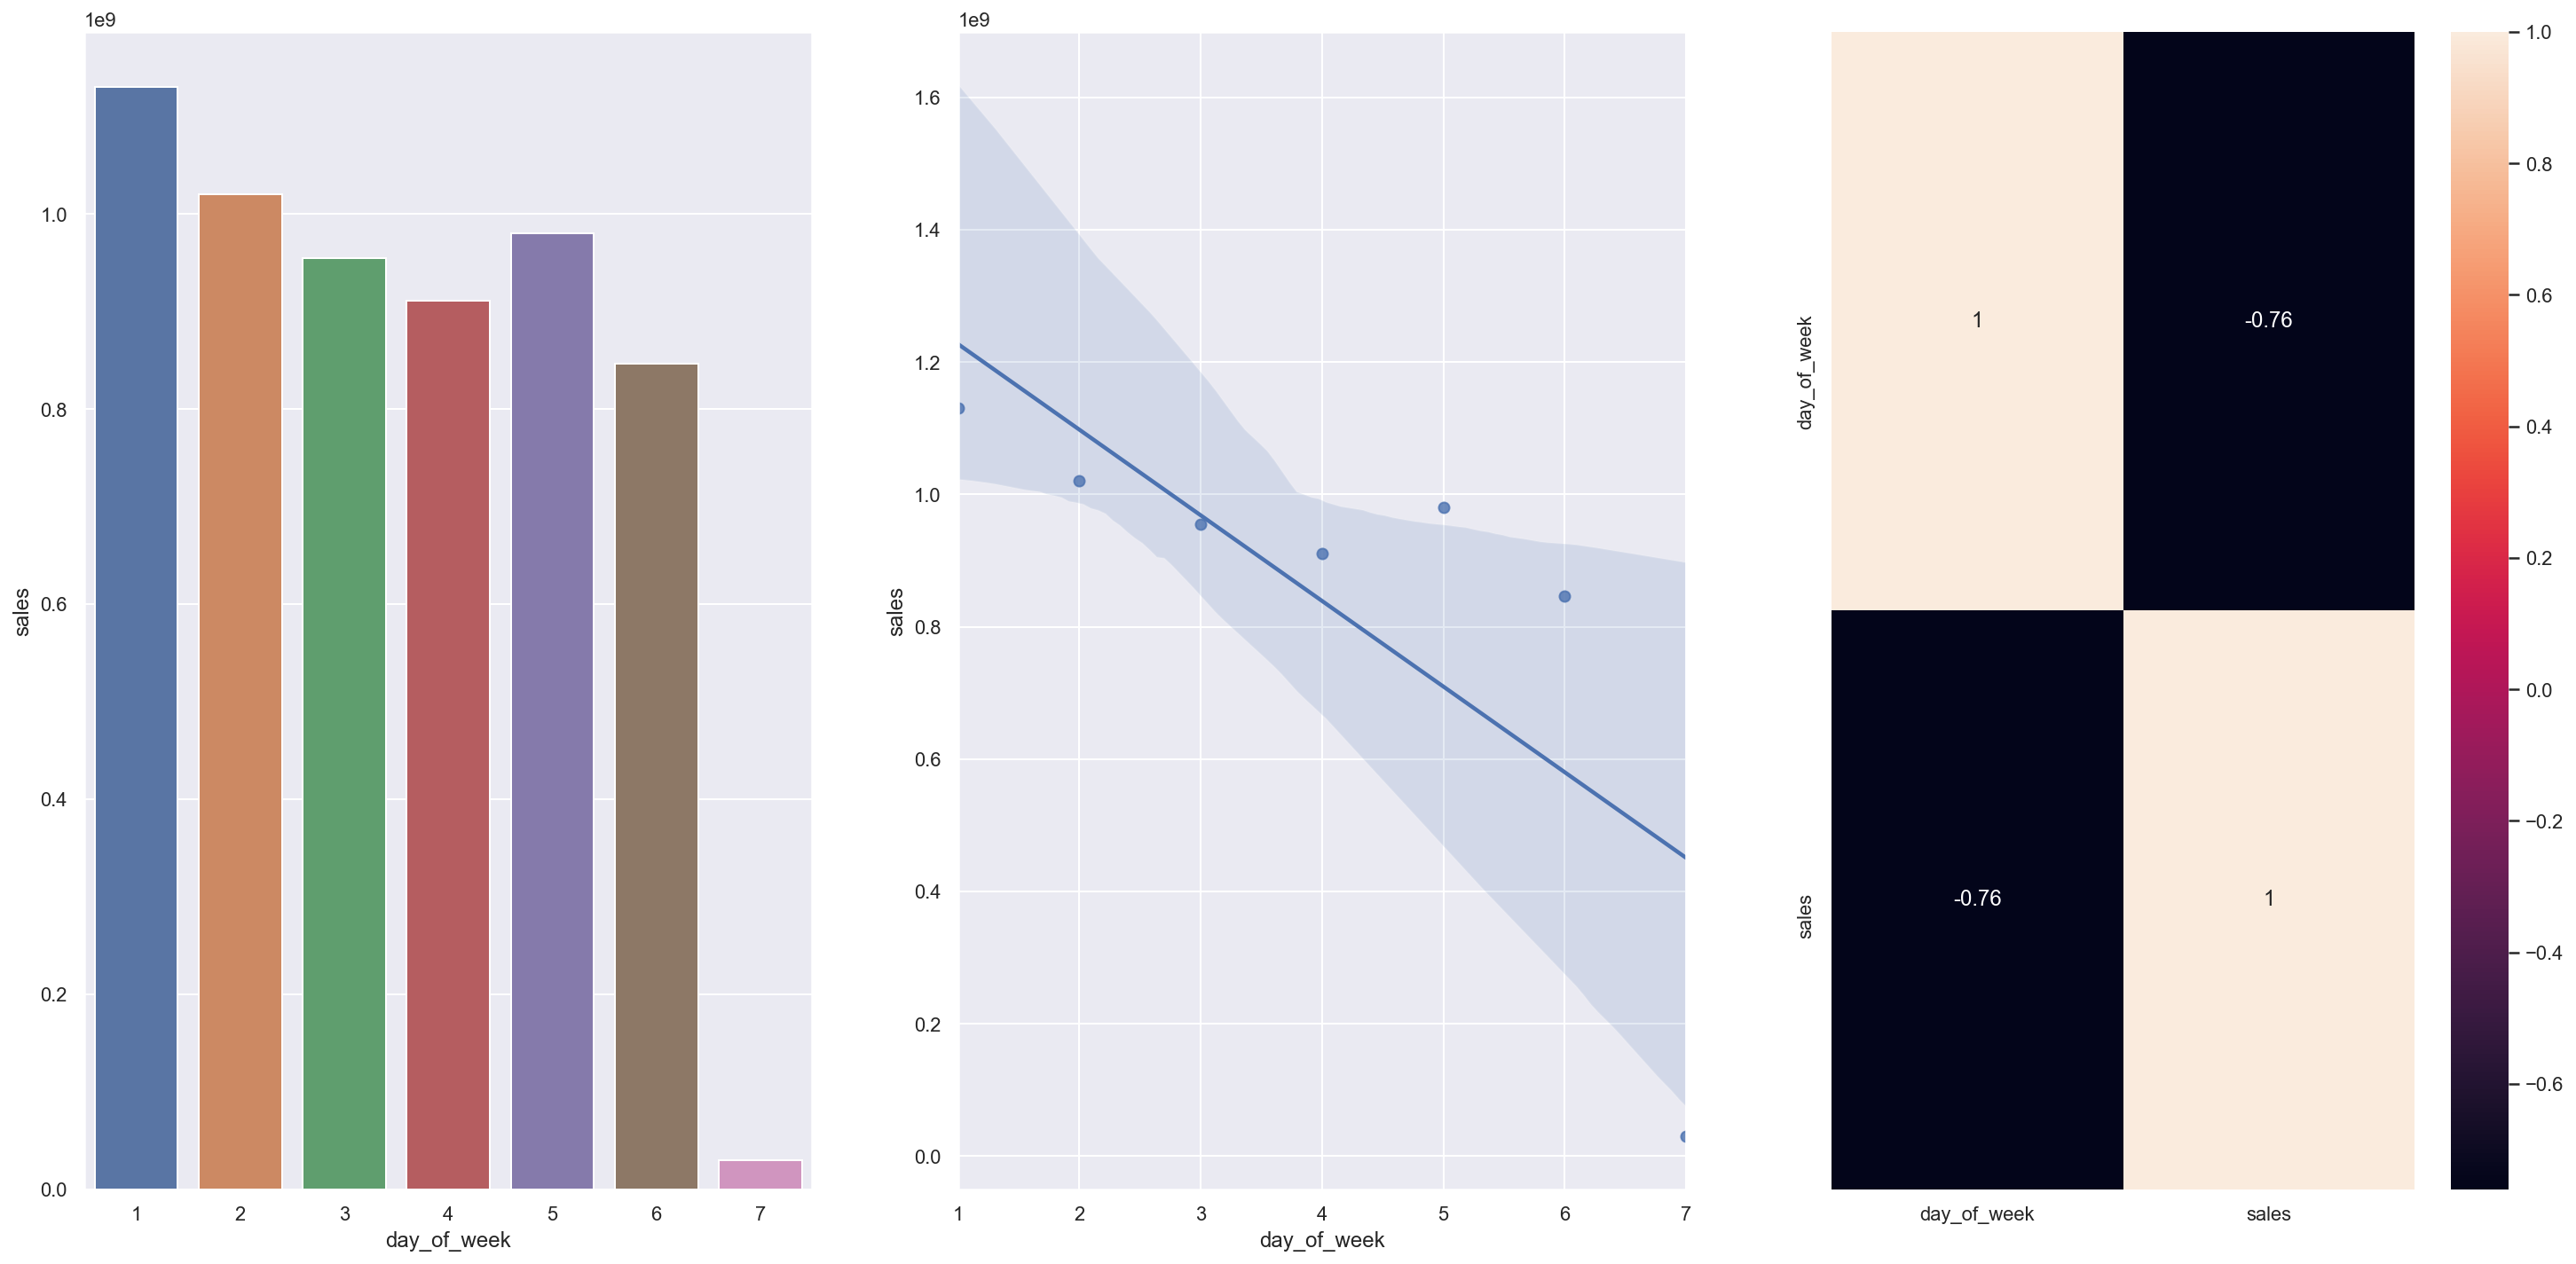

In [49]:
aux1=df4[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()

plt.subplot (1,3,1)
sns.barplot( x='day_of_week', y='sales', data=aux1);

plt.subplot (1,3,2)
sns.regplot( x='day_of_week', y='sales', data=aux1);

plt.subplot (1,3,3)
sns.heatmap( aux1.corr(method='pearson'), annot=True);

### **H12.** Lojas deveriam vender menos aos feriados escolares.

**VERDADEIRA** Lojas vendem MENOS durante os feriados escolares, EXCEPT FOR JUNE AND AUGUST

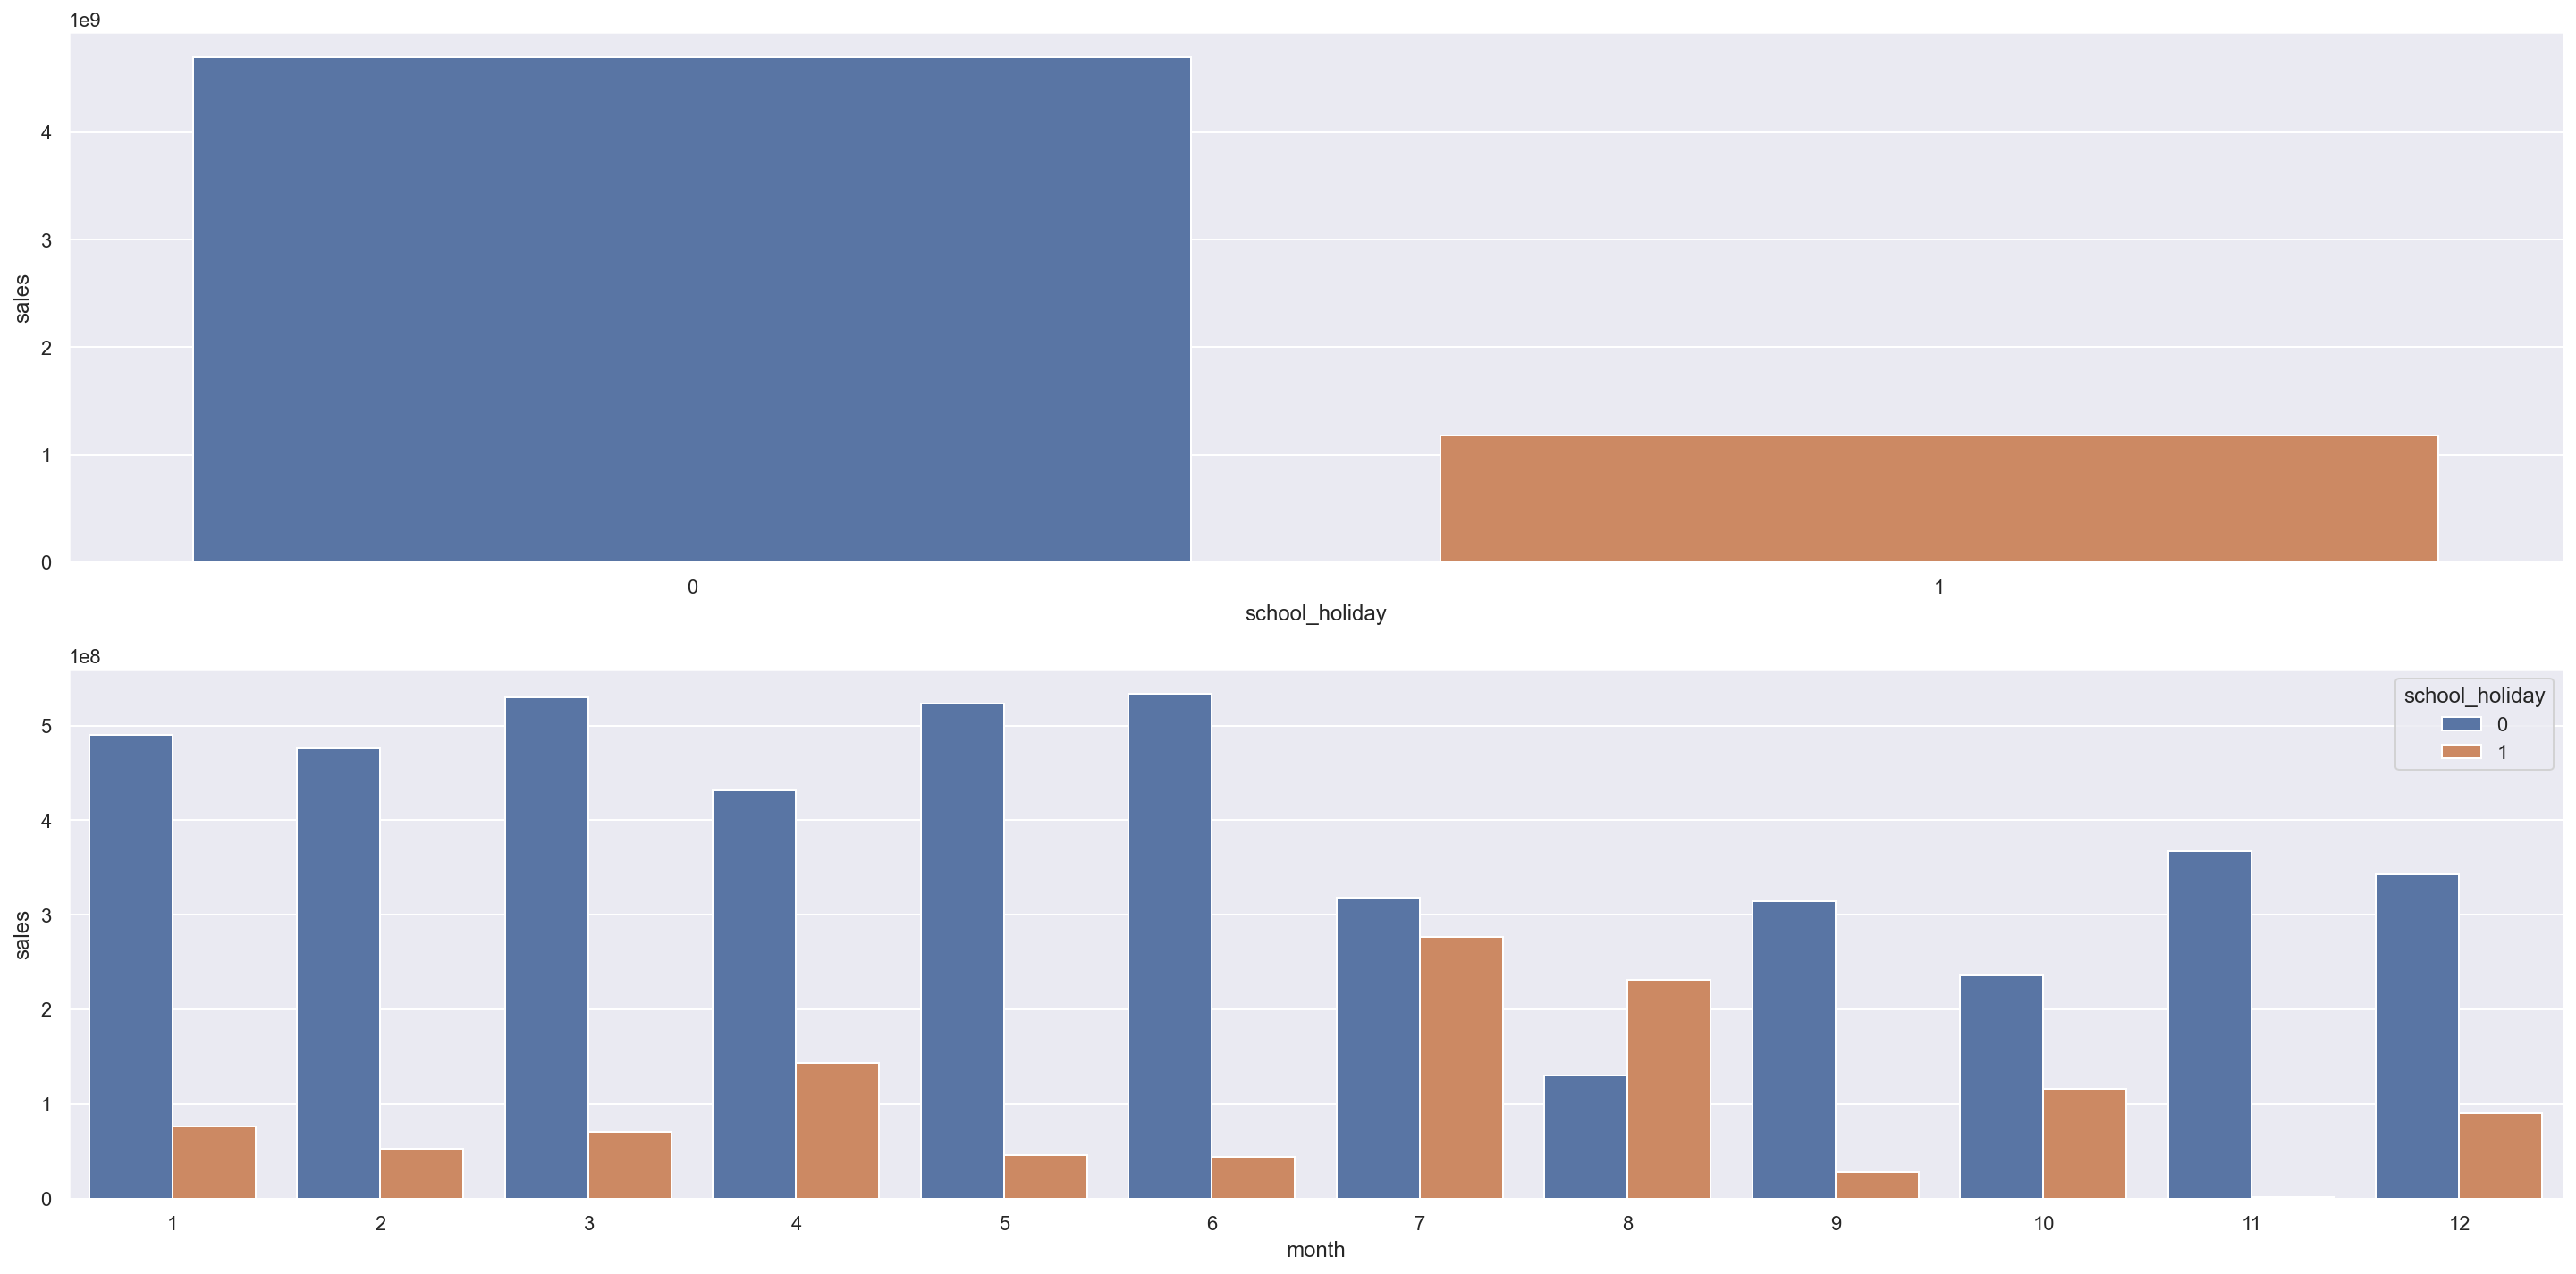

In [50]:
plt.subplot(2,1,1)
aux1=df4[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()
sns.barplot(x='school_holiday',y='sales', data=aux1);


plt.subplot(2,1,2)
aux2=df4[['month','school_holiday','sales']].groupby(['school_holiday','month']).sum().reset_index()
sns.barplot(x='month',y='sales',hue='school_holiday', data=aux2);

In [51]:
tab =[['Hipoteses','Conclusao','Relevancia'],
      ['H1','Falsa','Baixa'],
      ['H2','Falsa','Media'],
      ['H3','Falsa','Media'],
      ['H4','Falsa','Baixa'],
      ['H5','-','-'],
      ['H6','Falsa','Baixa'],
      ['H7','Falsa','Media'],
      ['H8','Falsa','Alta'],
      ['H9','Falsa','Alta'],
      ['H10','Verdadeira','Alta'],
      ['H11','Verdadeira','Alta'],
      ['H12','Verdadeira','Baixa'],
     ]
print (tabulate(tab,headers='firstrow'))

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H6           Falsa        Baixa
H7           Falsa        Media
H8           Falsa        Alta
H9           Falsa        Alta
H10          Verdadeira   Alta
H11          Verdadeira   Alta
H12          Verdadeira   Baixa


## 4.3 Analise Multivariada

### 4.3.1 Numerical Attributes

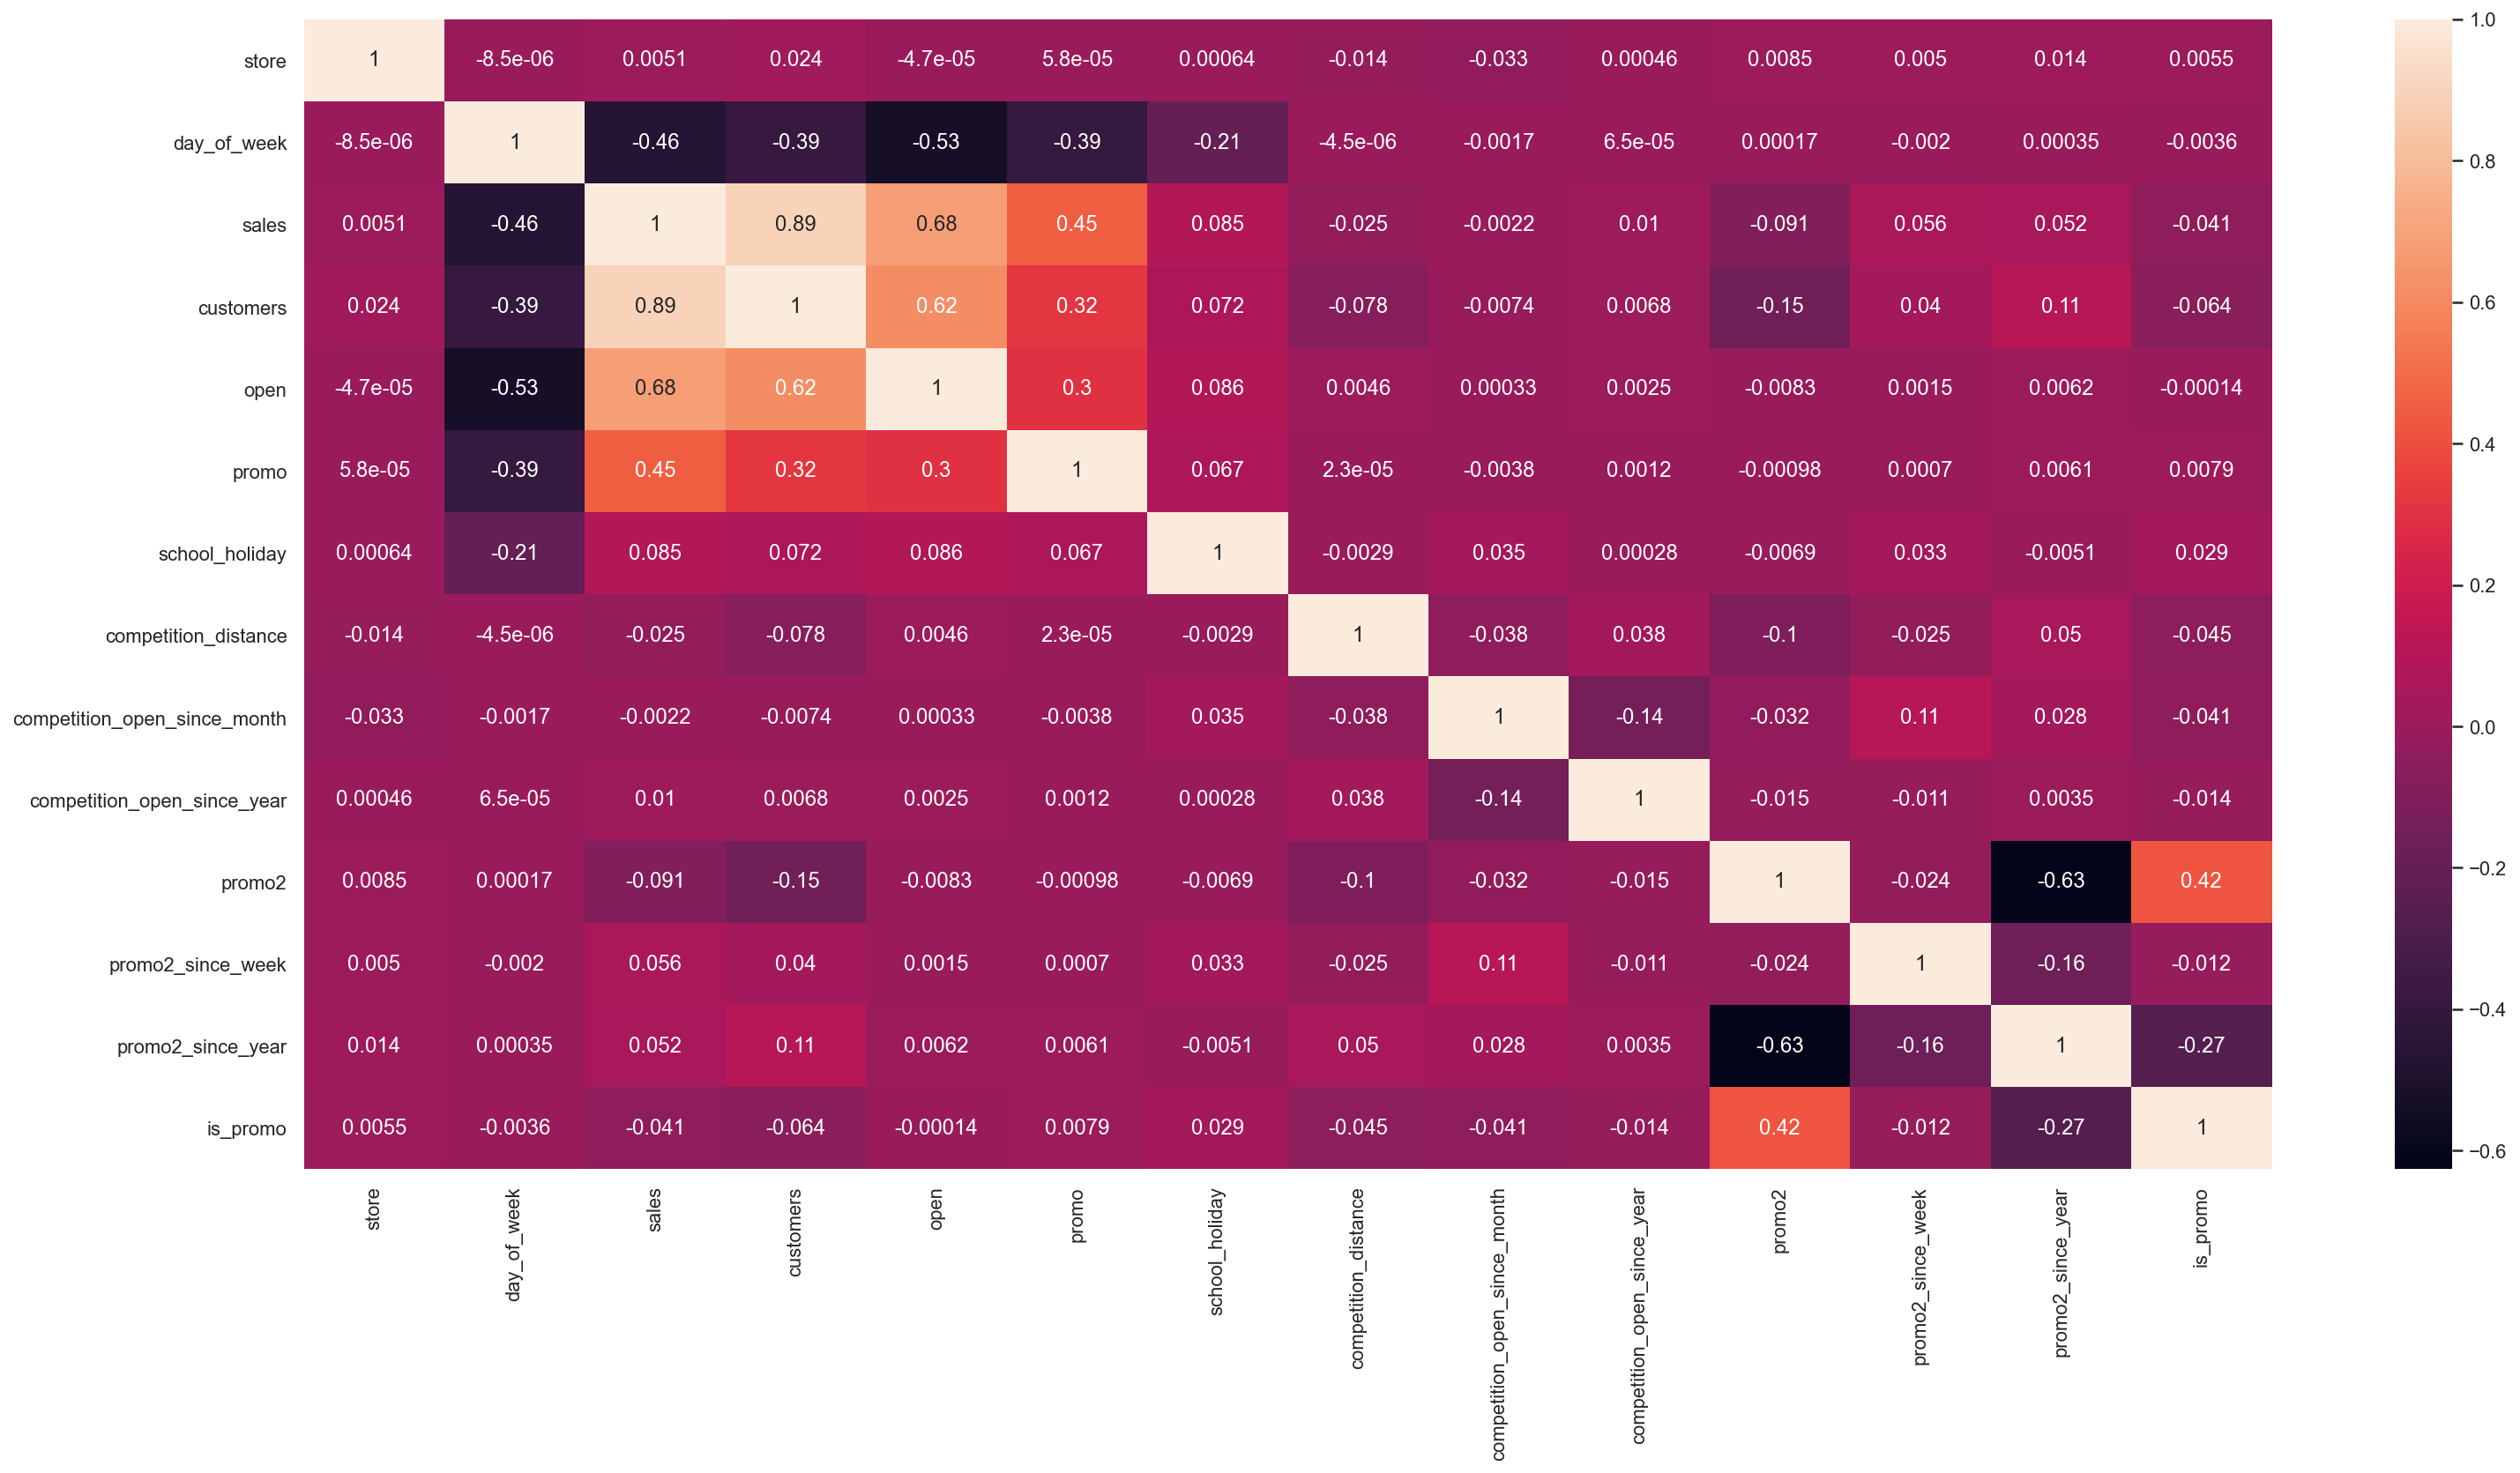

In [52]:
correlation=num_attributes.corr(method='pearson')
sns.heatmap(correlation,annot=True);

### 4.3.2 Categorical Attributes

In [53]:
# metodo de Cramer's V olhar no wikipedia
#video 6 apartir do minuto 10 do ds em prod modulo 04
#v=np.sqrt((chi2/n)/(min(k-1,r-1)))

In [54]:
a=df4.select_dtypes(include='object')

In [55]:
a.head()

state_holiday store_type assortment year_week
0   regular_day          c      basic   2015-30
1   regular_day          a      basic   2015-30
2   regular_day          a      basic   2015-30
3   regular_day          c   extended   2015-30
4   regular_day          a      basic   2015-30

In [56]:
cm=pd.crosstab(a['state_holiday'], a['store_type'])

In [57]:
a[(a['state_holiday']=='crhistmas') &  (a['store_type']=='a')]

state_holiday store_type assortment year_week
241499     crhistmas          a   extended   2014-51
241977     crhistmas          a   extended   2014-51
616339     crhistmas          a   extended   2013-51
616908     crhistmas          a   extended   2013-51

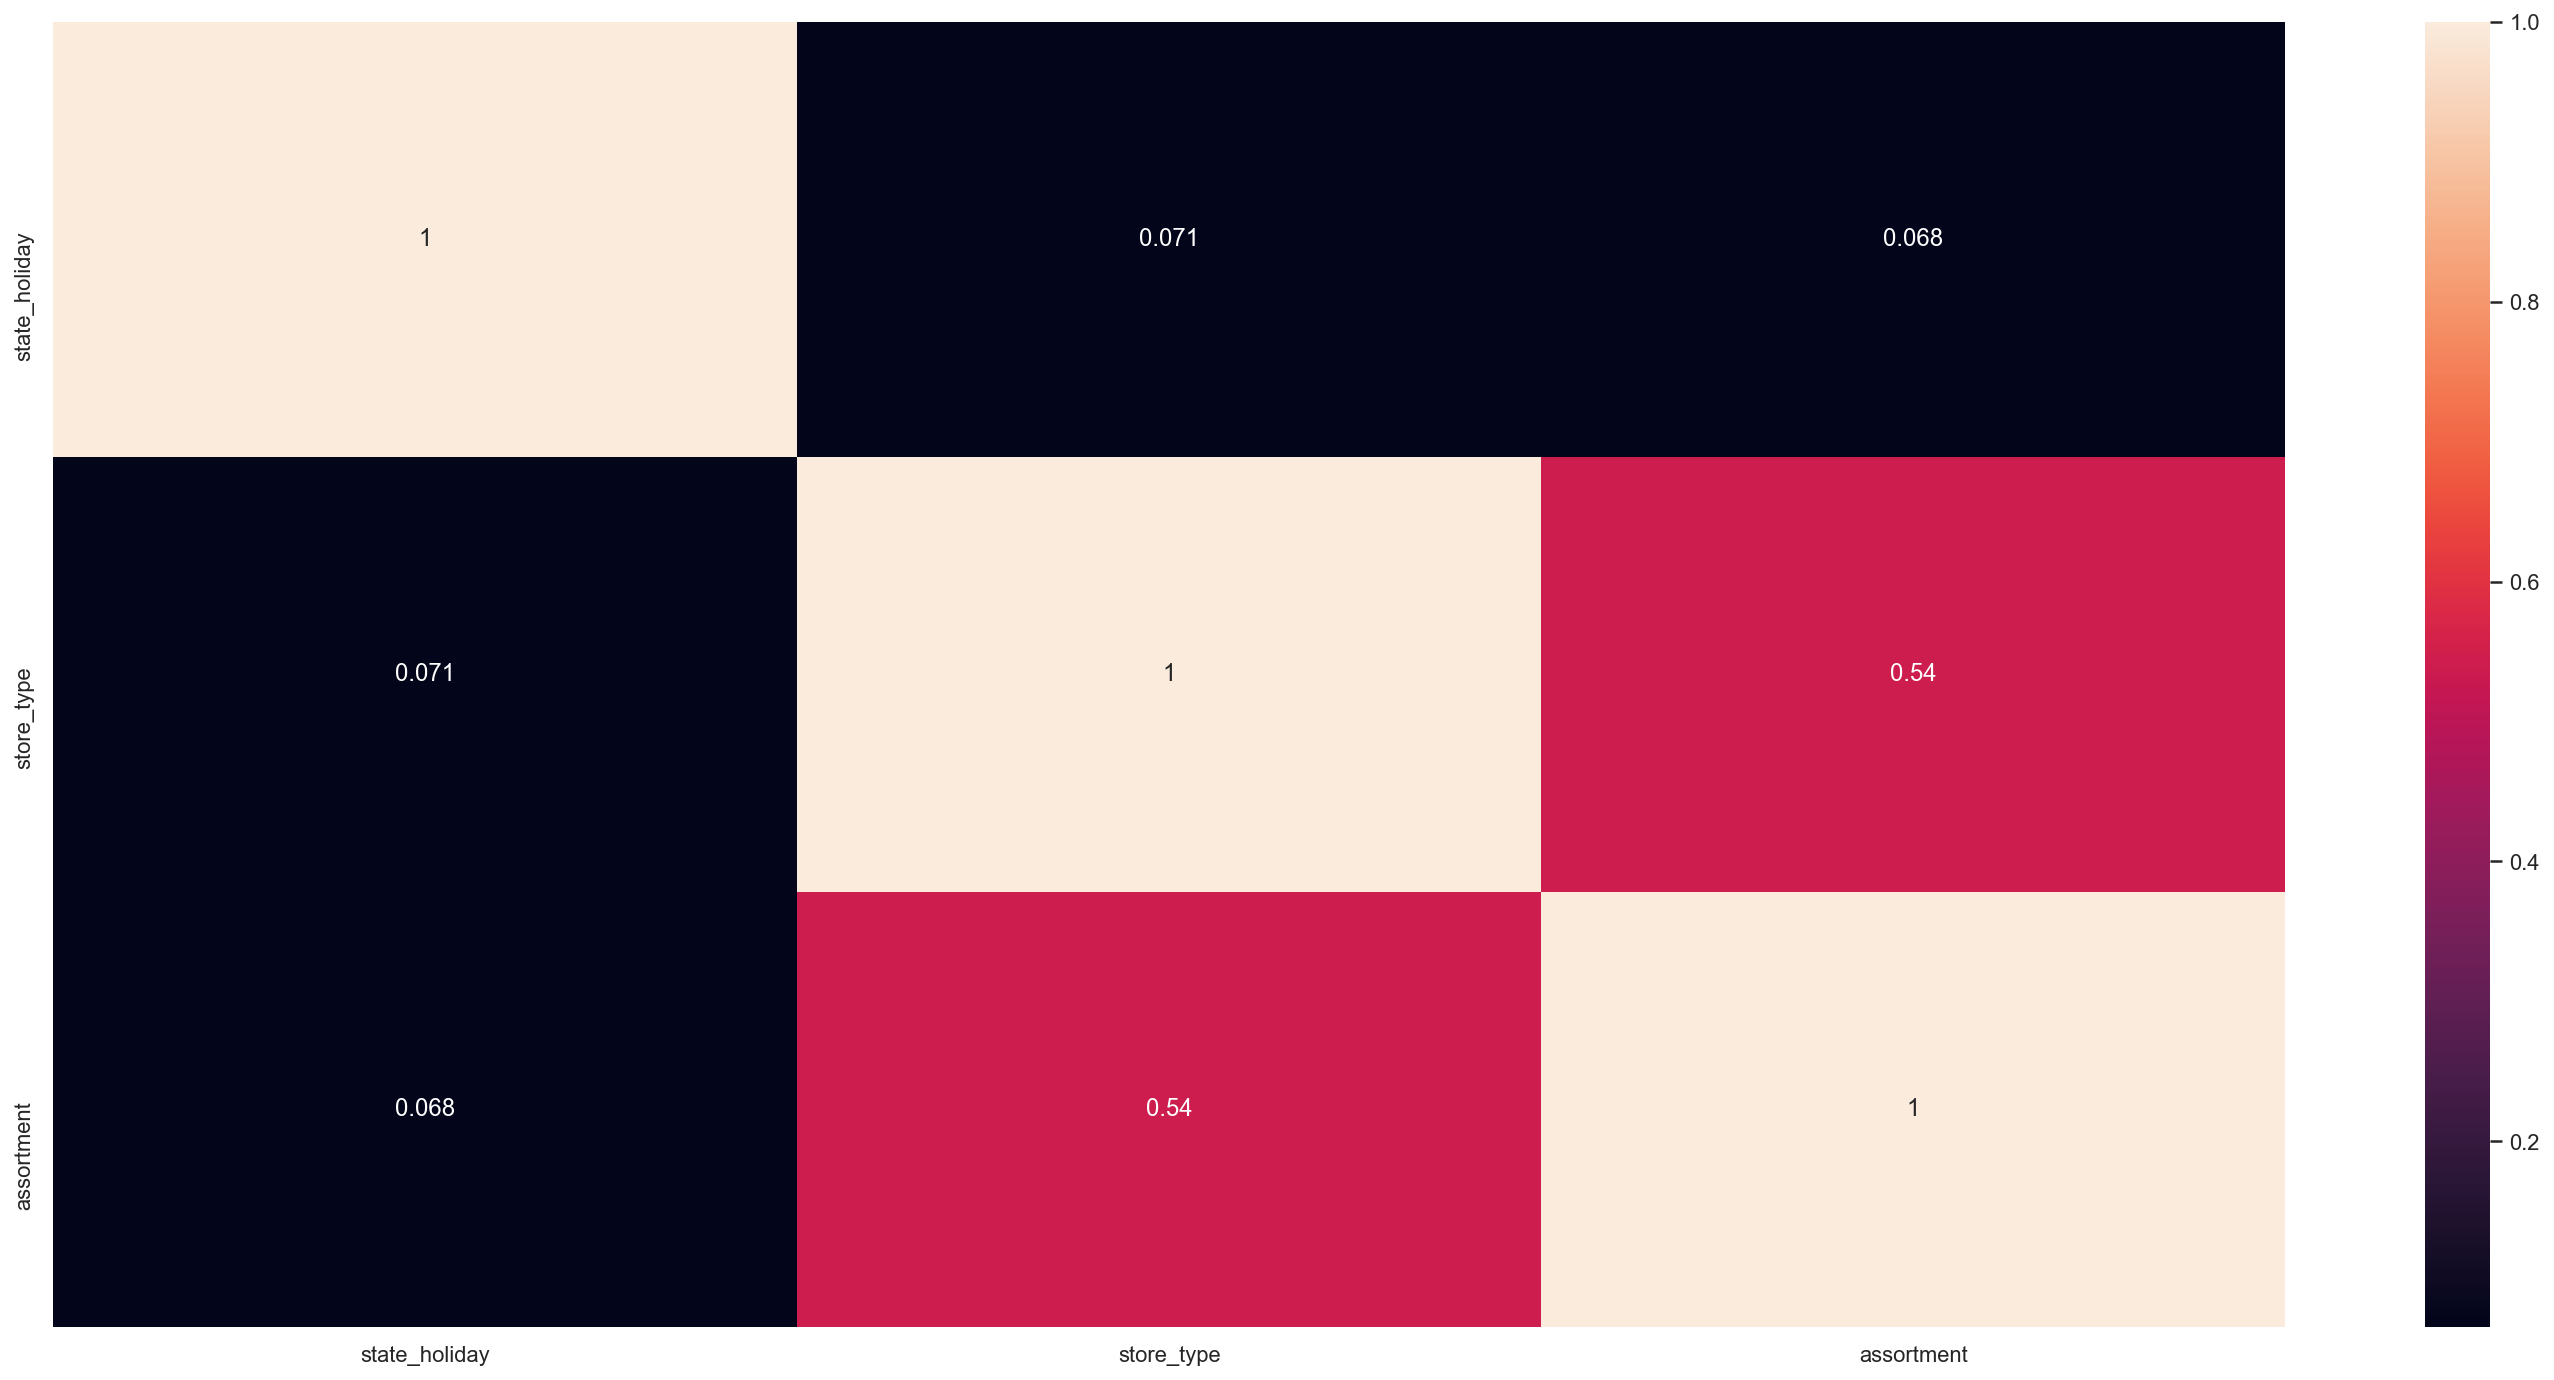

In [58]:
#only categorical
a = df4.select_dtypes(include = 'object')

# Calculate cramer V
a1 = cramer_v(a['state_holiday'], a['state_holiday'])
a2 = cramer_v(a['state_holiday'], a['store_type'])
a3 = cramer_v(a['state_holiday'], a['assortment'])

a4 = cramer_v(a['store_type'], a['state_holiday'])
a5 = cramer_v(a['store_type'], a['store_type'])
a6 = cramer_v(a['store_type'], a['assortment'])

a7 = cramer_v(a['assortment'], a['state_holiday'])
a8 = cramer_v(a['assortment'], a['store_type'])
a9 = cramer_v(a['assortment'], a['assortment'])

# Final Dataset
d = pd.DataFrame({'state_holiday' : [a1,a2,a3],
                 'store_type' : [a4,a5,a6],
                 'assortment' : [a7,a8,a9]})

#passando colunas como nome
d = d.set_index(d.columns)
sns.heatmap(d, annot=True);

# 5.0 PREPARACAO DE DADOS

In [59]:
df5=df4.copy()

## 5.1 Normalizacao

## 5.2 Rescaling

In [60]:
a=df5.select_dtypes(include=['int64','float64'])

In [61]:
a.head()

store  day_of_week  sales  promo  school_holiday  competition_distance  competition_open_since_month  competition_open_since_year  promo2  promo2_since_week  promo2_since_year  is_promo  year  month  day
0      1            5   5263      1               1            1,270.0000                             9                         2008       0                 31               2015         0  2015      7   31
1      2            5   6064      1               1              570.0000                            11                         2007       1                 13               2010         1  2015      7   31
2      3            5   8314      1               1           14,130.0000                            12                         2006       1                 14               2011         1  2015      7   31
3      4            5  13995      1               1              620.0000                             9                         2009       0                 31               2015         0  2015      7   31
4      5            5   4822      1               1           29,910.0000                             4                         2015       0                 31               2015         0  2015      7   31

C:\Users\Djalma.junior\Anaconda3\envs\predict-time-series\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


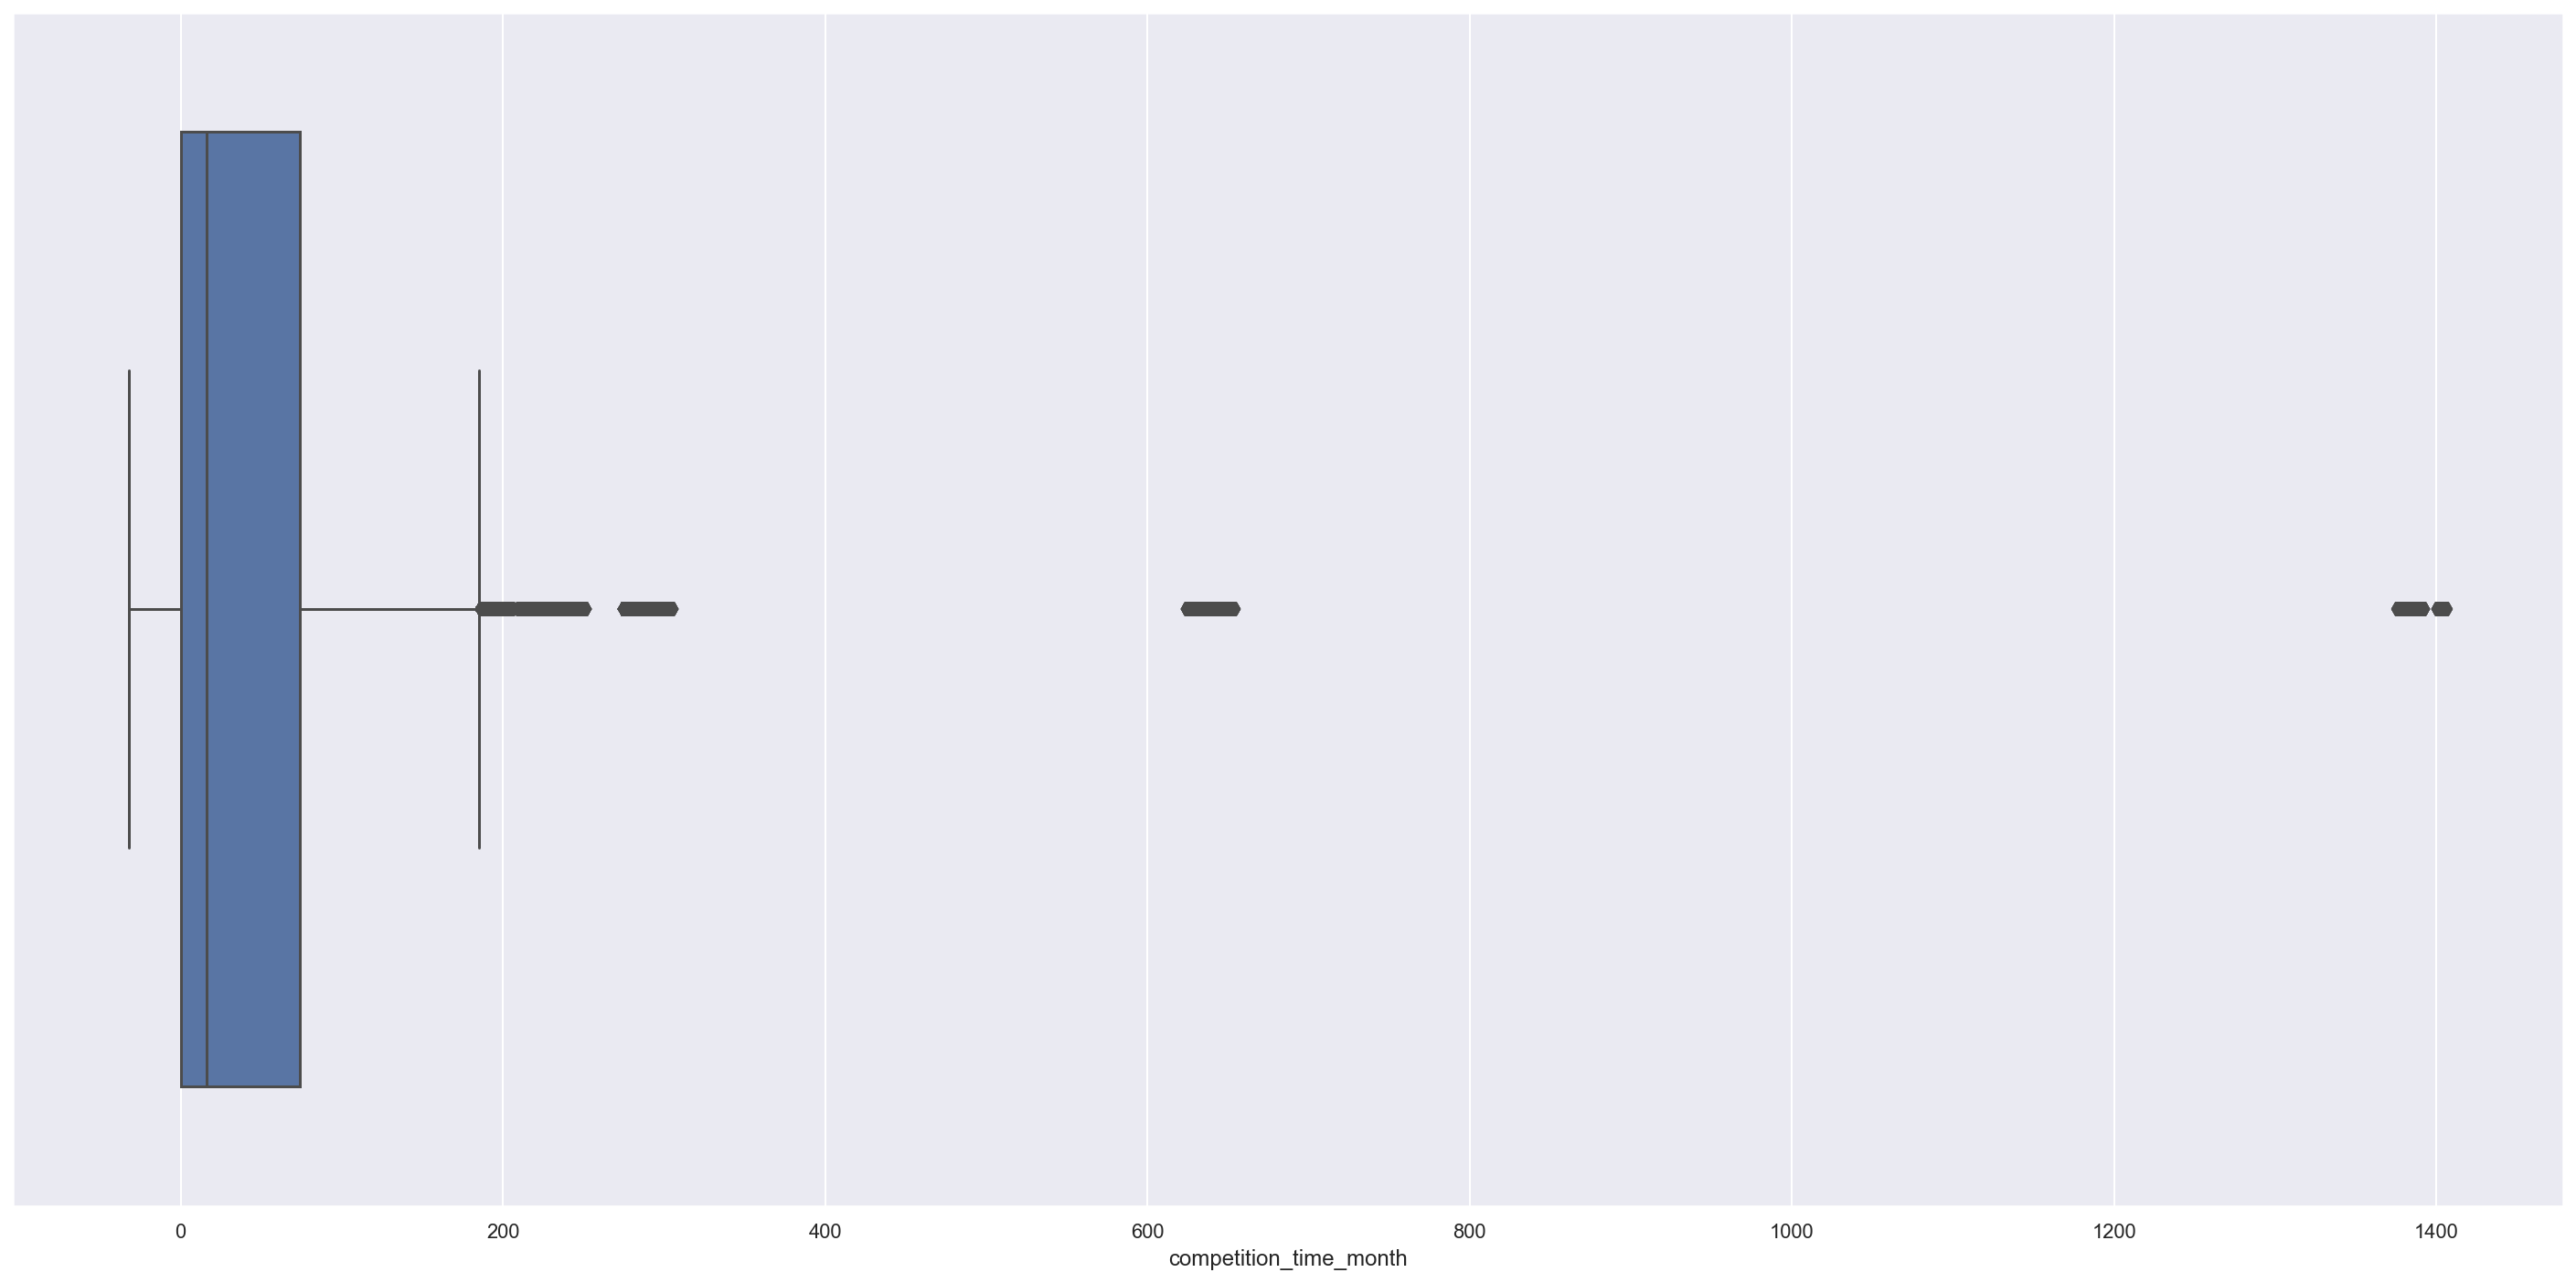

In [62]:
sns.boxplot(df5['competition_time_month']);

In [63]:
rs = RobustScaler()
mms= MinMaxScaler()



# competition distance
# fit transform acha os quartis da formula 1ro e 3ro da coluna e ja os aplica
df5['competition_distance']=rs.fit_transform(df5[['competition_distance']].values)


# year
df5['year']=mms.fit_transform(df5[['year']].values)


# competition time month
df5['competition_time_month']=rs.fit_transform(df5[['competition_time_month']].values)



# promo time week
df5['promo_time_week']=mms.fit_transform(df5[['promo_time_week']].values)


## 5.3 Transformacao

In [64]:
df5.head()

store  day_of_week       date  sales  promo state_holiday  school_holiday store_type assortment  competition_distance  competition_open_since_month  competition_open_since_year  promo2  promo2_since_week  promo2_since_year  is_promo   year  month  day  week_of_year year_week competition_since  competition_time_month promo_since  promo_time_week
0      1            5 2015-07-31   5263      1   regular_day               1          c      basic               -0.1710                             9                         2008       0                 31               2015         0 1.0000      7   31            31   2015-30        2008-09-01                  0.9189  2015-07-27           0.2870
1      2            5 2015-07-31   6064      1   regular_day               1          a      basic               -0.2839                            11                         2007       1                 13               2010         1 1.0000      7   31            31   2015-30        2007-11-01                  1.0541  2010-03-22           0.9226
2      3            5 2015-07-31   8314      1   regular_day               1          a      basic                1.9032                            12                         2006       1                 14               2011         1 1.0000      7   31            31   2015-30        2006-12-01                  1.2027  2011-03-28           0.8018
3      4            5 2015-07-31  13995      1   regular_day               1          c   extended               -0.2758                             9                         2009       0                 31               2015         0 1.0000      7   31            31   2015-30        2009-09-01                  0.7432  2015-07-27           0.2870
4      5            5 2015-07-31   4822      1   regular_day               1          a      basic                4.4484                             4                         2015       0                 31               2015         0 1.0000      7   31            31   2015-30        2015-04-01                 -0.1622  2015-07-27           0.2870

In [65]:
df5.head()

store  day_of_week       date  sales  promo state_holiday  school_holiday store_type assortment  competition_distance  competition_open_since_month  competition_open_since_year  promo2  promo2_since_week  promo2_since_year  is_promo   year  month  day  week_of_year year_week competition_since  competition_time_month promo_since  promo_time_week
0      1            5 2015-07-31   5263      1   regular_day               1          c      basic               -0.1710                             9                         2008       0                 31               2015         0 1.0000      7   31            31   2015-30        2008-09-01                  0.9189  2015-07-27           0.2870
1      2            5 2015-07-31   6064      1   regular_day               1          a      basic               -0.2839                            11                         2007       1                 13               2010         1 1.0000      7   31            31   2015-30        2007-11-01                  1.0541  2010-03-22           0.9226
2      3            5 2015-07-31   8314      1   regular_day               1          a      basic                1.9032                            12                         2006       1                 14               2011         1 1.0000      7   31            31   2015-30        2006-12-01                  1.2027  2011-03-28           0.8018
3      4            5 2015-07-31  13995      1   regular_day               1          c   extended               -0.2758                             9                         2009       0                 31               2015         0 1.0000      7   31            31   2015-30        2009-09-01                  0.7432  2015-07-27           0.2870
4      5            5 2015-07-31   4822      1   regular_day               1          a      basic                4.4484                             4                         2015       0                 31               2015         0 1.0000      7   31            31   2015-30        2015-04-01                 -0.1622  2015-07-27           0.2870

### 5.3.1 Encoding

In [66]:
# variaveis categoricas

# state_holiday - one hot encoding
#prefix eh o nome que vai ficar na frente da coluna
df5=pd.get_dummies(df5,prefix=['state_holiday'],columns=['state_holiday'])



# store_type - Label Encoding
le=LabelEncoder()
df5['store_type']=le.fit_transform(df5['store_type'])



# assortment - ordinal encoding
assortment_dict={'basic':1, 'extra':2 , 'extended':3}
#map faz a substituicao da  string para o numero
df5['assortment']=df5['assortment'].map(assortment_dict)

#comando df5['assortment'].drop_duplicate() para ver as ordens das variaveis

### 5.3.2 Response Variable Transformation

In [67]:
df5['sales']=np.log1p(df5['sales'])

C:\Users\Djalma.junior\Anaconda3\envs\predict-time-series\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


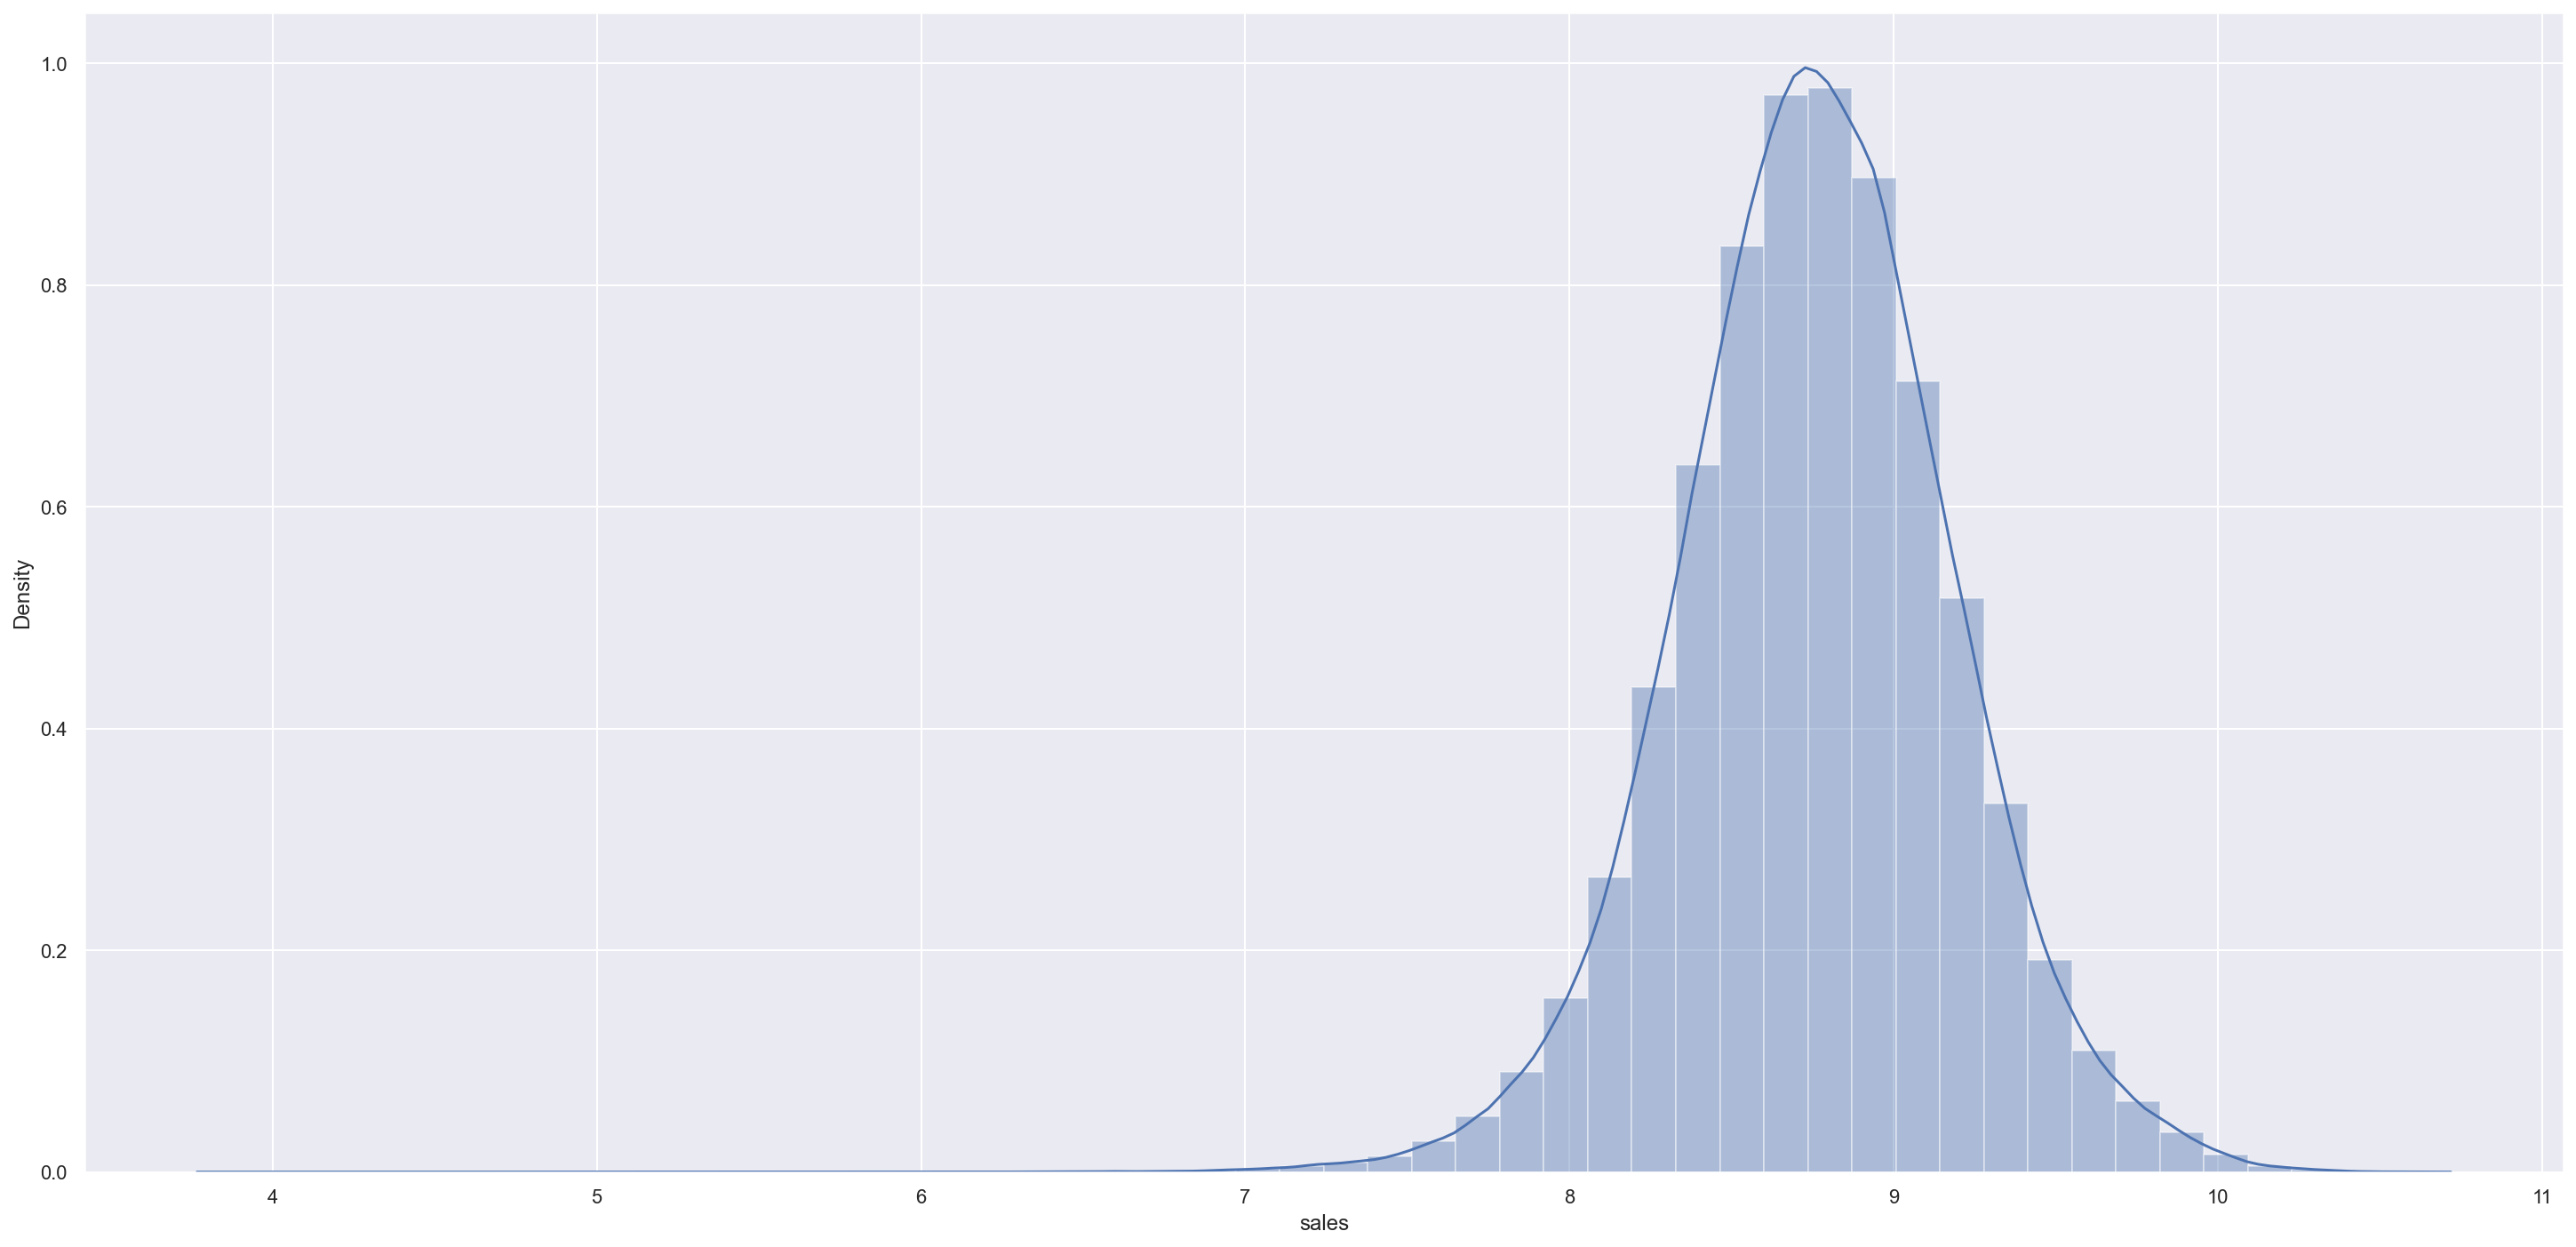

In [68]:
sns.distplot(df5['sales']);

### 5.3.2 Nature Transformation

In [69]:
#variaveis ciclicas

# day_of_week
df5['day_of_week_sin']=df5['day_of_week'].apply (lambda x: np.sin ( x * ( 2.* np.pi/7 ) ) )
df5['day_of_week_cos']=df5['day_of_week'].apply (lambda x: np.cos ( x * ( 2.* np.pi/7 ) ) )

# month
df5['month_sin']=df5['month'].apply (lambda x: np.sin ( x * ( 2.* np.pi/12 ) ) )
df5['month_cos']=df5['month'].apply (lambda x: np.cos ( x * ( 2.* np.pi/12 ) ) )

# day
df5['day_sin']=df5['day'].apply (lambda x: np.sin ( x * ( 2.* np.pi/30 ) ) )
df5['day_cos']=df5['day'].apply (lambda x: np.cos ( x * ( 2.* np.pi/30 ) ) )

# week_of_year
df5['week_of_year_sin']=df5['week_of_year'].apply (lambda x: np.sin ( x * ( 2.* np.pi/52 ) ) )
df5['week_of_year_cos']=df5['week_of_year'].apply (lambda x: np.cos ( x * ( 2.* np.pi/52 ) ) )

In [70]:
df5.head()

store  day_of_week       date  sales  promo  school_holiday  store_type  assortment  competition_distance  competition_open_since_month  competition_open_since_year  promo2  promo2_since_week  promo2_since_year  is_promo   year  month  day  week_of_year year_week competition_since  competition_time_month promo_since  promo_time_week  state_holiday_crhistmas  state_holiday_ester_holiday  state_holiday_public_holiday  state_holiday_regular_day  day_of_week_sin  day_of_week_cos  month_sin  month_cos  day_sin  day_cos  week_of_year_sin  week_of_year_cos
0      1            5 2015-07-31 8.5686      1               1           2           1               -0.1710                             9                         2008       0                 31               2015         0 1.0000      7   31            31   2015-30        2008-09-01                  0.9189  2015-07-27           0.2870                        0                            0                             0                          1          -0.9749          -0.2225    -0.5000    -0.8660   0.2079   0.9781           -0.5681           -0.8230
1      2            5 2015-07-31 8.7103      1               1           0           1               -0.2839                            11                         2007       1                 13               2010         1 1.0000      7   31            31   2015-30        2007-11-01                  1.0541  2010-03-22           0.9226                        0                            0                             0                          1          -0.9749          -0.2225    -0.5000    -0.8660   0.2079   0.9781           -0.5681           -0.8230
2      3            5 2015-07-31 9.0258      1               1           0           1                1.9032                            12                         2006       1                 14               2011         1 1.0000      7   31            31   2015-30        2006-12-01                  1.2027  2011-03-28           0.8018                        0                            0                             0                          1          -0.9749          -0.2225    -0.5000    -0.8660   0.2079   0.9781           -0.5681           -0.8230
3      4            5 2015-07-31 9.5465      1               1           2           3               -0.2758                             9                         2009       0                 31               2015         0 1.0000      7   31            31   2015-30        2009-09-01                  0.7432  2015-07-27           0.2870                        0                            0                             0                          1          -0.9749          -0.2225    -0.5000    -0.8660   0.2079   0.9781           -0.5681           -0.8230
4      5            5 2015-07-31 8.4812      1               1           0           1                4.4484                             4                         2015       0                 31               2015         0 1.0000      7   31            31   2015-30        2015-04-01                 -0.1622  2015-07-27           0.2870                        0                            0                             0                          1          -0.9749          -0.2225    -0.5000    -0.8660   0.2079   0.9781           -0.5681           -0.8230

In [71]:
df5.sample()

store  day_of_week       date  sales  promo  school_holiday  store_type  assortment  competition_distance  competition_open_since_month  competition_open_since_year  promo2  promo2_since_week  promo2_since_year  is_promo   year  month  day  week_of_year year_week competition_since  competition_time_month promo_since  promo_time_week  state_holiday_crhistmas  state_holiday_ester_holiday  state_holiday_public_holiday  state_holiday_regular_day  day_of_week_sin  day_of_week_cos  month_sin  month_cos  day_sin  day_cos  week_of_year_sin  week_of_year_cos
583192    833            6 2014-01-25 8.3234      0               0           3           3                0.1548                            12                         1999       1                 35               2010         0 0.5000      1   25             4   2014-03        1999-12-01                  2.1081  2010-08-23           0.6925                        0                            0                             0                          1          -0.7818           0.6235     0.5000     0.8660  -0.8660   0.5000            0.4647            0.8855

# 6.0 FEATURE SELECTION

In [116]:
#rever o video
df6=df5.copy()

### 6.1 Split Dataframe into training and test dataset

In [117]:
df6.head()

store  day_of_week       date  sales  promo  school_holiday  store_type  assortment  competition_distance  competition_open_since_month  competition_open_since_year  promo2  promo2_since_week  promo2_since_year  is_promo   year  month  day  week_of_year year_week competition_since  competition_time_month promo_since  promo_time_week  state_holiday_crhistmas  state_holiday_ester_holiday  state_holiday_public_holiday  state_holiday_regular_day  day_of_week_sin  day_of_week_cos  month_sin  month_cos  day_sin  day_cos  week_of_year_sin  week_of_year_cos
0      1            5 2015-07-31 8.5686      1               1           2           1               -0.1710                             9                         2008       0                 31               2015         0 1.0000      7   31            31   2015-30        2008-09-01                  0.9189  2015-07-27           0.2870                        0                            0                             0                          1          -0.9749          -0.2225    -0.5000    -0.8660   0.2079   0.9781           -0.5681           -0.8230
1      2            5 2015-07-31 8.7103      1               1           0           1               -0.2839                            11                         2007       1                 13               2010         1 1.0000      7   31            31   2015-30        2007-11-01                  1.0541  2010-03-22           0.9226                        0                            0                             0                          1          -0.9749          -0.2225    -0.5000    -0.8660   0.2079   0.9781           -0.5681           -0.8230
2      3            5 2015-07-31 9.0258      1               1           0           1                1.9032                            12                         2006       1                 14               2011         1 1.0000      7   31            31   2015-30        2006-12-01                  1.2027  2011-03-28           0.8018                        0                            0                             0                          1          -0.9749          -0.2225    -0.5000    -0.8660   0.2079   0.9781           -0.5681           -0.8230
3      4            5 2015-07-31 9.5465      1               1           2           3               -0.2758                             9                         2009       0                 31               2015         0 1.0000      7   31            31   2015-30        2009-09-01                  0.7432  2015-07-27           0.2870                        0                            0                             0                          1          -0.9749          -0.2225    -0.5000    -0.8660   0.2079   0.9781           -0.5681           -0.8230
4      5            5 2015-07-31 8.4812      1               1           0           1                4.4484                             4                         2015       0                 31               2015         0 1.0000      7   31            31   2015-30        2015-04-01                 -0.1622  2015-07-27           0.2870                        0                            0                             0                          1          -0.9749          -0.2225    -0.5000    -0.8660   0.2079   0.9781           -0.5681           -0.8230

In [118]:
cols_drop = ['week_of_year', 'day', 'month', 'day_of_week', 'promo_since', 'competition_since', 'year_week' ]
df6 = df6.drop( cols_drop, axis=1 )

In [75]:
# primeira data de venda de acordo com a loja
# df6[['store','date']].groupby('store').min().reset_index()



# ultima data de venda de acordo com a loja
# vou selecionar 6 semanas atras 
# df6[['store','date']].groupby('store').max().reset_index()['date'][0] - datetime.timedelta (days=6*7)

Timestamp('2015-06-19 00:00:00')

In [76]:
# aqui separo o periodo que vai ser treinado meu modelo e depois o tempo de teste

In [119]:
# training dataset
X_train = df6[df6['date'] < '2015-06-19']
y_train = X_train['sales']

# test dataset
X_test = df6[df6['date'] >= '2015-06-19']
y_test = X_test['sales']

print( 'Training Min Date: {}'.format( X_train['date'].min() ) )
print( 'Training Max Date: {}'.format( X_train['date'].max() ) )

print( '\nTest Min Date: {}'.format( X_test['date'].min() ) )
print( 'Test Max Date: {}'.format( X_test['date'].max() ) )


Training Min Date: 2013-01-01 00:00:00
Training Max Date: 2015-06-18 00:00:00

Test Min Date: 2015-06-19 00:00:00
Test Max Date: 2015-07-31 00:00:00


### 6.2 Boruta as Feature Selector

In [78]:
# # training and test dataset for Boruta
# # proximo aos 20 minutos entender o pq dessa variavel _n (entendido)
# # date usado para separar mes dia ano e o sales eh a minha variavel resposta


# X_train_n = X_train.drop( ['date', 'sales'], axis=1 ).values
# #ravel guarda vaores em vetor
# y_train_n = y_train.values.ravel()




# # def RandonForestRegressor
# # n_jobs utiliza todos os nucleos do pc
# rf = RandomForestRegressor( n_jobs=-1 )


# # verbose para ver o processo.
# boruta = BorutaPy( rf, n_estimators='auto', verbose=2, random_state=42 ).fit( X_train_n, y_train_n )

### 6.2.1 best features from Boruta

In [79]:
# #support valor do rank
# cols_selected = boruta.support_.tolist()


# # best features
# x_train_fs = x_train.drop(['date','sales'],axis=1)
# cols_selected_boruta = x_train_fs.iloc[:,cols_selected].columns.to_list()



# # worst features
# cols_not_selected_boruta = list(np.setdiff1d(x_train_fs.columns,cols_selected_boruta))

In [80]:
#cols_selected_boruta
# ['store',
#  'promo',
#  'store_type',
#  'assortment',
#  'competition_distance',
#  'competition_open_since_month',
#  'competition_open_since_year',
#  'promo2',
#  'promo2_since_week',
#  'promo2_since_year',
#  'competition_time_month',
#  'promo_time_week',
#  'day_of_week_sin',
#  'day_of_week_cos',
#  'month_cos',
#  'day_sin',
#  'day_cos',
#  'week_of_year_cos']

In [81]:
#cols_not_selected_boruta

In [82]:
# ['is_promo',
#  'month_sin',
#  'school_holiday',
#  'state_holiday_crhistmas',
#  'state_holiday_ester_holiday',
#  'state_holiday_public_holiday',
#  'state_holiday_regular_day',
#  'week_of_year_sin',
#  'year']

## 6.3 Manual feature Selection

In [122]:
cols_selected_boruta = [
    'store',
    'promo',
    'store_type',
    'assortment',
    'competition_distance',
    'competition_open_since_month',
    'competition_open_since_year',
    'promo2',
    'promo2_since_week',
    'promo2_since_year',
    'competition_time_month',
    'promo_time_week',
    'day_of_week_sin',
    'day_of_week_cos',
    'month_sin',
    'month_cos',
    'day_sin',
    'day_cos',
    'week_of_year_sin',
    'week_of_year_cos']

# columns to add
feat_to_add = ['date', 'sales']


# final features
# extend usado para adicionar itens
cols_selected_boruta_full = cols_selected_boruta.copy()
cols_selected_boruta_full.extend( feat_to_add )

In [84]:
# cols_selected_boruta

['store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'competition_time_month',
 'promo_time_week',
 'day_of_week_sin',
 'day_of_week_cos',
 'month_sin',
 'month_cos',
 'day_sin',
 'day_cos',
 'week_of_year_sin',
 'week_of_year_cos']

# 7.0 MACHINE LEARNING MODEL

In [85]:
### o codigo roda apenas uma vez o valor que esta em exponencial transformacao 5.3.2 rodar df5['sales']=np.log1p(df5['sales']) para dar os resultados

In [86]:
## erro rmse eh alto a cada item passado

In [123]:
x_train = X_train[ cols_selected_boruta ]
x_test = X_test[ cols_selected_boruta ]

# Time Series Data Preparation
x_training = X_train[ cols_selected_boruta_full ]

## 7.1  Average Model

In [88]:
aux1=x_test.copy()
aux1['sales']= Y_test.copy()


#prediction
aux2=aux1[['store','sales']].groupby('store').mean().reset_index().rename(columns={'sales':'predictions'})

#how eh o modo do join que desejo fazer //// on eh o que existe em ambos
aux1=pd.merge(aux1,aux2,how='left',on='store')
yhat_baseline = aux1['predictions']

#performance
# y_teste sao as vendas reais///yhat_baseline sao minhas predicoes
baseline_result = ml_error('Average Model', np.expm1(Y_test), np.expm1(yhat_baseline))
baseline_result

Model Name        MAE   MAPE       RMSE
0  Average Model 1,354.8004 0.4551 1,835.1355

## 7.2  Linear Regression Model

In [124]:
# model
# procurar sobre esse linear regression#######
lr = LinearRegression().fit( x_train, y_train )

# prediction
yhat_lr = lr.predict( x_test )


# performance

### o exp = exponencial eh para voltar os valores da sessao de transformacao em valores iniciais o contrario de log e exponencial
lr_result = ml_error( 'Linear Regression', np.expm1( y_test ), np.expm1( yhat_lr ) )
lr_result

Model Name        MAE   MAPE       RMSE
0  Linear Regression 1,867.0898 0.2927 2,671.0492

### 7.2  Linear Regression Model - cross validation

In [125]:
lr_result_cv = cross_validation( x_training, 5, 'Linear Regression', lr, verbose=False )
lr_result_cv

ValueError: Found input variables with inconsistent numbers of samples: [616370, 31957]

## 7.3  Linear Regression Regularized Model - Lasso

In [90]:
# model
# procurar sobre esse linear regression#######
lrr= Lasso(alpha=0.01).fit(x_train,y_train)

# prediction
yhat_lrr = lrr.predict(x_test)


# performance

### o exp = exponencial eh para voltar os valores da sessao de transformacao em valores iniciais o contrario de log e exponencial
lrr_result = ml_error('Linear Regression - Lasso', np.expm1(y_test), np.expm1(yhat_lrr))
lrr_result

Model Name        MAE   MAPE       RMSE
0  Linear Regression - Lasso 1,891.7049 0.2891 2,744.4517

## 7.4 Random Forest Regressor

In [92]:
# model
rf = RandomForestRegressor( n_estimators=100, n_jobs=-1, random_state=42 ).fit( x_train, y_train )

# prediction
yhat_rf = rf.predict( x_test )


# performance
### o exp = exponencial eh para voltar os valores da sessao de transformacao em valores iniciais o contrario de log e exponencial
rf_result = ml_error( 'Random Forest Regressor', np.expm1( y_test ), np.expm1( yhat_rf ) )
rf_result

KeyboardInterrupt: 

## 7.5 XGBoost Regressor

In [ ]:
# model
#eta quantos passos para aprender
#max depth numero de ramificacoes
model_xgb = xgb.XGBRegressor( objective='reg:squarederror',
                              n_estimators=100, 
                              eta=0.01, 
                              max_depth=10, 
                              subsample=0.7,
                              colsample_bytee=0.9 )#.fit( x_train, y_train )

# prediction
yhat_xgb = model_xgb.predict(x_test)


# performance

### o exp = exponencial eh para voltar os valores da sessao de transformacao em valores iniciais o contrario de log e exponencial
xgb_result = ml_error( 'XGBoost Regressor', np.expm1( y_test ), np.expm1( yhat_xgb ) )
xgb_result

## 7.6 Compare Model's Performance

In [ ]:
modeling_result = pd.concat([baseline_result, lr_result, lrr_result, rf_result, xgb_result])
modeling_result.sort_values('RMSE')

In [ ]:
x_training.head()

In [107]:
model = Lasso (alpha=0.01)
a = cross_validation(x_training, 5, 'Lasso', model, verbose=True )


KFold Number:5


ValueError: Found input variables with inconsistent numbers of samples: [616370, 31957]